<a href="https://colab.research.google.com/github/Os-688/Esencia_del_Cliente/blob/main/Esencia_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esencia del cliente parte 1:

## 1. Configuración del Ambiente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

pd.set_option('display.max_columns', None)

##2. Obtencion de datos y tratamiento de nombres


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Archivos_csv/datos_proyecto_esencia_cliente/media prediction and its cost.csv")

In [ ]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'unidades_vendidas(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos_casa',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox).1',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [ ]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [ ]:
df_renombrado = df.rename(columns= columnas)

In [ ]:
df_renombrado["categoria_alimento"] = df_renombrado["categoria_alimento"].map(categoria_alimento)

In [ ]:
df_renombrado["departamento"] = df_renombrado["departamento"].map(departamento)

In [ ]:
df_renombrado["tipo"] = df_renombrado["tipo"].map(tipo)

In [ ]:
df_renombrado["promocion"] = df_renombrado["promocion"].map(promocion)

In [ ]:
df_renombrado["escolaridad"] = df_renombrado["escolaridad"].map(escolaridad)

In [ ]:
df_renombrado["miembro"] = df_renombrado["miembro"].map(miembro)

In [ ]:
df_renombrado["ocupacion"] = df_renombrado["ocupacion"].map(ocupacion)

In [ ]:
df_renombrado["pais"] = df_renombrado["pais"].map(pais)

In [ ]:
df_renombrado["estado_civil"] = df_renombrado["estado_civil"].map(estado_civil)

In [ ]:
df_renombrado["genero"] = df_renombrado["genero"].map(genero)

In [ ]:
df_renombrado["vivienda_propia"] = df_renombrado["vivienda_propia"].map(vivienda_propia)

In [ ]:
df_renombrado["ingreso_anual"] = df_renombrado["ingreso_anual"].map(ingreso_anual)

In [ ]:
df_renombrado["comercio"] = df_renombrado["comercio"].map(comercio)

In [ ]:
df_renombrado["divulgacion"] = df_renombrado["divulgacion"].map(divulgacion)

In [ ]:
df_renombrado.to_csv('df_final.csv', index=False)

In [ ]:
df_renombrado["miembro"] = df_renombrado["miembro"].fillna("sin membresia")

In [ ]:
df_renombrado.to_csv('df_renombrado.csv', index=False)

## 3. Graficos

### Preparación de los datos

#### El dataframe se consiguio de kaggle del siguiente proyecto sobre datos:

PREDECIR EL COSTE DE LAS CAMPAÑAS EN LOS MEDIOS DE COMUNICACIÓN EN FOOD MART DE EE.UU.
BASÁNDOSE EN LOS INGRESOS DE 60.000 CLIENTES, EL PRODUCTO, LA PROMOCIÓN Y LAS CARACTERÍSTICAS DE LA TIENDA.

[Proyecto de kaggle](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart)

### El objetivo de usar este dataframe es:

Realizar un analisis de los datos para encontrar insights que posteriormente se usen en la descripccion o asignacion de promociones a cada uno de los diferentes clusteres.

### La descripcion del dataframe:
Son 60000 clientes o menos que han comprado en la tienda, en la que se obtienen los datos especificos de cada cliente, de la tienda en la que compran y de las promociones del supermercado que visitan. Por lo que se puede decir que pueden compartir distintas filas del dataset los datos de un mismo supermercado

### Segmentacion de los datos:
Los datos se pueden dividir en tres partes datos del cliente ,datos del supermercado, datos de la promocion.

### Variable costo:

La columna costo hace referencia a la cantidad de dinero gastado del supermercado por cada cliente, segun la compra de medios de comunicacion, COSTE DE ADQUISICIÓN DE UN CLIENTE en dólares.
### Variable divulgacion:
Es el medio publicitario que han visto los clientes o el que les atrae mas.

### Variable marca, precio recomendado y otras relacionadas al producto:

Estas variables se refieren al producto que comunmemnte compran los clientes en esta linea de supermercados, su marca, precio, envase, etc.

### Variables categoria alimento, departamento, familia del alimento:

La categoria alimento representa la categoria del supermercado a la que pertenece el producto al que se refieren los clientes. Y el departamento se encuentra dentro de la categoria alimento haciendo referencia al producto. La familia del alimento hace referencia a la familia de alimentos a la cual pertenece el producto que mencionaron los clientes encuestados.

In [ ]:
df_renombrado.columns

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'unidades_vendidas(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos_casa', 'promedio_autos(aprox).1', 'marca',
       'precio_recomendado', 'peso_bruto', 'peso_neto', 'empaque_reciclable',
       'bajo_en_grasa', 'unidades_por_caja', 'comercio', 'ciudad', 'estado',
       'pies_cuadrados_tienda', 'pies_cuadrados_comestibles',
       'pies_cuadrados_congelados', 'pies_cuadrados_carne', 'cafeteria',
       'tienda_de_videos', 'barra_de_ensaladas', 'comida_preparada',
       'floristeria', 'divulgacion', 'costo'],
      dtype='object')

In [ ]:
len(df_renombrado)

60428

In [ ]:
df_renombrado.describe()

ventas_tienda(en millones)  costo_tienda(en millones)  \
count                60428.000000               60428.000000   
mean                     6.541031                   2.619460   
std                      3.463047                   1.453009   
min                      0.510000                   0.163200   
25%                      3.810000                   1.500000   
50%                      5.940000                   2.385600   
75%                      8.670000                   3.484025   
max                     22.920000                   9.726500   

       unidades_vendidas(en millones)  total_de_hijos  promedio_autos(aprox)  \
count                    60428.000000    60428.000000           60428.000000   
mean                         3.093169        2.533875               2.200271   
std                          0.827677        1.490165               1.109644   
min                          1.000000        0.000000               0.000000   
25%                          3.000000        1.000000               1.000000   
50%                          3.000000        3.000000               2.000000   
75%                          4.000000        4.000000               3.000000   
max                          6.000000        5.000000               4.000000   

       ingreso_anual  numero_hijos_casa  promedio_autos(aprox).1  \
count   60428.000000       60428.000000             60428.000000   
mean    58312.371748           0.829351                 2.200271   
std     36093.954105           1.303424                 1.109644   
min     20000.000000           0.000000                 0.000000   
25%     40000.000000           0.000000                 1.000000   
50%     40000.000000           0.000000                 2.000000   
75%     80000.000000           1.000000                 3.000000   
max    160000.000000           5.000000                 4.000000   

       precio_recomendado    peso_bruto     peso_neto  empaque_reciclable  \
count        60428.000000  60428.000000  60428.000000        60428.000000   
mean             2.115258     13.806433     11.796289            0.558665   
std              0.932829      4.622693      4.682986            0.496551   
min              0.500000      6.000000      3.050000            0.000000   
25%              1.410000      9.700000      7.710000            0.000000   
50%              2.130000     13.600000     11.600000            1.000000   
75%              2.790000     17.700000     16.000000            1.000000   
max              3.980000     21.900000     20.800000            1.000000   

       bajo_en_grasa  unidades_por_caja  pies_cuadrados_tienda  \
count   60428.000000       60428.000000           60428.000000   
mean        0.350434          18.860694           27988.477494   
std         0.477110          10.258555            5701.022090   
min         0.000000           1.000000           20319.000000   
25%         0.000000          10.000000           23593.000000   
50%         0.000000          19.000000           27694.000000   
75%         1.000000          28.000000           30797.000000   
max         1.000000          36.000000           39696.000000   

       pies_cuadrados_comestibles  pies_cuadrados_congelados  \
count                60428.000000               60428.000000   
mean                 19133.799696                5312.852552   
std                   3987.395735                1575.907263   
min                  13305.000000                2452.000000   
25%                  16232.000000                4746.000000   
50%                  18670.000000                5062.000000   
75%                  22123.000000                5751.000000   
max                  30351.000000                9184.000000   

       pies_cuadrados_carne     cafeteria  tienda_de_videos  \
count          60428.000000  60428.000000      60428.000000   
mean            3541.846280      0.612646          0.354157   
std             1050.471635      0.487150

In [ ]:
df_renombrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   categoria_alimento              60428 non-null  object 
 1   departamento                    60428 non-null  object 
 2   tipo                            60428 non-null  object 
 3   ventas_tienda(en millones)      60428 non-null  float64
 4   costo_tienda(en millones)       60428 non-null  float64
 5   unidades_vendidas(en millones)  60428 non-null  float64
 6   promocion                       60428 non-null  object 
 7   pais                            60428 non-null  object 
 8   estado_civil                    60428 non-null  object 
 9   genero                          60428 non-null  object 
 10  total_de_hijos                  60428 non-null  float64
 11  escolaridad                     60428 non-null  object 
 12  miembro                         

In [ ]:

df_renombrado[["total_de_hijos","numero_hijos_casa"]].head(10)


total_de_hijos  numero_hijos_casa
0             1.0                1.0
1             0.0                0.0
2             4.0                0.0
3             2.0                2.0
4             0.0                0.0
5             2.0                2.0
6             4.0                0.0
7             1.0                0.0
8             2.0                0.0
9             3.0                0.0

In [ ]:
df_renombrado.departamento.describe()

count                 60428
unique                   22
top       Productos frescos
freq                   8521
Name: departamento, dtype: object

In [ ]:
df_renombrado.categoria_alimento.describe()

count         60428
unique           45
top       Vegetales
freq           7440
Name: categoria_alimento, dtype: object

In [ ]:
df_renombrado[["promedio_autos(aprox)","promedio_autos(aprox).1"]].describe()

promedio_autos(aprox)  promedio_autos(aprox).1
count           60428.000000             60428.000000
mean                2.200271                 2.200271
std                 1.109644                 1.109644
min                 0.000000                 0.000000
25%                 1.000000                 1.000000
50%                 2.000000                 2.000000
75%                 3.000000                 3.000000
max                 4.000000                 4.000000

### Graficas de datos

#### Graficas de frecuencia datos categoricos:

In [ ]:

def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

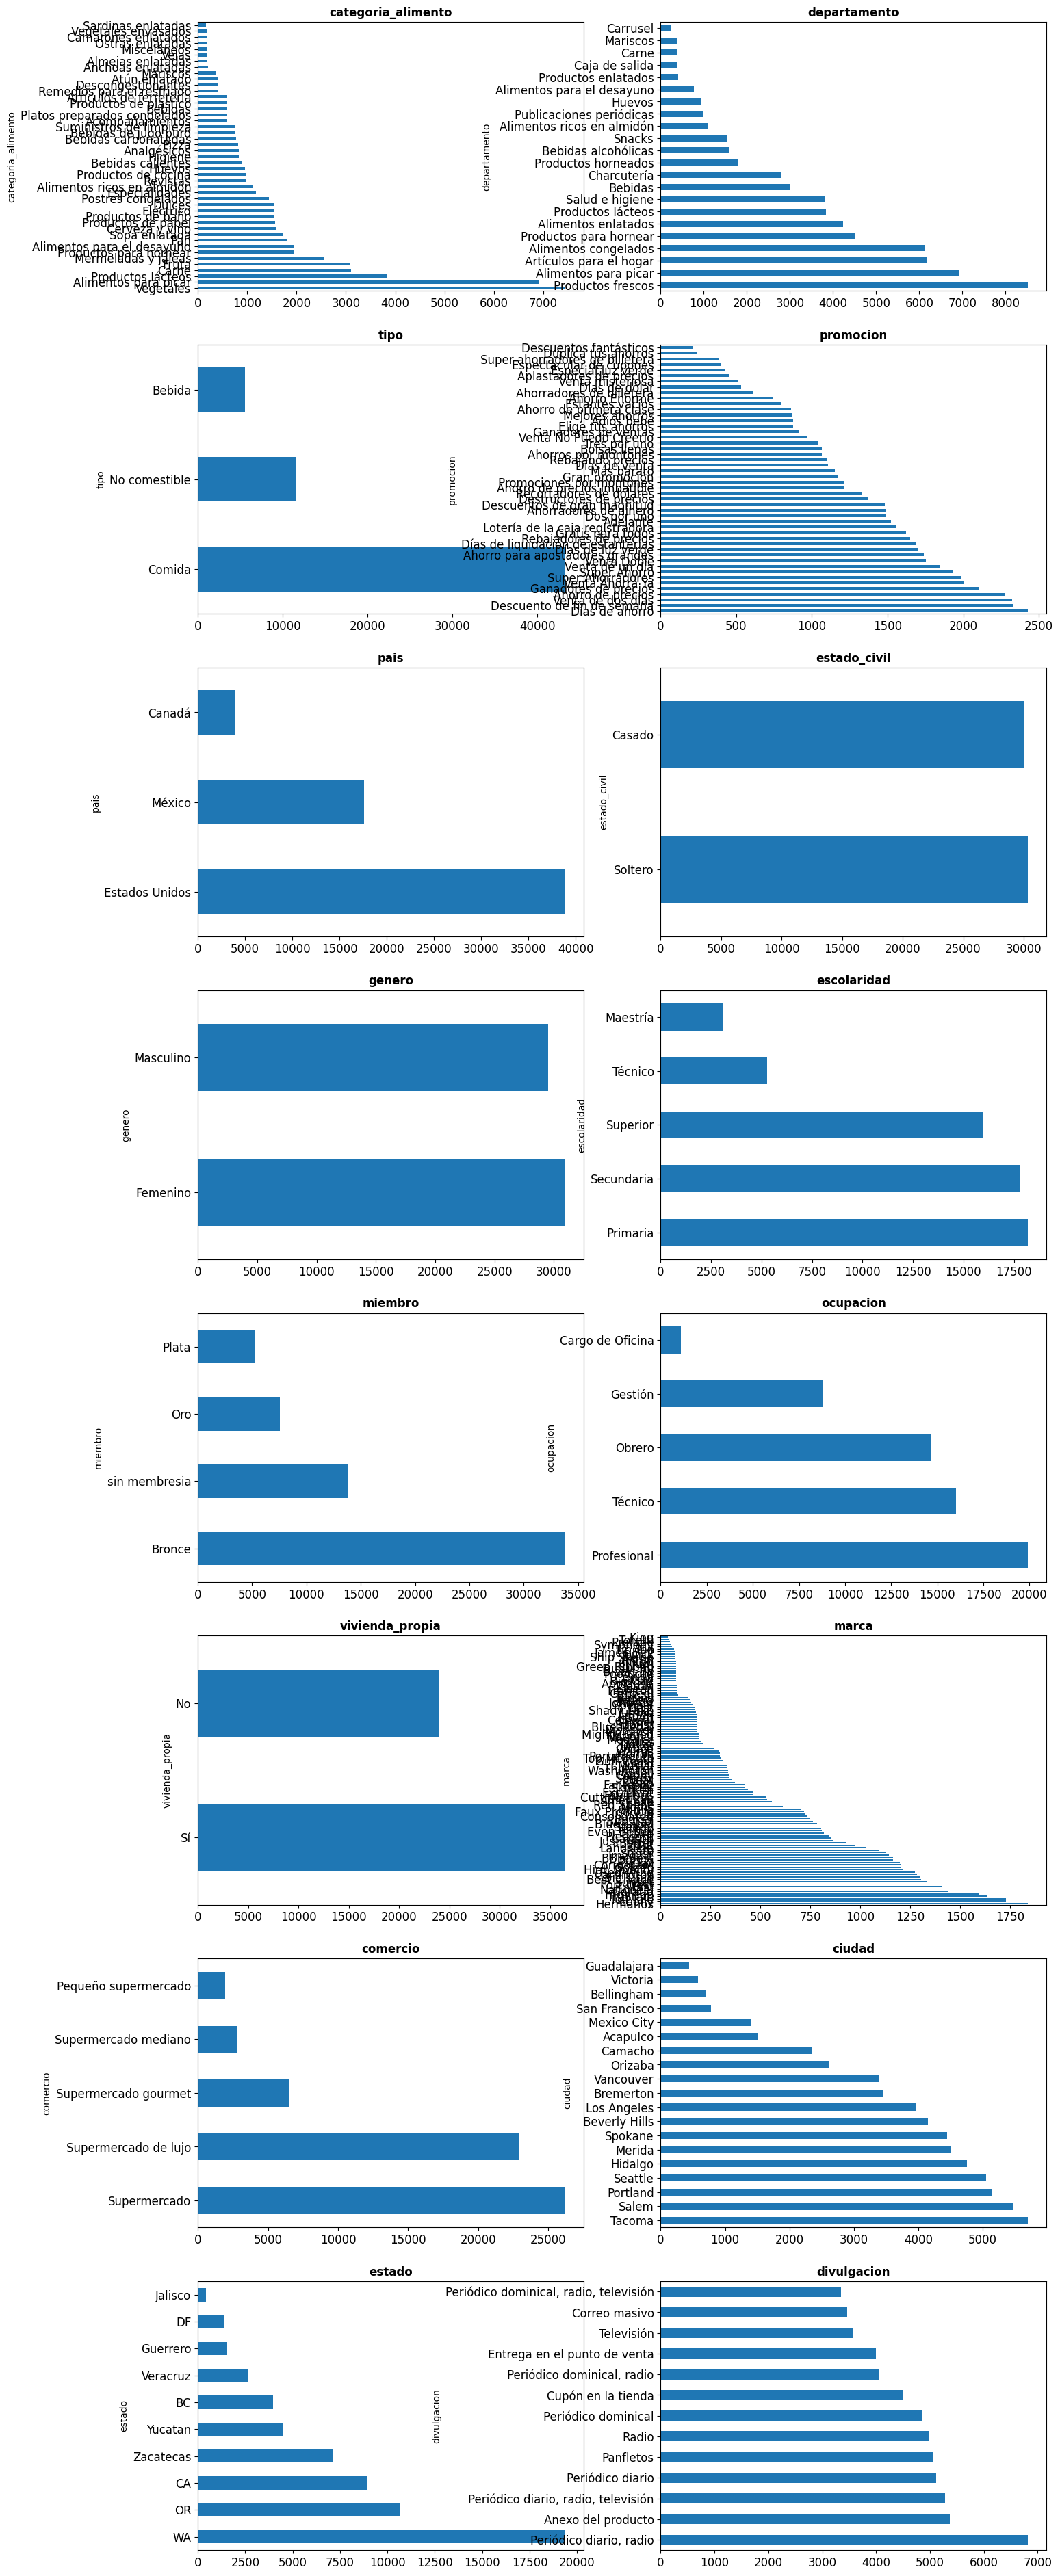

In [ ]:
graficos_eda_categoricos(df_renombrado.select_dtypes('O'))

Observaciones:
*  La categoria de alimentos vegetales es la mas frecuente.
* El departamento de productos frescos es el mas frecuente.
* El tipo de comida es el mas frecuente.
* Lo promocion dias de ahorro es la mas frecuente.
* El pais de estados unidos es el principal receptor de la linea de supermercados por un amplio margen.
* La escolaridad mas frecuente de los cliente es escuela y tambien secundaria.

* Los membresia bronce es la mas comprada por los clientes.
* La ocupacion de profesional es la ocupacion que mas tienen los clientes.
* Mas de la mitad de los clientes tienen vivienda propia.
* El supermercado normal es el que acuden con mas frecuencia los clientes y despues de este el supermercado de lujo.
* La ciudad de Tacoma es la que tiene mas ventas y la siguiente es Salem.
* El estado mas frecuente es WA.
* El medio de divulgacion mas frecuente es periodico diario,radio.


#### Que tipo de producto se vende con mayor frecuencia?

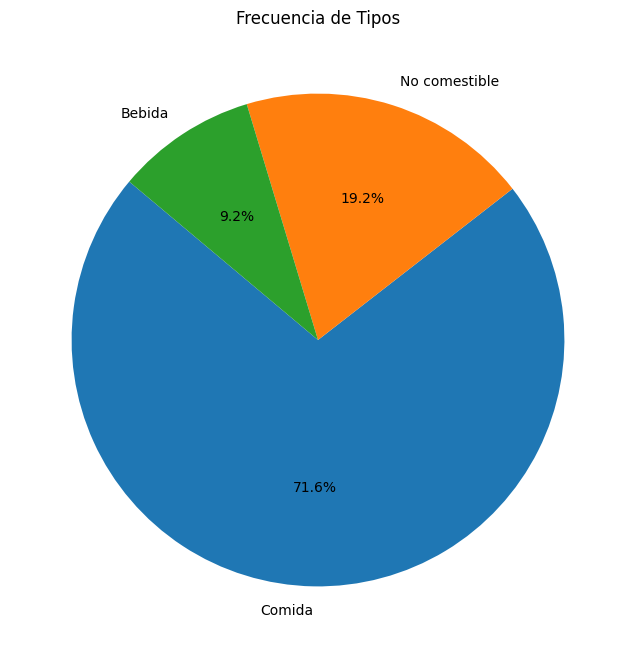

In [ ]:

frecuencia_tipos = df_renombrado['tipo'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_tipos, labels=frecuencia_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Frecuencia de Tipos')
plt.show()


Observaciones:

Es una linea de supermecados que se centra en la venta de alimentos plasticos, frescos, enlatados, congelados.

#### Grafica de correlaciones.

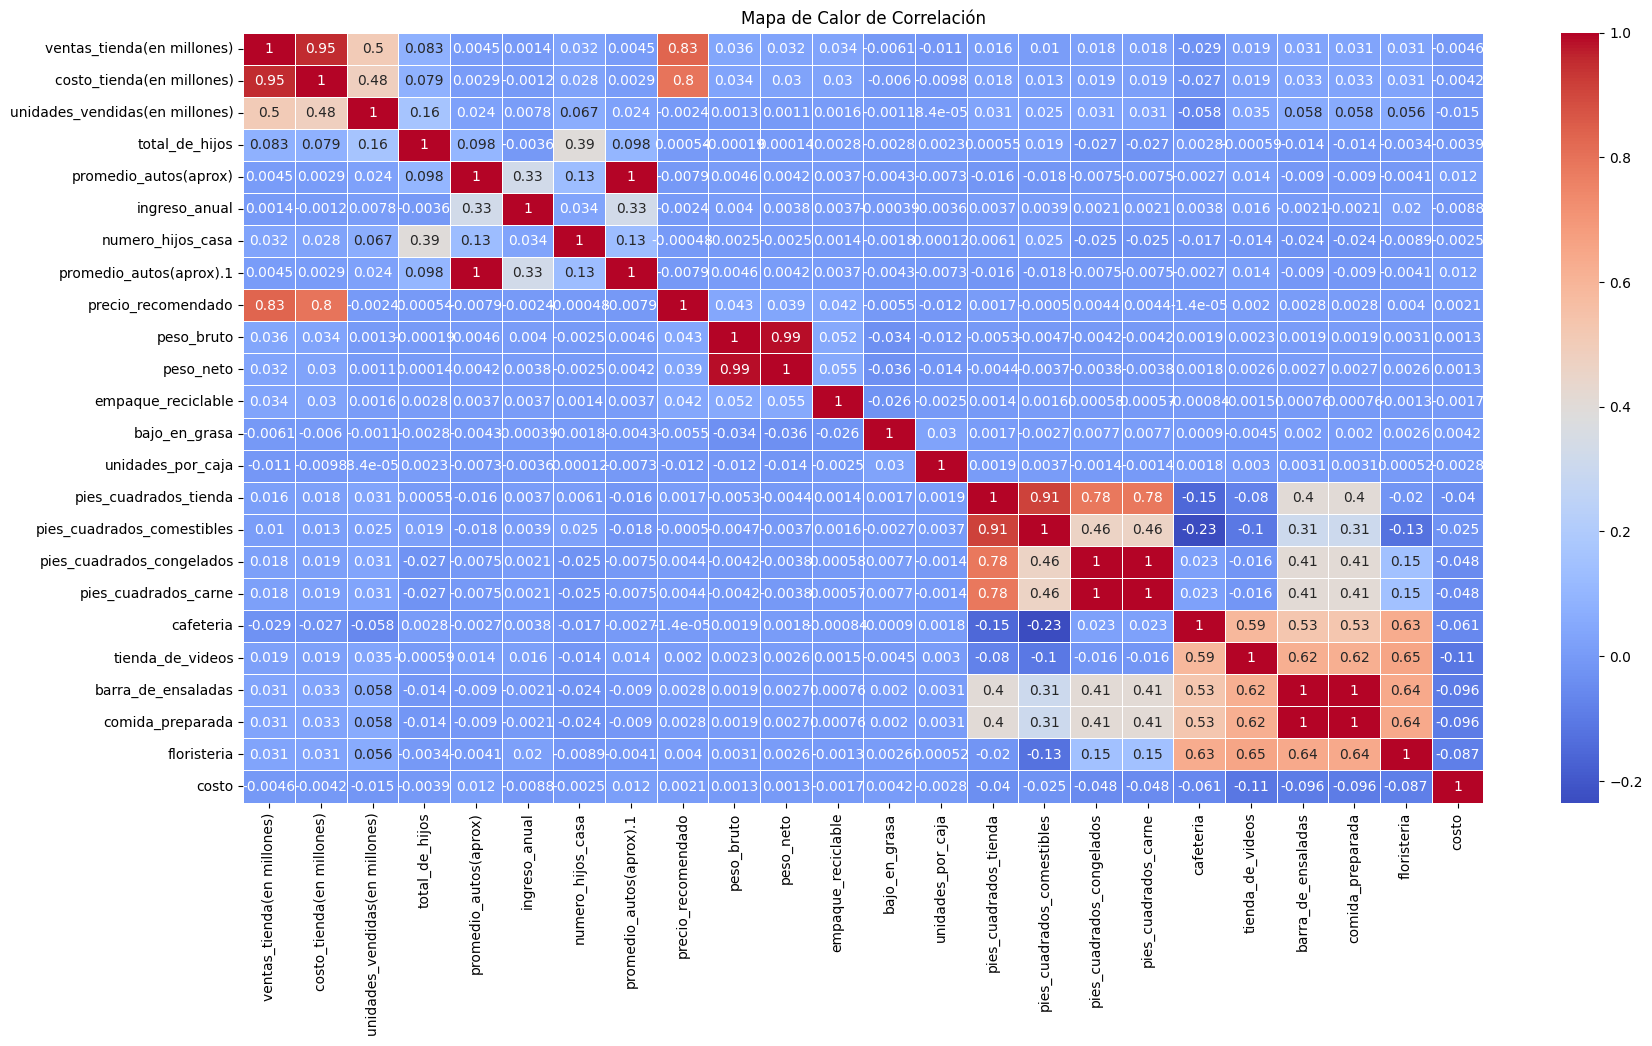

In [ ]:

# Seleccionar solo las columnas numéricas
numerical_df = df_renombrado.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Crear un mapa de calor
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


Observaciones:

* Cumulo principal:

     Se pueden ver que hay variables que conservan una relacion directa como inversa. Y se centran principalmente en un cumulo de relaciones en referencia con el tamaño en m2 de las areas dedicadas y el tipo de local que tienen estos supermecados (cafeteria, barra de ensaladas).

*  Cumulos secundarios:
      
      *  Cumulo 1:

          Este cumulo contiene datos de los clientes como el numero de hijos en casa, autos-aproximados, total de hijos, ingreso_anual, etc.

      *  Cumulo 2:

          Este cumulo contiene datos de los costos, ventas en millones de la tienda y ventas unitarias.

      *  Relaciones significativas sin cumulo:

          *  total_hijos con ventas unitarias.
          *  precio recomendado con costo y venta en millones.
          *  peso bruto con peso neto.


Hipotesis:

* La variable del total de hijos y numero de hijos en casa tienen una relacion cercana puesto que pueden contener los mismos datos con determinados clientes.

* La variable de autos_aproximados.1 es una copia directa de autos_aproximados puesto que tienen una relacion directa del 100%.

* Los cumulos de correlaciones se pueden dividir en datos del cliente, datos de areas en m2 de locales de venta y locales de venta existentes, datos de promociones / costos del supermercado.

#### Hay alguna diferencia en el perfil de casado que el del soltero?

<ipython-input-39-c38e10274b40>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado_civil', data=df_renombrado, palette='Set2')


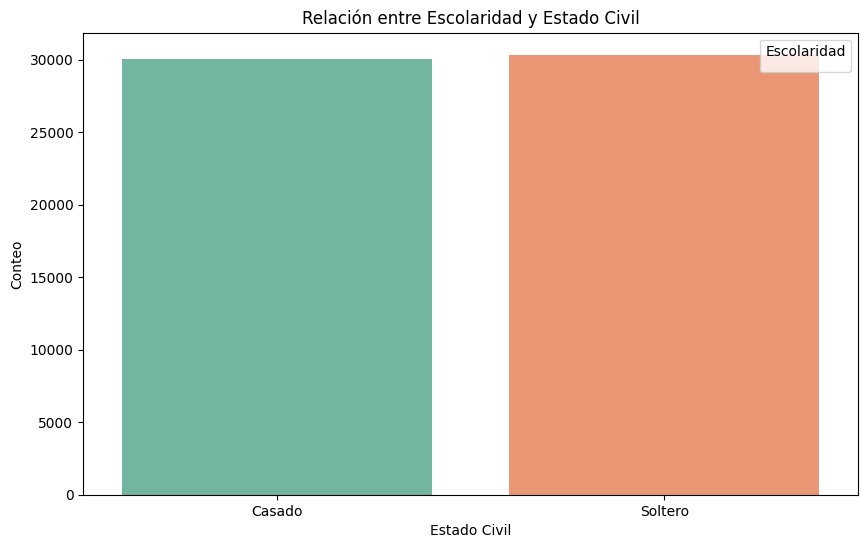

In [ ]:
# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='estado_civil', data=df_renombrado, palette='Set2')
plt.title('Relación entre Escolaridad y Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.legend(title='Escolaridad')
plt.show()


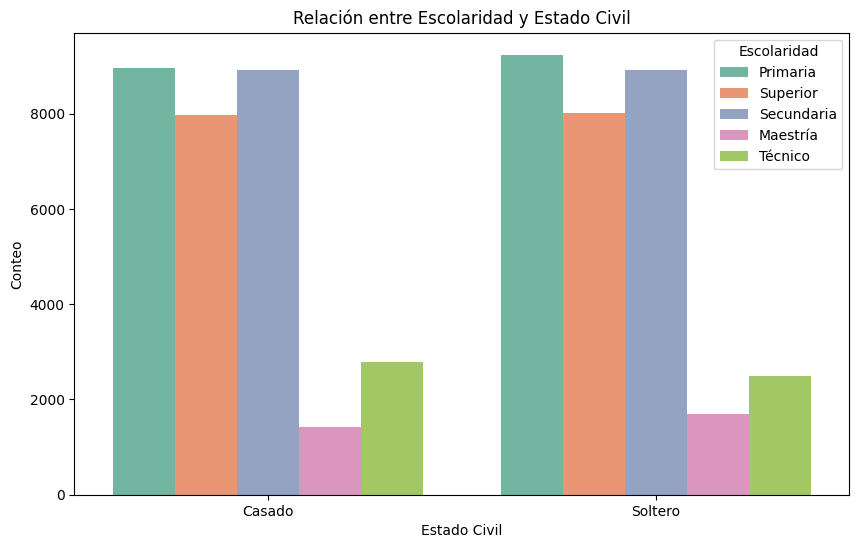

In [ ]:

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='estado_civil', hue='escolaridad', data=df_renombrado, palette='Set2')
plt.title('Relación entre Escolaridad y Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.legend(title='Escolaridad')
plt.show()


<ipython-input-41-78992f551a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='estado_civil', y='ingreso_anual', data=df_renombrado, palette='Blues')


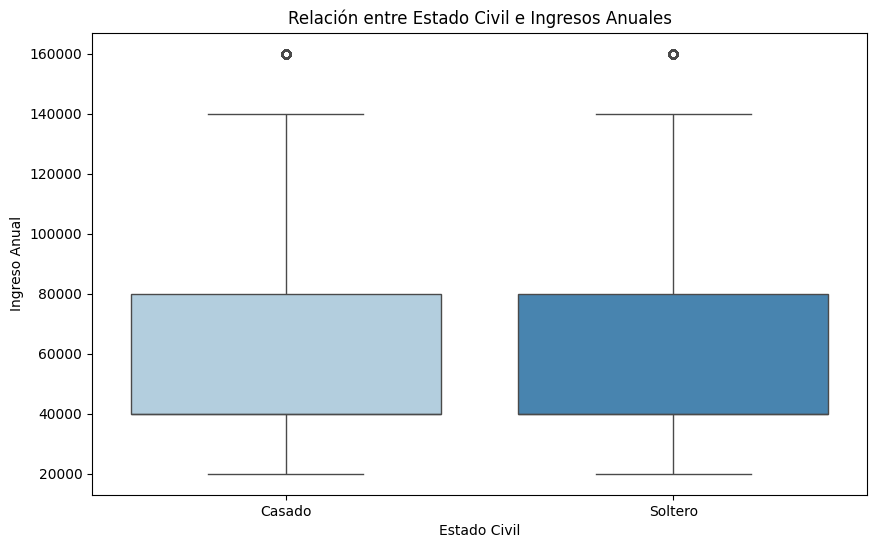

In [ ]:
# Crear una gráfica de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='estado_civil', y='ingreso_anual', data=df_renombrado, palette='Blues')
plt.title('Relación entre Estado Civil e Ingresos Anuales')
plt.xlabel('Estado Civil')
plt.ylabel('Ingreso Anual')
plt.show()


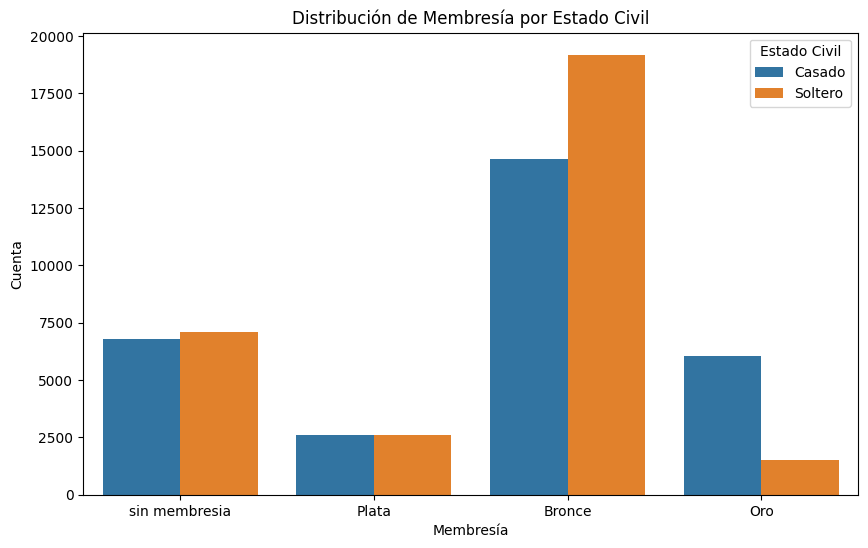

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_renombrado, x='miembro', hue='estado_civil')

# Añadir títulos y etiquetas
plt.title('Distribución de Membresía por Estado Civil')
plt.xlabel('Membresía')
plt.ylabel('Cuenta')
plt.legend(title='Estado Civil')

# Mostrar el gráfico
plt.show()

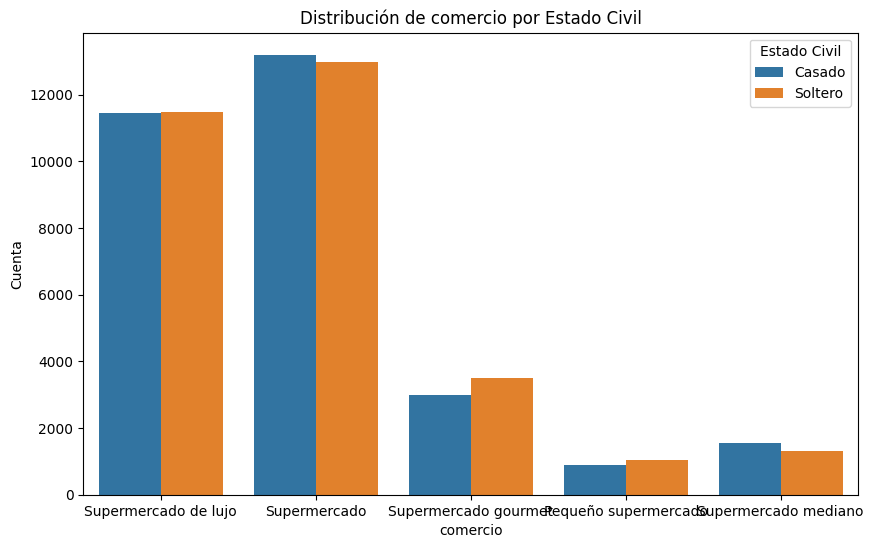

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_renombrado, x='comercio', hue='estado_civil')

# Añadir títulos y etiquetas
plt.title('Distribución de comercio por Estado Civil')
plt.xlabel('comercio')
plt.ylabel('Cuenta')
plt.legend(title='Estado Civil')

# Mostrar el gráfico
plt.show()

Observaciones:

* Los clientes con membresia oro estan conformados principalmente por casados por un amplio margen.

* Los clientes con membreseia bronce estan conformados principalmente por solteros.

* Los clientes con membresia plata y sin membresia no tienen casi ninguna diferencia.

* Los comercios no tienen casi diferencias entre los perfiles soltero y casado.

Hipotesis:

* Los ingresos entre una persona casada o soltera son muy semejantes. Solo hay una pequeña diferencia en la escolaridad porque las personas casadas dedican mas tiempo y recursos a su familia. Y no significa una diferencia entre ambas partes puesto que se venden productos de consumo rapido y hay muy poca diferencia de ingresos. La cantidad de dinero disponible es menor para personas casadas y/o con hijos que solteros.

* Hay un poco mas de personas solteras que casadas, por una leve diferencia. Puede ser una caracteristica distintiva cuando se describan los clusters.

* Los clientes con membresia oro estan conformados principalmente por casados y los clientes con membresia bronce estan conformados principalmente por solteros.

#### El ingreso de los clientes que relacion tiene con el cargo que tienen y el grado de estudios?

In [ ]:
df_renombrado.ingreso_anual.describe()

count     60428.000000
mean      58312.371748
std       36093.954105
min       20000.000000
25%       40000.000000
50%       40000.000000
75%       80000.000000
max      160000.000000
Name: ingreso_anual, dtype: float64

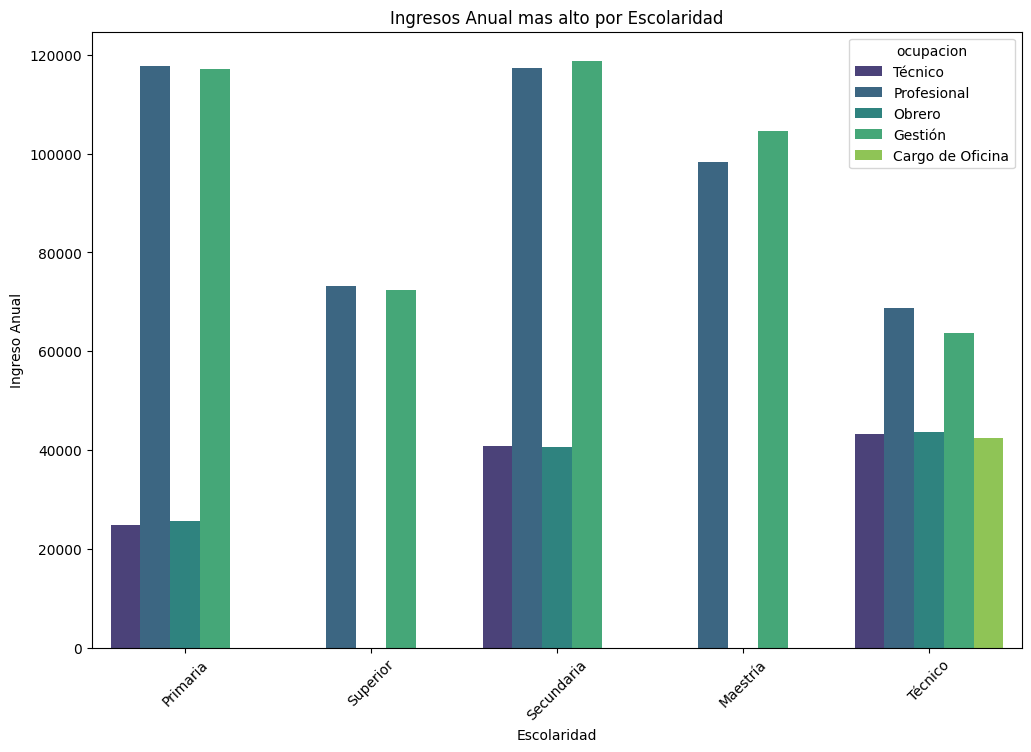

In [ ]:
# Crear una gráfica de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='escolaridad', y='ingreso_anual', hue = "ocupacion", data=df_renombrado, palette='viridis', errorbar=None)
plt.title('Ingresos Anual mas alto por Escolaridad')
plt.xlabel('Escolaridad')
plt.ylabel('Ingreso Anual')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_ocupacion = df_renombrado.groupby("ocupacion").describe()
df_ocupacion

ventas_tienda(en millones)                                  \
                                      count      mean       std   min   25%   
ocupacion                                                                     
Cargo de Oficina                     1089.0  6.503921  3.587676  0.79  3.66   
Gestión                              8805.0  6.553095  3.471066  0.53  3.80   
Obrero                              14624.0  6.512374  3.441305  0.52  3.80   
Profesional                         19915.0  6.515560  3.437760  0.51  3.80   
Técnico                             15995.0  6.594830  3.500740  0.51  3.84   

                                      costo_tienda(en millones)            \
                    50%    75%    max                     count      mean   
ocupacion                                                                   
Cargo de Oficina  5.840  8.700  19.70                    1089.0  2.601895   
Gestión           5.960  8.670  22.92                    8805.0  2.619810   
Obrero            5.915  8.655  19.90                   14624.0  2.605696   
Profesional       5.910  8.640  19.90                   19915.0  2.608233   
Técnico           6.040  8.710  19.90                   15995.0  2.647023   

                                                                      \
                       std     min      25%     50%      75%     max   
ocupacion                                                              
Cargo de Oficina  1.479134  0.2686  1.46250  2.3400  3.50400  8.6680   
Gestión           1.453700  0.1760  1.50480  2.4087  3.49280  9.0160   
Obrero            1.441574  0.1792  1.48980  2.3736  3.47805  9.3840   
Profesional       1.440207  0.1632  1.49600  2.3688  3.45450  9.7265   
Técnico           1.476723  0.1705  1.51415  2.4045  3.51475  9.5305   

                 unidades_vendidas(en millones)                                \
                                          count      mean       std  min  25%   
ocupacion                                                                       
Cargo de Oficina                         1089.0  3.093664  0.824959  1.0  3.0   
Gestión                                  8805.0  3.094832  0.817086  1.0  3.0   
Obrero                                  14624.0  3.084245  0.830265  1.0  3.0   
Profesional                             19915.0  3.090635  0.827111  1.0  3.0   
Técnico                                 15995.0  3.103532  0.831967  1.0  3.0   

                                total_de_hijos                                \
                  50%  75%  max          count      mean       std  min  25%   
ocupacion                                                                      
Cargo de Oficina  3.0  4.0  5.0         1089.0  2.603306  1.494053  0.0  1.0   
Gestión           3.0  4.0  6.0         8805.0  2.524702  1.493735  0.0  1.0   
Obrero            3.0  4.0  6.0        14624.0  2.537336  1.486809  0.0  1.0   
Profesional       3.0  4.0  6.0        19915.0  2.498167  1.487329  0.0  1.0   
Técnico           3.0  4.0  6.0        15995.0  2.575492  1.493464  0.0  1.0   

                                promedio_autos(aprox)                      \
                  50%  75%  max                 count      mean       std   
ocupacion                                                                   
Cargo de Oficina  3.0  4.0  5.0                1089.0  2.758494  0.818829   
Gestión           2.0  4.0  5.0                8805.0  2.477910  0.972530   
Obrero            3.0  4.0  5.0               14624.0  1.902763  1.160443   
Profesional       2.0  4.0  5.0               19915.0  2.516847  0.943122   
Técnico           3.0  4.0  5.0               15995.0  1.887277  1.174629   

                                          ingreso_anual                \
                  min  25%  50%  75%  max         count          mean   
ocupacion                                                               
Cargo de Oficina  1.0  2.0  3.0  3.0  4.0        1089.0  42516.0

In [ ]:
df_escolaridad = df_renombrado.groupby("escolaridad").describe()
df_escolaridad

ventas_tienda(en millones)                                        \
                                 count      mean       std   min   25%   50%   
escolaridad                                                                    
Maestría                        3111.0  6.390463  3.361963  0.99  3.72  5.84   
Primaria                       18201.0  6.538437  3.456816  0.51  3.82  5.92   
Secundaria                     17838.0  6.612837  3.510844  0.52  3.84  6.08   
Superior                       15994.0  6.513636  3.420297  0.51  3.81  5.91   
Técnico                         5284.0  6.479126  3.504982  0.61  3.72  5.90   

                         costo_tienda(en millones)                      \
              75%    max                     count      mean       std   
escolaridad                                                              
Maestría     8.51  19.75                    3111.0  2.557957  1.403769   
Primaria     8.67  19.90                   18201.0  2.620644  1.454790   
Secundaria   8.76  19.90                   17838.0  2.645213  1.471039   
Superior     8.64  22.92                   15994.0  2.609738  1.435736   
Técnico      8.55  19.90                    5284.0  2.594076  1.464734   

                                                       \
                min      25%      50%     75%     max   
escolaridad                                             
Maestría     0.3600  1.47100  2.32800  3.3951  9.0850   
Primaria     0.1792  1.49850  2.38260  3.4928  9.5250   
Secundaria   0.1705  1.51200  2.40605  3.5145  9.7265   
Superior     0.1632  1.50675  2.38560  3.4638  9.5040   
Técnico      0.1953  1.45920  2.35990  3.4527  9.4080   

            unidades_vendidas(en millones)                                     \
                                     count      mean       std  min  25%  50%   
escolaridad                                                                     
Maestría                            3111.0  3.060109  0.814214  1.0  3.0  3.0   
Primaria                           18201.0  3.085050  0.824566  1.0  3.0  3.0   
Secundaria                         17838.0  3.123388  0.846238  1.0  3.0  3.0   
Superior                           15994.0  3.083094  0.812988  1.0  3.0  3.0   
Técnico                             5284.0  3.069076  0.824317  1.0  3.0  3.0   

                      total_de_hijos                                          \
             75%  max          count      mean       std  min  25%  50%  75%   
escolaridad                                                                    
Maestría     4.0  5.0         3111.0  2.393443  1.372025  0.0  1.0  2.0  4.0   
Primaria     4.0  6.0        18201.0  2.479699  1.497154  0.0  1.0  2.0  4.0   
Secundaria   4.0  6.0        17838.0  2.717121  1.499090  0.0  2.0  3.0  4.0   
Superior     4.0  6.0        15994.0  2.455983  1.490911  0.0  1.0  2.0  4.0   
Técnico      4.0  6.0         5284.0  2.420326  1.444372  0.0  1.0  2.0  3.0   

                 promedio_autos(aprox)                                     \
             max                 count      mean       std  min  25%  50%   
escolaridad                                                                 
Maestría     5.0                3111.0  2.516554  0.948666  0.0  2.0  3.0   
Primaria     5.0               18201.0  1.498104  1.101552  0.0  1.0  1.0   
Secundaria   5.0               17838.0  2.488676  0.977037  0.0  2.0  3.0   
Superior     5.0               15994.0  2.495498  0.971171  0.0  2.0  2.0   
Técnico      5.0                5284.0  2.565481  0.927256  1.0  2.0  3.0   

                      ingreso_anual                                       \
             75%  max         count          mean           std      min   
escolaridad                                                                
Maestría     3.0  4.0        3111.0  99864.995178  27394.599522  20000.0   
Primaria     2.0  4.0       18201.0  40098.895665  36882.216737  20000.0   
Secundaria   3.0  4.0       17838.

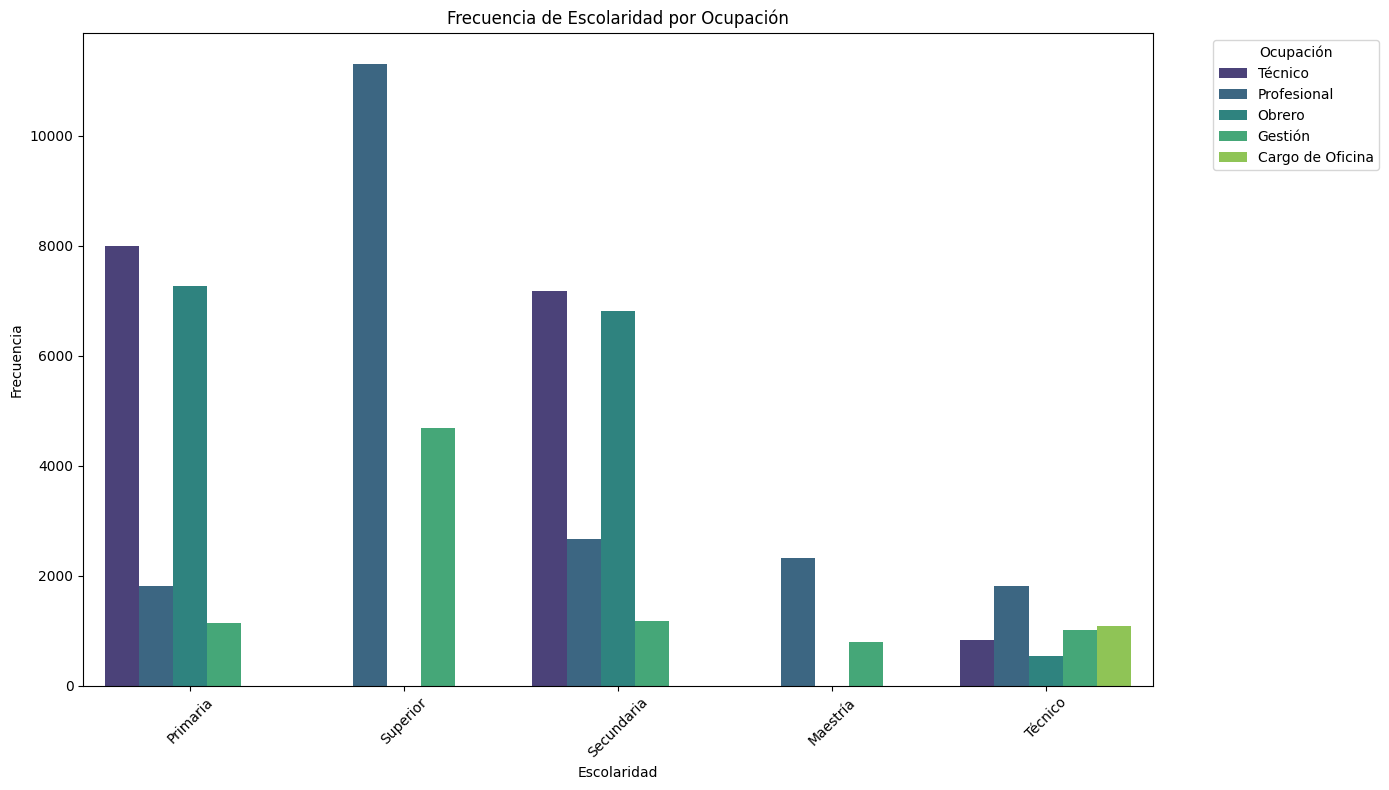

In [ ]:

plt.figure(figsize=(14, 8))
sns.countplot(x='escolaridad', hue='ocupacion', data=df_renombrado, palette='viridis')
plt.title('Frecuencia de Escolaridad por Ocupación')
plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Ocupación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-49-4dfcadc5fecf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='escolaridad', y='ingreso_anual', data=df_oficina, palette='viridis', errorbar=None)


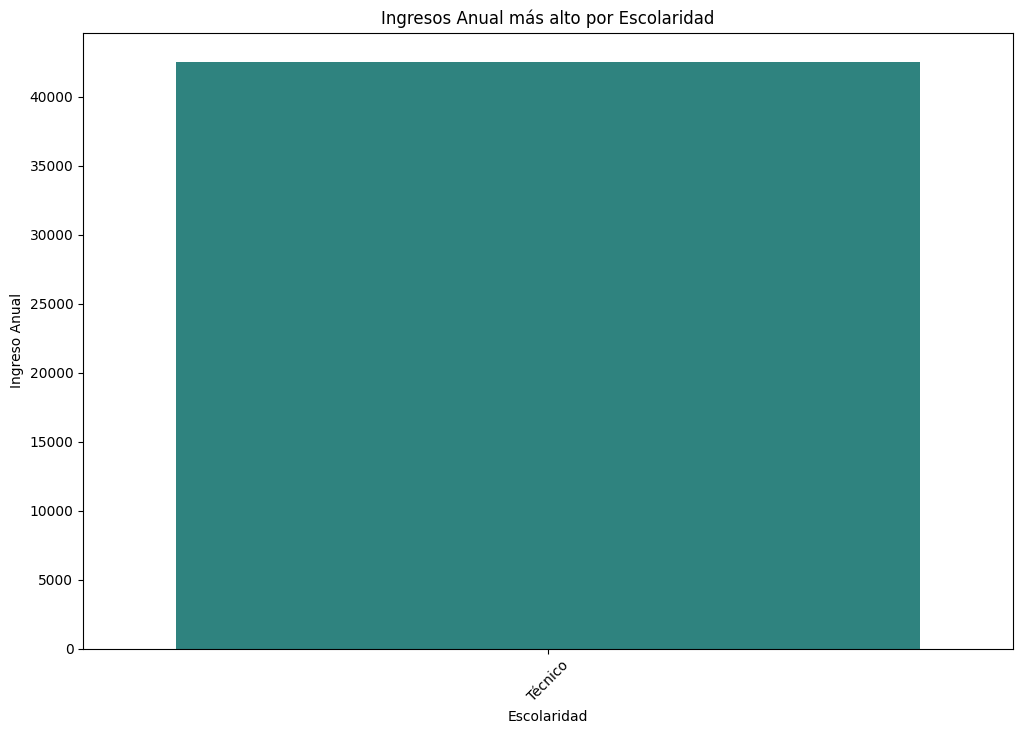

In [ ]:
# Filtrar el DataFrame para solo incluir los cargos de oficina
df_oficina = df_renombrado[df_renombrado['ocupacion'] == 'Cargo de Oficina']

# Crear una gráfica de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='escolaridad', y='ingreso_anual', data=df_oficina, palette='viridis', errorbar=None)
plt.title('Ingresos Anual más alto por Escolaridad')
plt.xlabel('Escolaridad')
plt.ylabel('Ingreso Anual')
plt.xticks(rotation=45)
plt.show()

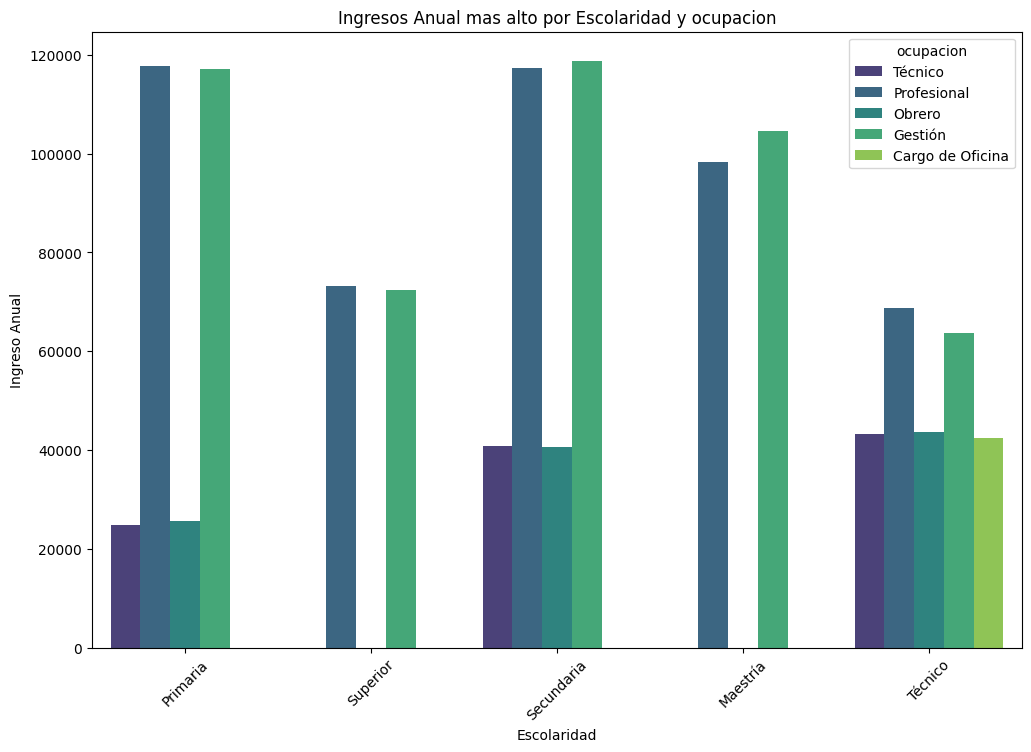

In [ ]:
# Crear una gráfica de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='escolaridad', y='ingreso_anual', hue = "ocupacion", data=df_renombrado, palette='viridis', errorbar=None)
plt.title('Ingresos Anual mas alto por Escolaridad y ocupacion')
plt.xlabel('Escolaridad')
plt.ylabel('Ingreso Anual')
plt.xticks(rotation=45)
plt.show()


<ipython-input-51-4a58ce20c73c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='escolaridad', y='ingreso_anual', data=df_renombrado, palette='viridis', errorbar=None)


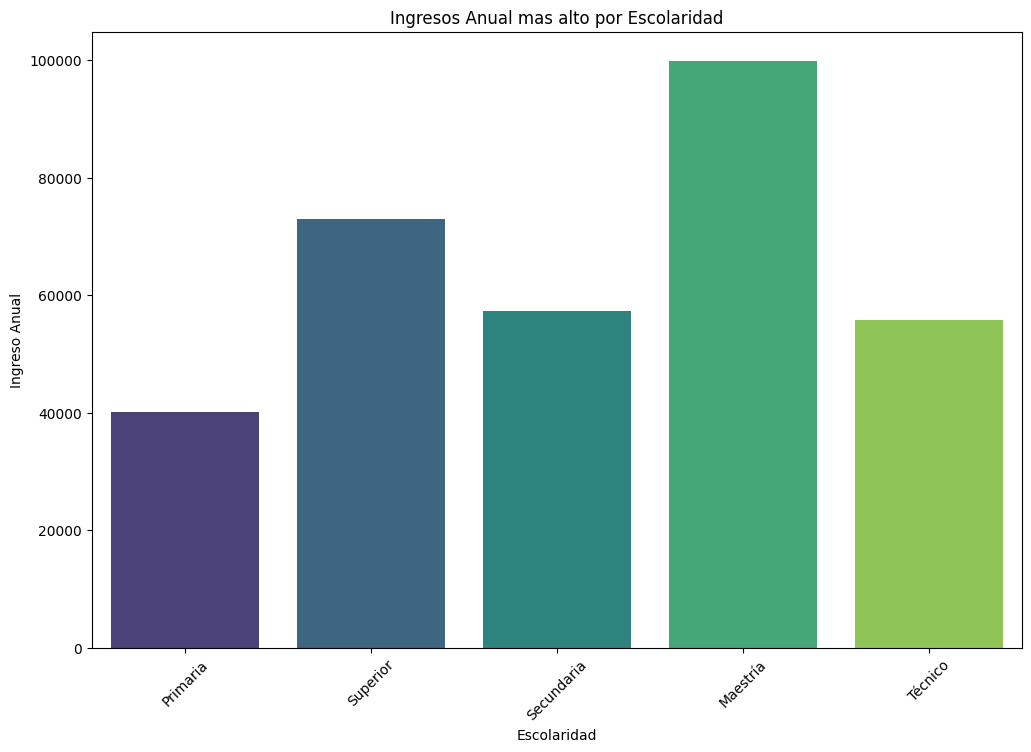

In [ ]:
# Crear una gráfica de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='escolaridad', y='ingreso_anual', data=df_renombrado, palette='viridis', errorbar=None)
plt.title('Ingresos Anual mas alto por Escolaridad')
plt.xlabel('Escolaridad')
plt.ylabel('Ingreso Anual')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_renombrado.groupby("escolaridad")["ingreso_anual"].describe()

count          mean           std      min      25%       50%  \
escolaridad                                                                    
Maestría      3111.0  99864.995178  27394.599522  20000.0  80000.0  100000.0   
Primaria     18201.0  40098.895665  36882.216737  20000.0  20000.0   20000.0   
Secundaria   17838.0  57227.267631  34525.967338  20000.0  40000.0   40000.0   
Superior     15994.0  72988.620733  25808.436674  20000.0  60000.0   60000.0   
Técnico       5284.0  55825.132475  30168.629552  20000.0  40000.0   40000.0   

                  75%       max  
escolaridad                      
Maestría     120000.0  160000.0  
Primaria      40000.0  160000.0  
Secundaria    60000.0  160000.0  
Superior      80000.0  160000.0  
Técnico       60000.0  160000.0

Observaciones:

*  Los cargos de oficina estan ocupados directamente por el grado de estudio de tecnico.

* Los cargos de oficina presentan muy pocos valores solo de 1000 dentro del conjunto de mas de 60000.

*  Los clientes con grados de estudio de superior y maestria solo tienen cargos de gestion y profesional.

* Los conteos de maestria son los mas bajos entre todas las escolaridades con solo 3000. Los segundos con menos registros son los de tecnico teniendo un poco mas de 5000. Y los registros de los otras tres escolaridades son cercanas y superiores a 16000 registros.

* El promedio de ingresos de gestion y profesional de maestria es mayor que el ingreso promedio de gestion y profesional de superior.

* Los registro de maestria son un poco escazos.

* Los registros del cargo de oficina son escazos.

* Los registros del grado de tecnico son pocos.

* La media de ingresos por escolaridad es alto por superior y maestria.

Hipotesis:

* Los cargos de oficina al presentar pocos valores estan completamente ocupado por el grado de tecnico. Si obtuviera un volumen mayor aparecerian otros grados de estudio con la ocupacion de tecnico.

* La maestria a pesar de los pocos registros tiene una media mayor de ingresos en cargos de gestion y profesional que un grado de estudio superior. Lo anterior se puede sostener si los ingresos son mucho mayores para maestria. Tambien es a considerar que la mayoria de registros de grado superior se centran en el cargo de profesional sin embargo hay un enorme margen en el ingreso promedio en este mismo cargo comparandolo tanto en maestria como en escuela y secundaria.

* Los registros del grado de primaria y secundaria tienen un mayor promedio de ingresos que grado superior incluso superando a maestria. Esto ultimo se podria explicar con que las ocupaciones de profesional y gestion son las que mas ingresos tienen, tambien con que el grado de secundaria tiene mas registros. Aunque el grado de primaria tambien presenta mas ingresos en esas dos ocupaciones aunque tiene menos registros.

* Las ocupaciones con mayores ingresos son profesional y gestion.

* Los valores de la media de ingresos en escuela y secundaria son mayores que en las otras escolaridades porque tiene un mayor presencia de registros.

* Los grados de estudio de superior y maestria tienen una diferencia importante a los otros grados de estudio siendo esta que los valores de sus ocupaciones se centran en gestion y profesional unicamente, pudiendo dar un rango de ingresos mas ajustado que las otras escolaridades.

* Los clientes de escolaridad secundaria son los que tienen mayores ingresos, esto se puede deber a que son los que tienen mas registros.

* Los clientes de primaria, secundaria y superior al ser los que tienen mas registros son los que mas compran en la linea de supermercados.

* Los ingresos promedio de escolaridad superior y maestria son mayores en  la grafica ingreso anual y escolaridad que en la grafica ingreso anual, escolaridad y ocupacion porque la media de secundaria y escuela se ve mermada en el primer caso ya que tiene tambien valores de ingresos mas dispersos a  diferencia  del segundo caso que se pueden delimitar de forma mas fina.

#### Hay cargos o escolaridades que tengan una determinada membresia?

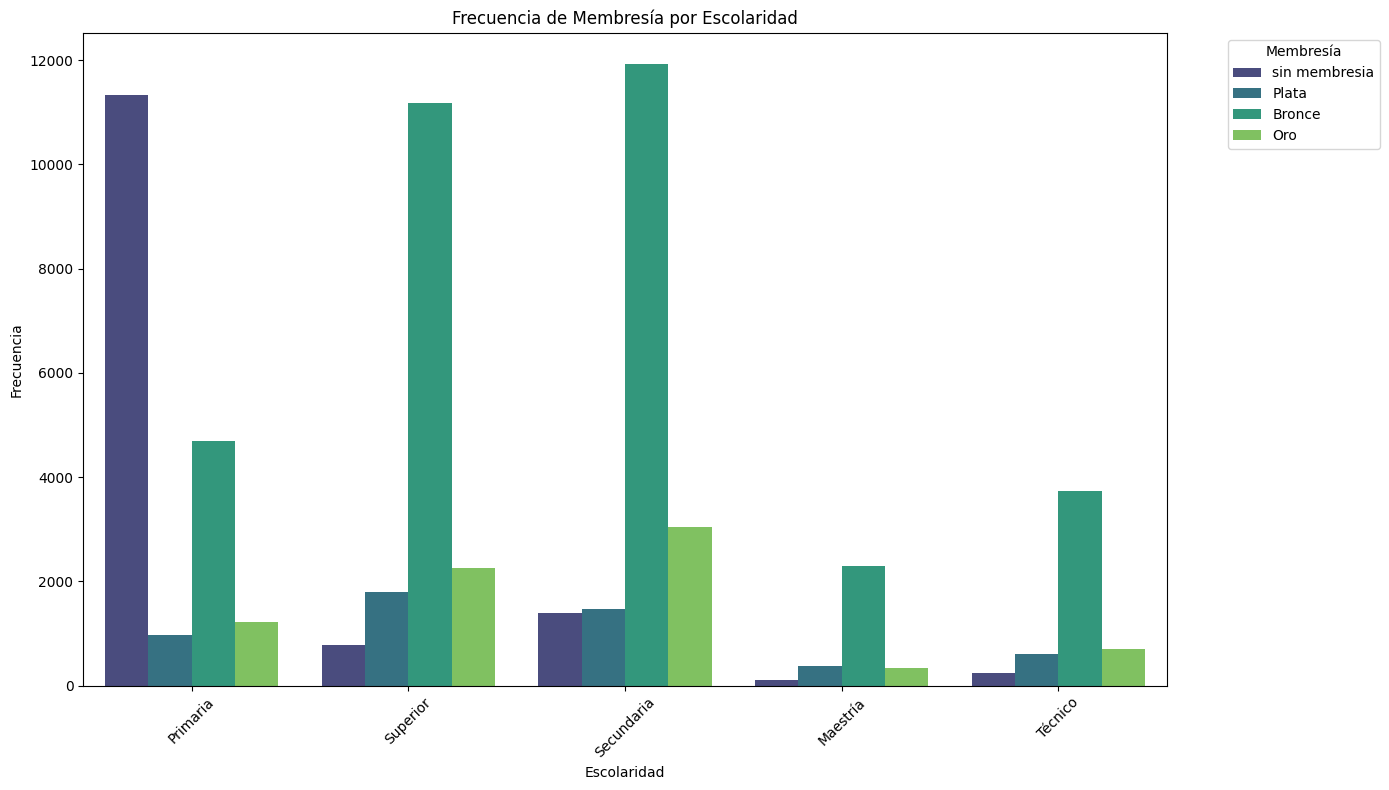

In [ ]:

# Crear una gráfica de barras para mostrar la frecuencia de membresía por escolaridad
plt.figure(figsize=(14, 8))
sns.countplot(x='escolaridad', hue='miembro', data=df_renombrado, palette='viridis')
plt.title('Frecuencia de Membresía por Escolaridad')
plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Membresía', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observaciones:

* El grado de escolaridad primaria tiene la mayor frecuencia de registros de sin membresia.

* La membresia bronce es la mas comprada por los clientes.

* El grado de escolaridad secundaria es el que tiene la mayor frecuencia de membresias cobre.

* El grado de escolaridad superior es la que tiene la mayor frecuencia de membresias plata.

* La membresia oro es la segunda mas comprada.

* El grado de escolaridad Secundaria es la que tiene la mayor frecuencia de membresias oro.

* Los clientes de los supermercados

Hipotesis:
* Los clientes con escolaridad secundaria son los que mas compran membresias bronce y oro. Hay que atraer este grupo de clientes.

* Los clientes con escolaridad superior son los que compran mas membresias plata.

* Los clientes con escolaridad primaria son los que menos compran membresias.

#### cuales son las membresias de los clientes de los supermercados segun las ventas?

<ipython-input-54-cde0e18fd79c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='miembro', y='ventas_tienda(en millones)', data=df_renombrado, palette='viridis', split=True)


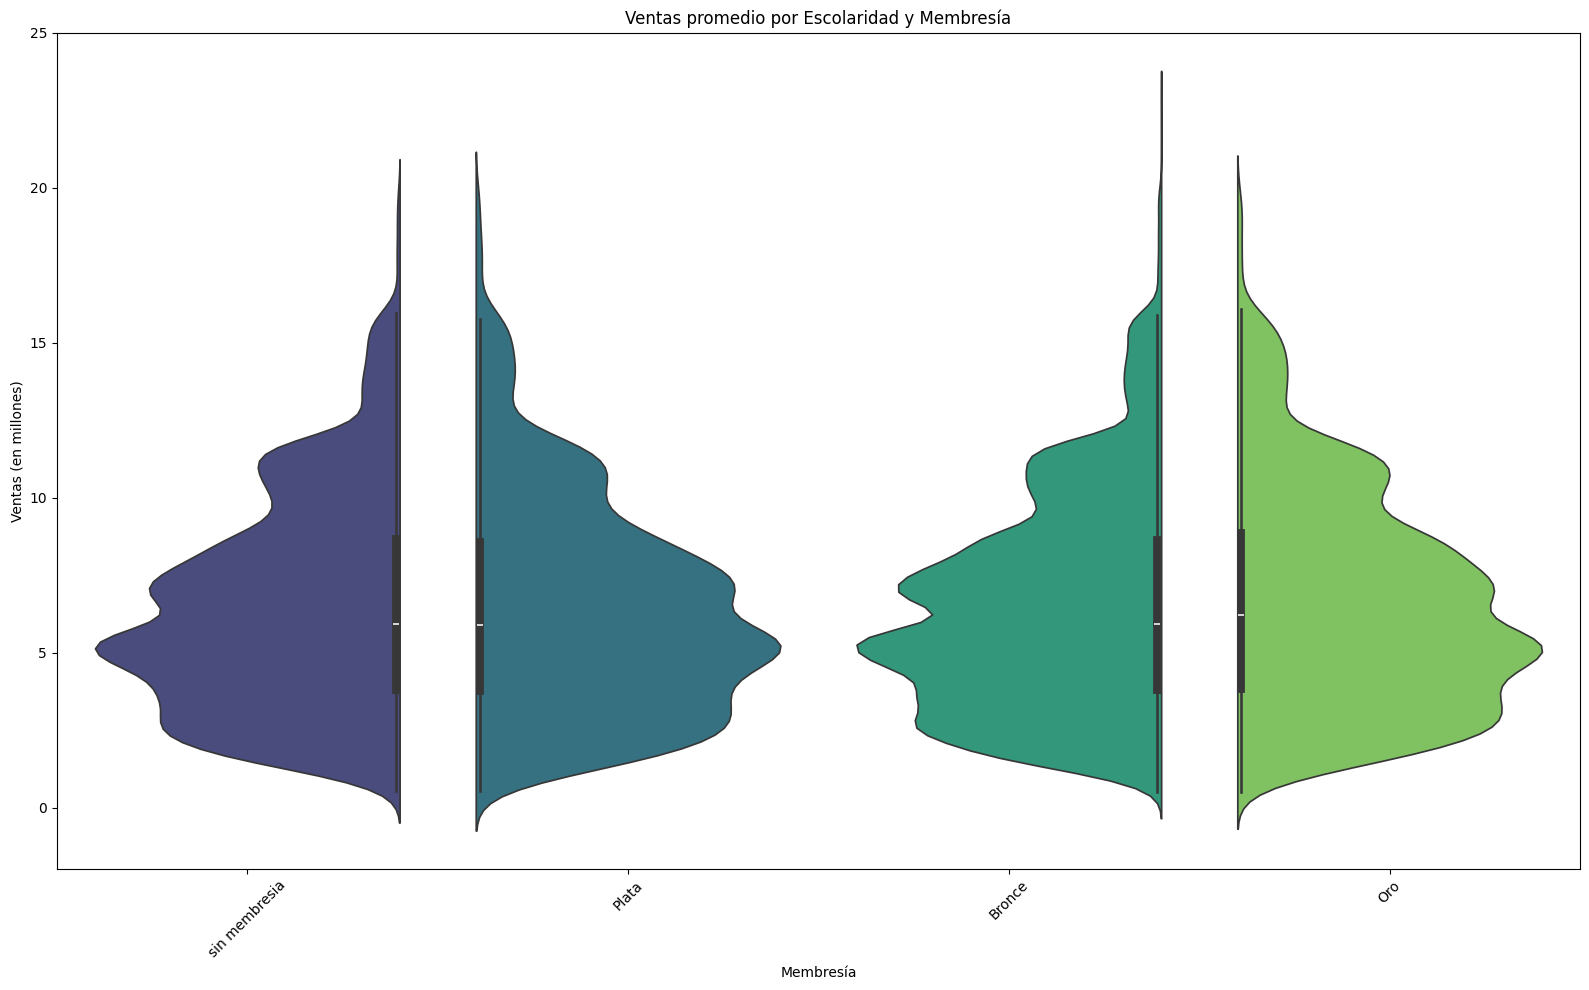

In [ ]:
# Crear una gráfica de violín para mostrar las ventas por escolaridad y membresía
plt.figure(figsize=(16, 10))
sns.violinplot(x='miembro', y='ventas_tienda(en millones)', data=df_renombrado, palette='viridis', split=True)
plt.title('Ventas promedio por Escolaridad y Membresía')
plt.xlabel('Membresía')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:

* Los miembros oro tienen mas concentracion de valores de supermercados con ventas alrededor de los 15 millones. Las cuales son las mas elevadas.
* Los miembros bronce tienen valores mas elevados pero con muy poca frecuencia.

* Los miembros plata son los segundos en tener una concentracion mas elevada de valores en ventas altas.

* Los clientes sin membresia y con membresia bronce tienen una distribucion similar con la diferencia en el ancho a favor de los clientes con membresia bronce.


Hipotesis:

* Los miembro oro son los principales compradores de las tiendas con ventas mas elevadas.

* Entre mayor sea la membresia es mas probable que el cliente compre mas productos de la tienda y por ende el supermercado que frecuenta tenga mayores ventas.

In [ ]:
df_renombrado.costo.describe()

count    60428.000000
mean        99.262366
std         30.011257
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
max        149.750000
Name: costo, dtype: float64

In [ ]:
df_agrupado = df_renombrado.groupby("divulgacion")["costo"].describe()
df_agrupado


count        mean        std    min  \
divulgacion                                                                    
Anexo del producto                      5371.0  104.336822  29.222788  59.83   
Correo masivo                           3457.0  104.087744  24.467431  59.02   
Cupón en la tienda                      4495.0   99.993493  24.577325  51.16   
Entrega en el punto de venta            4002.0  114.935647  31.145115  53.01   
Panfletos                               5069.0  108.685326  36.642875  51.00   
Periódico diario                        5119.0   89.223149  23.057924  52.06   
Periódico diario, radio                 6820.0   97.971450  31.369310  59.86   
Periódico diario, radio, televisión     5284.0   90.753003  31.195981  53.13   
Periódico dominical                     4859.0  101.230712  28.829666  51.12   
Periódico dominical, radio              4050.0  105.687131  26.883415  54.36   
Periódico dominical, radio, televisión  3346.0   90.965377  28.467525  53.23   
Radio                                   4980.0   96.703759  29.482807  50.79   
Televisión                              3576.0   85.941692  24.505645  51.47   

                                          25%     50%     75%     max  
divulgacion                                                            
Anexo del producto                      76.88  106.20  129.20  149.08  
Correo masivo                           86.42  106.66  131.81  142.45  
Cupón en la tienda                      83.51   95.78  125.48  147.35  
Entrega en el punto de venta            95.21  128.20  140.19  148.62  
Panfletos                               65.68  119.62  144.31  146.72  
Periódico diario                        70.32   91.00  101.84  140.57  
Periódico diario, radio                 68.84  101.61  126.62  149.75  
Periódico diario, radio, televisión     57.52   89.37  116.40  146.41  
Periódico dominical                     69.65  106.10  126.88  145.31  
Periódico dominical, radio              80.29  111.70  126.24  139.25  
Periódico dominical, radio, televisión  77.01   82.61  101.96  147.18  
Radio                                   75.44   94.43  115.25  148.87  
Televisión                              65.70   77.72   95.74  145.24

In [ ]:
df_agrupado = df_agrupado.reset_index()



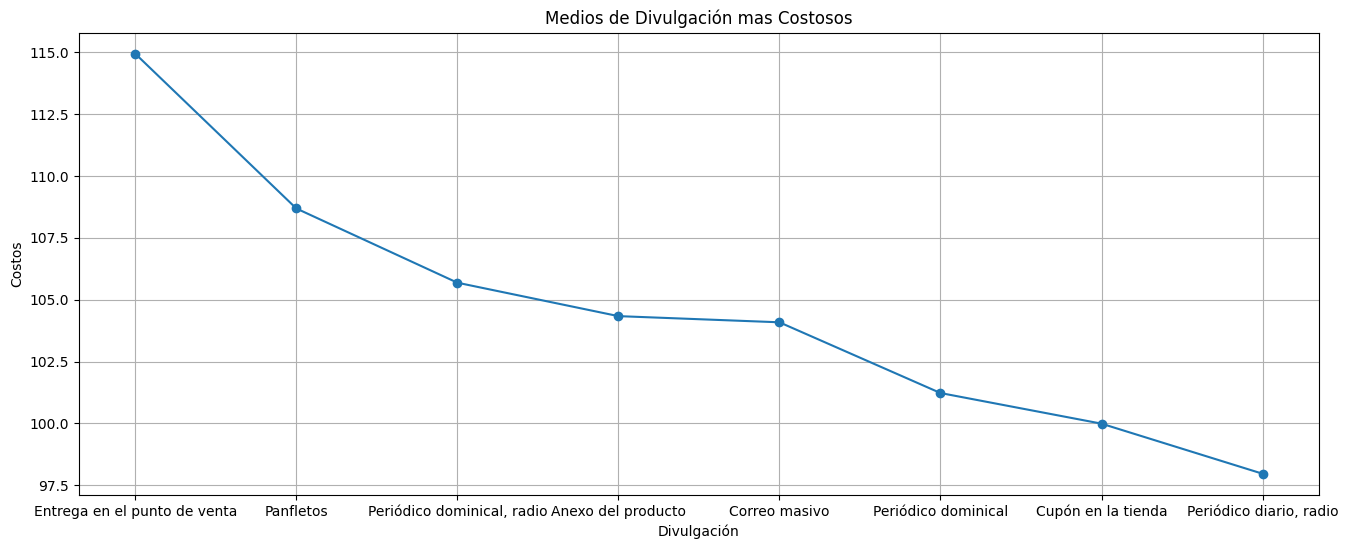

In [ ]:
# Obtener los índices de las 10 filas con los mayores valores en la columna 'mean'
top_10_indices = df_agrupado['mean'].nlargest(8).index

# Filtrar el DataFrame para obtener solo esas filas
df_top_10 = df_agrupado.loc[top_10_indices]

# Graficar
plt.figure(figsize=(16, 6))
plt.plot(df_top_10["divulgacion"], df_top_10["mean"], marker='o', linestyle='-')
plt.title('Medios de Divulgación mas Costosos')
plt.xlabel('Divulgación')
plt.ylabel('Costos')
plt.grid(True)
plt.show()

Explicacion:

La grafica representa los costos promedio agrupados segun el medio publicitario que reconocen los clientes de parte de la linea de supermercados.

#### Cual es el medio de comunicacion con la mayor media de ventas y total de ventas?

In [ ]:
df_agrupado = df_renombrado.groupby("divulgacion")["ventas_tienda(en millones)"].mean().nlargest(6)

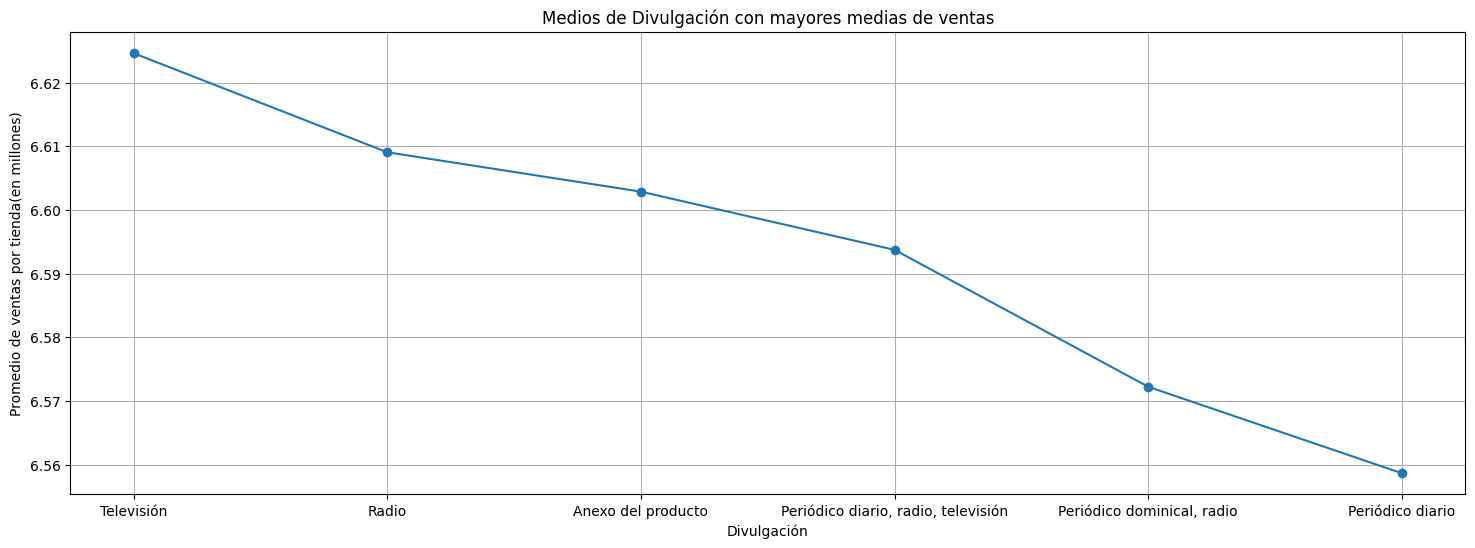

In [ ]:
# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_agrupado, marker='o', linestyle='-')
plt.title('Medios de Divulgación con mayores medias de ventas')
plt.xlabel('Divulgación')
plt.ylabel('Promedio de ventas por tienda(en millones)')
plt.grid(True)
plt.show()

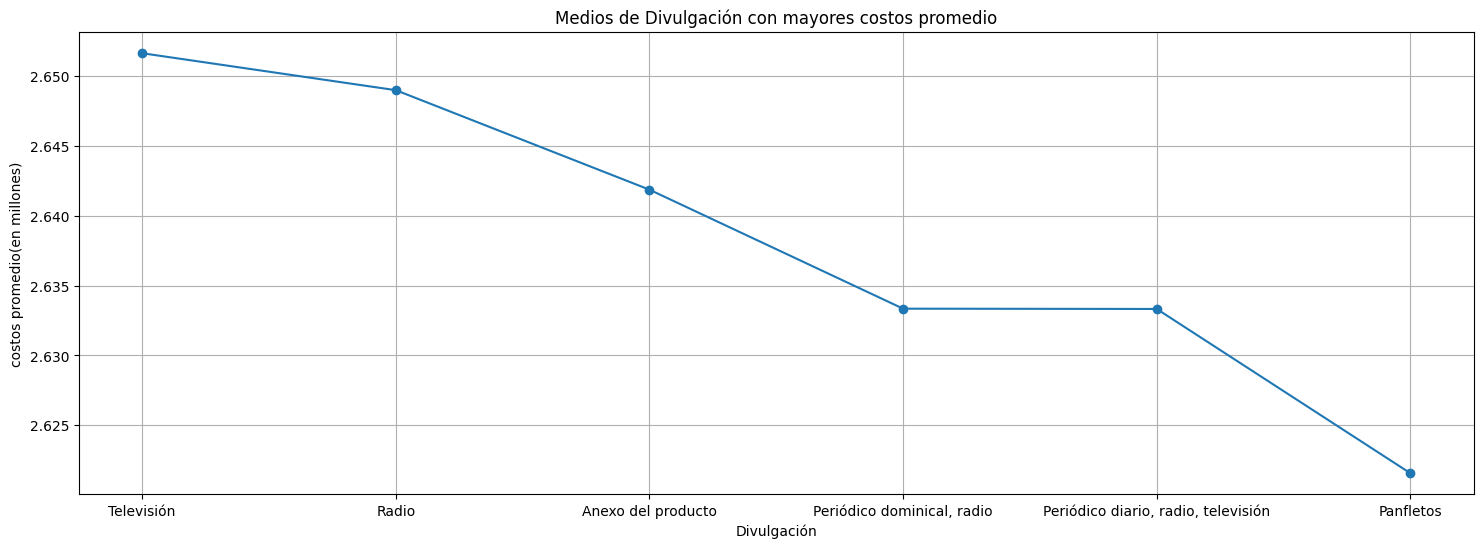

In [ ]:
# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_renombrado.groupby("divulgacion")["costo_tienda(en millones)"].mean().nlargest(6), marker='o', linestyle='-')
plt.title('Medios de Divulgación con mayores costos promedio')
plt.xlabel('Divulgación')
plt.ylabel('costos promedio(en millones)')
plt.grid(True)
plt.show()

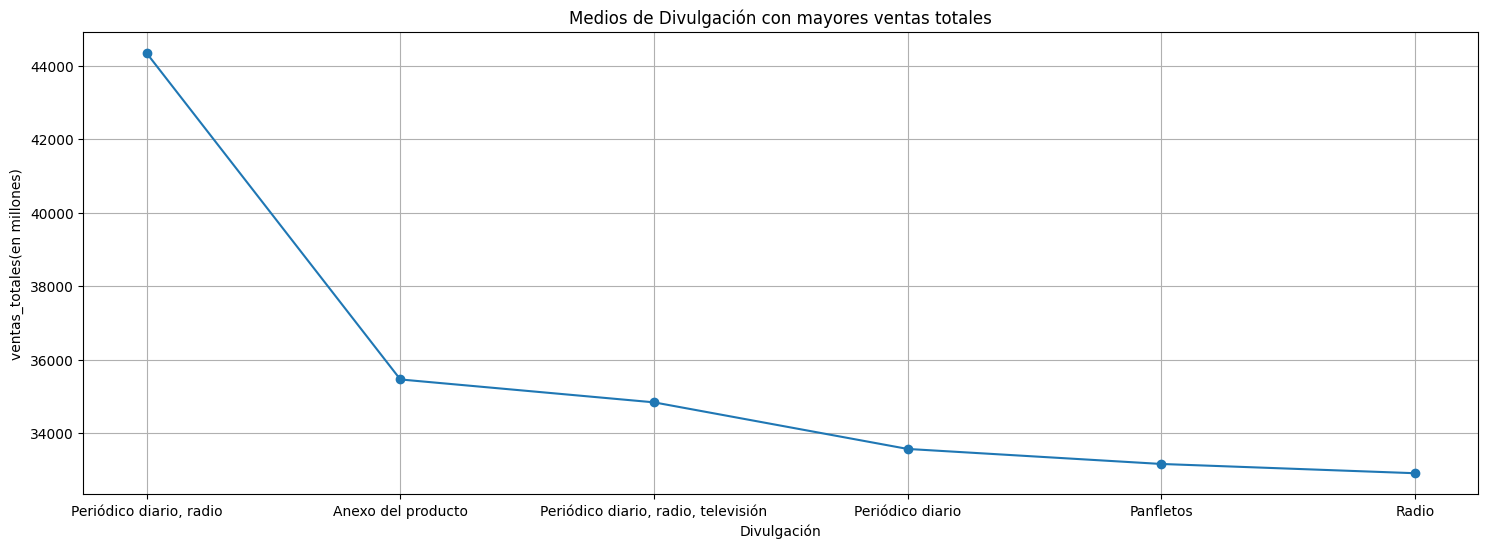

In [ ]:
# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_renombrado.groupby("divulgacion")["ventas_tienda(en millones)"].sum().nlargest(6), marker='o', linestyle='-')
plt.title('Medios de Divulgación con mayores ventas totales')
plt.xlabel('Divulgación')
plt.ylabel('ventas_totales(en millones)')
plt.grid(True)
plt.show()

In [ ]:
df_renombrado.groupby("divulgacion")["ventas_tienda(en millones)"].describe()

count      mean       std   min  \
divulgacion                                                                
Anexo del producto                      5371.0  6.602871  3.486857  0.53   
Correo masivo                           3457.0  6.537452  3.511158  0.51   
Cupón en la tienda                      4495.0  6.514852  3.439930  0.57   
Entrega en el punto de venta            4002.0  6.416414  3.490060  0.51   
Panfletos                               5069.0  6.542707  3.509373  0.58   
Periódico diario                        5119.0  6.558646  3.481555  0.52   
Periódico diario, radio                 6820.0  6.501232  3.411604  0.65   
Periódico diario, radio, televisión     5284.0  6.593734  3.449301  0.58   
Periódico dominical                     4859.0  6.501342  3.438171  0.72   
Periódico dominical, radio              4050.0  6.572225  3.453476  0.52   
Periódico dominical, radio, televisión  3346.0  6.427379  3.432317  0.52   
Radio                                   4980.0  6.609058  3.444781  0.56   
Televisión                              3576.0  6.624617  3.499333  0.64   

                                         25%    50%    75%    max  
divulgacion                                                        
Anexo del producto                      3.92  5.940  8.850  19.75  
Correo masivo                           3.72  5.900  8.730  19.80  
Cupón en la tienda                      3.78  5.920  8.640  19.90  
Entrega en el punto de venta            3.66  5.800  8.520  19.75  
Panfletos                               3.78  5.900  8.670  19.75  
Periódico diario                        3.78  5.940  8.640  19.70  
Periódico diario, radio                 3.80  5.940  8.610  19.90  
Periódico diario, radio, televisión     3.88  6.040  8.730  19.90  
Periódico dominical                     3.80  5.960  8.550  22.92  
Periódico dominical, radio              3.84  5.975  8.695  19.90  
Periódico dominical, radio, televisión  3.72  5.800  8.520  19.75  
Radio                                   3.93  6.200  8.640  19.75  
Televisión                              3.93  6.200  8.760  19.75

In [ ]:
df_renombrado.groupby("miembro")["divulgacion"].describe()

count unique                      top  freq
miembro                                                   
Bronce         33807     13  Periódico diario, radio  3683
Oro             7556     13  Periódico diario, radio   840
Plata           5198     13  Periódico diario, radio   674
sin membresia  13867     13  Periódico diario, radio  1623

Observaciones:

* Los clientes que ven publicidad en television son los que compran en las tiendas con mayores ventas promedio.

* Los clientes con las segundas mayores ventas promedio son los que han visto publicidad en radio.

* Los clientes con las terceras mayores ventas promedio son los que han visto publicidad en anexo del producto.

* La moda es el Periódico diario, radio.
*  Entrega en el punto de venta es el medio publicitario con la mayor media de costo por cliente.
* Panfletos es el segundo medio la mayor media de costo por cliente.
* Los siguientes medias de costo son periodico dominical/radio, anexo del producto

Hipotesis:

* La television es el medio publicitario mas efectivo por supermercado porque se relaciona con el mayor promedio de ventas. Aunque el mas visto y con mas ventas totales sea el periodico diario, radio. Esto se puede deber a que la television puede inducir una compra compulsiva. Tambien a que el periodico, diario, radio sea el mas efectivo en general, porque tiene las mayores ventas y es el mas visto.

* Los medios de comunicacion tienen el mismo orden por media de costos que por media de ventas, hay una relacion directa en las ventas y los costos. No solamente en la agrupacion por medios de comunicacion sino en general. Lo anterior sucede porque el valor de ventas siempre es mayor que el de costos. Tiene sentido porque si aumentan las ventas es porque se vendieron mas productos y para vender mas productos hay que tener mas costos.



#### Cual es son las ventas de los supermercados segun la membresia?

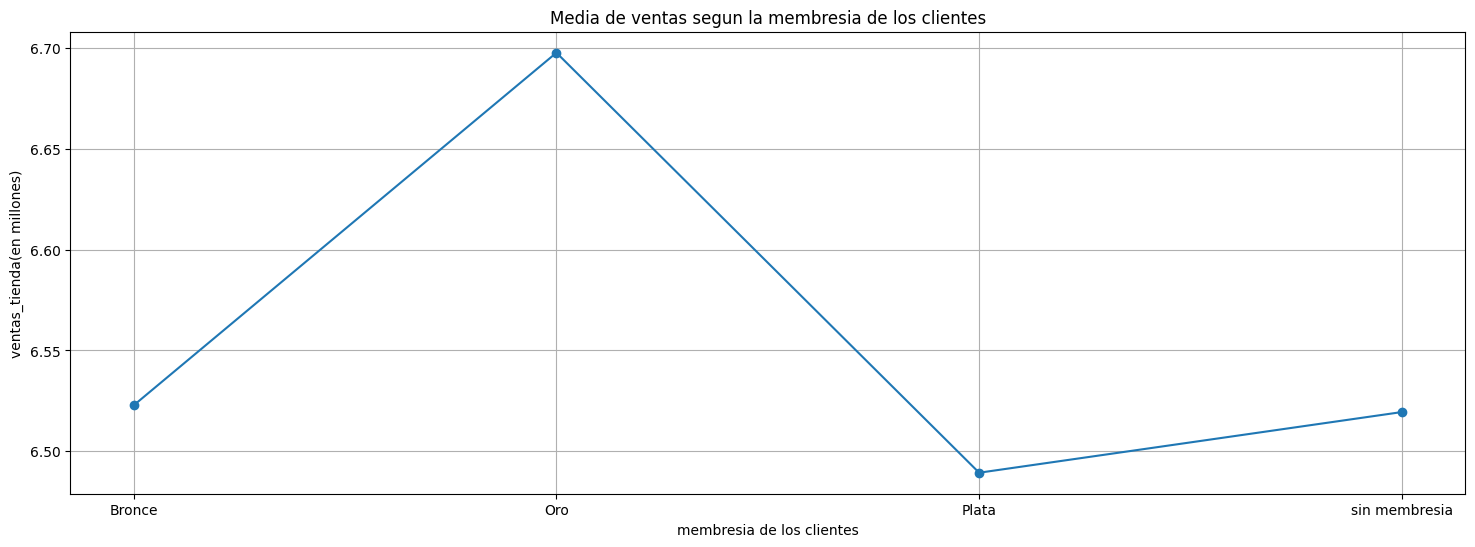

In [ ]:
# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_renombrado.groupby("miembro")["ventas_tienda(en millones)"].mean(), marker='o', linestyle='-')
plt.title('Media de ventas segun la membresia de los clientes')
plt.xlabel('membresia de los clientes')
plt.ylabel('ventas_tienda(en millones)')
plt.grid(True)
plt.show()

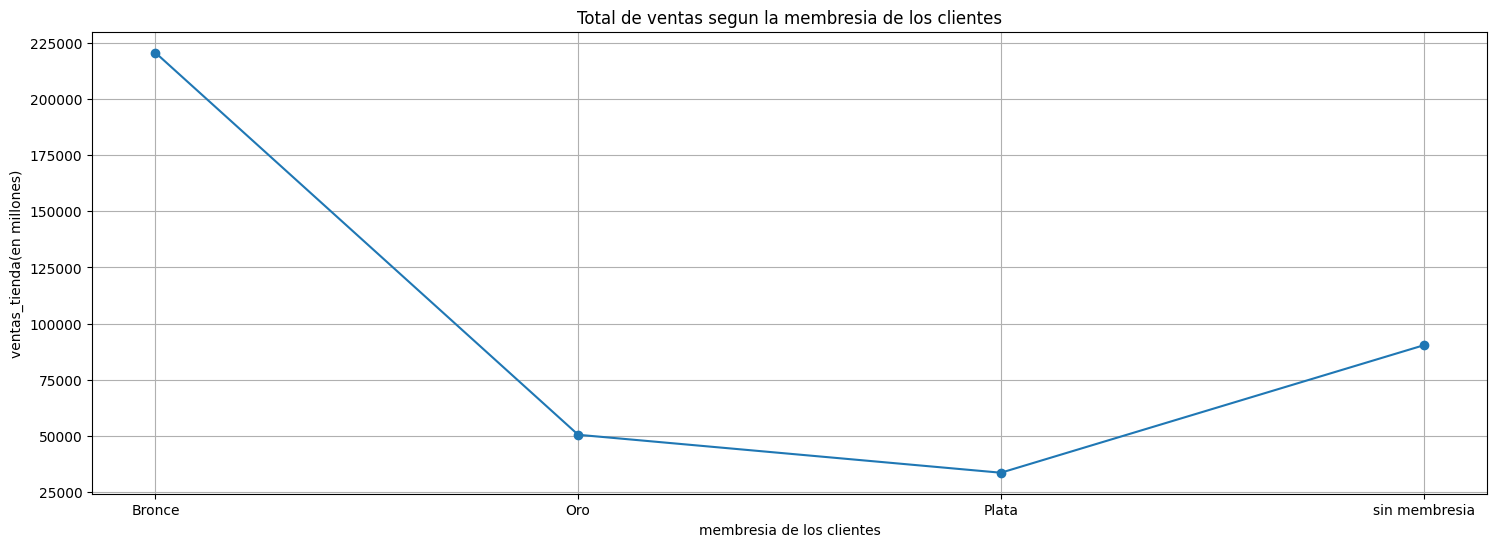

In [ ]:
# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_renombrado.groupby("miembro")["ventas_tienda(en millones)"].sum(), marker='o', linestyle='-')
plt.title('Total de ventas segun la membresia de los clientes')
plt.xlabel('membresia de los clientes')
plt.ylabel('ventas_tienda(en millones)')
plt.grid(True)
plt.show()

Observaciones:

* Las membresias plata acuden a los supermercados con las peores ventas promedio.
* Las membresias bronce acuden los segundos supermercados con mejores ventas promedio.
* Las membresias Oro acuden a los supermercados con las mejores ventas promedio.
* Los clientes sin membresia acuden a los supermercados con las segundas peores ventas promedio.

Hipotesis:

* Segun la membresia que compren los clientes demuestra la fidelizacion y la proactividad en preferir comprar en la linea de supermercados. Tambien tienden a gastar mas facilmente en la tienda. Lo anterior segun porque las ventas son mayores por cada o muy alta por algunos clientes dando un mejor promedio.

* Los miembros plata rompen la hipotesis anterior porque la membresia plata esta estrategicamente hecha para incentivar la compra de una membresia oro o bronce.

* Si obtenemos el total de ventas y no el promedio se puede percibir que las membresia de cobre es la que da la mayor cantidad de dinero en dolares a linea de supermercados y los siguientes son los que no tienen membresia. Sin embargo las tiendas a las que acuden los miembros oro son pocas pero con una cantidad elevada de ventas. Se puede decir que los supermercados en los que compran los clientes con membresia oro tienen mas ventas de manera individual y que los supermercados de los clientes bronce tienen en total mayores ventas.

#### Cuales son las categorias de alimentos con mayores ventas y costos? Y Cuales es la distribucion de los departamentos con las mejores categorias de alimentos resueltos con la anterior pregunta?


In [ ]:
conteo = df_renombrado['categoria_alimento'].value_counts(normalize=True)*100
conteo

categoria_alimento
Vegetales                       12.312173
Alimentos para picar            11.449990
Productos lácteos                6.346396
Carne                            5.141656
Fruta                            5.096975
Mermeladas y jaleas              4.219898
Productos para hornear           3.222016
Alimentos para el desayuno       3.220361
Pan                              2.973787
Sopa enlatada                    2.849672
Cerveza y vino                   2.631231
Productos de papel               2.594824
Productos de baño                2.568346
Eléctrico                        2.555107
Dulces                           2.545178
Postres congelados               2.392930
Especialidades                   1.942808
Alimentos ricos en almidón       1.825313
Revistas                         1.606871
Productos de cocina              1.603561
Huevos                           1.575429
Bebidas calientes                1.474482
Higiene                          1.375190
Analgésicos                      1.370226
Pizza                            1.358642
Bebidas carbonatadas             1.294102
Bebidas de jugo puro             1.257695
Suministros de limpieza          1.237837
Acompañamientos                  0.994572
Platos preparados congelados     0.984643
Bebidas                          0.961475
Productos de plástico            0.956510
Artículos de ferretería          0.951546
Remedios para el resfriado       0.660290
Descongestionantes               0.655325
Atún enlatado                    0.653670
Mariscos                         0.620573
Anchoas enlatadas                0.352486
Almejas enlatadas                0.329318
Velas                            0.322698
Misceláneos                      0.321043
Ostras enlatadas                 0.312769
Camarones enlatados              0.301185
Vegetales envasados              0.296220
Sardinas enlatadas               0.282981
Name: proportion, dtype: float64

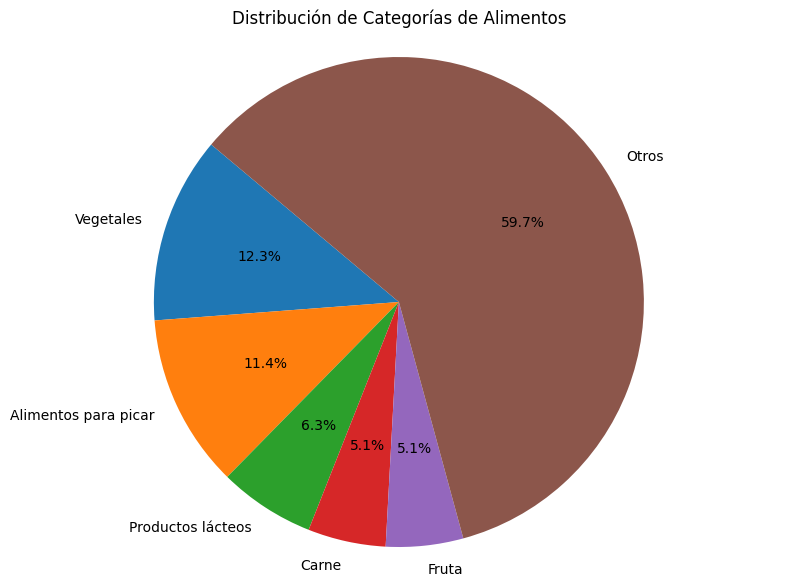

In [ ]:

# Calcular los porcentajes de frecuencia para cada categoría de alimentos
conteo = df_renombrado['categoria_alimento'].value_counts(normalize=True) * 100

# Obtener las cuatro categorías más frecuentes
top_4_categorias = conteo.nlargest(5)

# Calcular la frecuencia del resto de las categorías y agruparlas como "Otros"
otros = conteo[5:].sum()

# Crear una serie combinada con las cuatro categorías más frecuentes y "Otros"
conteo_final = pd.concat([top_4_categorias, pd.Series({'Otros': otros})])

# Crear el gráfico de pastel
plt.figure(figsize=(10, 7))
plt.pie(conteo_final, labels=conteo_final.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de Categorías de Alimentos')
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea un círculo
plt.show()


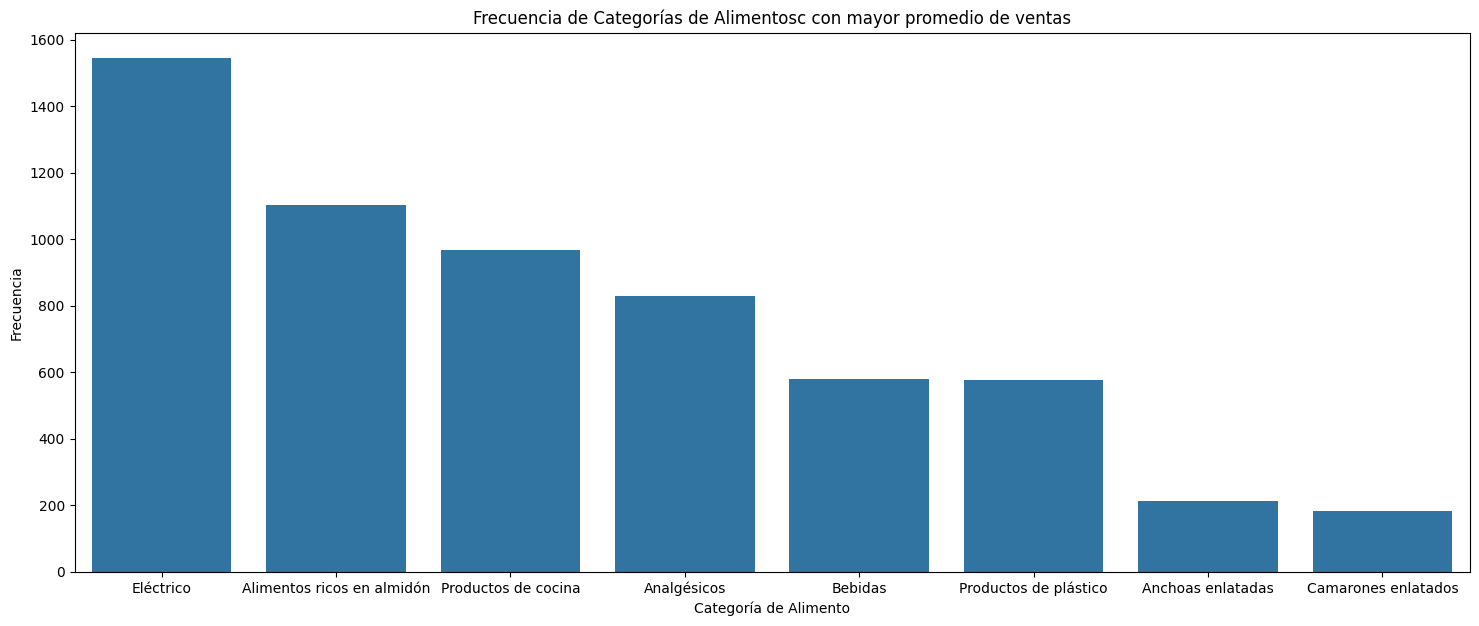

In [ ]:
# Obtener las top 6 categorías de alimentos por ventas promedio
top_10_categorias_ventas_2 = df_renombrado.groupby('categoria_alimento')['ventas_tienda(en millones)'].mean().nlargest(8).reset_index()

# Filtrar el DataFrame para incluir solo las top 6 categorías de alimentos
categorias_2 = df_renombrado[df_renombrado["categoria_alimento"].isin(top_10_categorias_ventas_2["categoria_alimento"])]

# Contar la frecuencia de cada categoría de alimentos
categoria_counts = categorias_2['categoria_alimento'].value_counts()

# Ordenar las categorías por frecuencia
orden_categorias = categoria_counts.index

# Crear la gráfica de barras con seaborn, ordenando por frecuencia
plt.figure(figsize=(18, 7))
sns.countplot(data=categorias_2, x='categoria_alimento', order=orden_categorias)

plt.xlabel('Categoría de Alimento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Categorías de Alimentosc con mayor promedio de ventas')

plt.show()

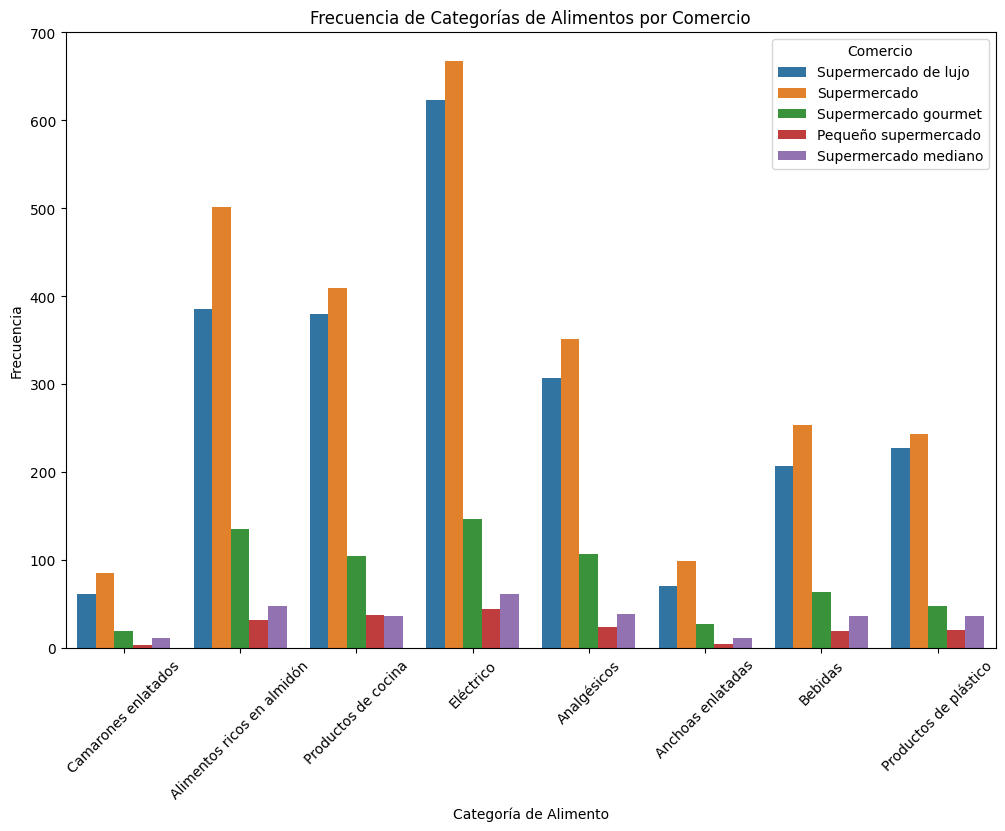

In [ ]:
# Crear la gráfica de barras apiladas con seaborn
plt.figure(figsize=(12, 8))
sns.countplot(data=categorias_2, x='categoria_alimento', hue='comercio')

plt.xlabel('Categoría de Alimento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Categorías de Alimentos por Comercio')
plt.legend(title='Comercio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [ ]:
categorias_2.groupby("categoria_alimento")["ventas_tienda(en millones)"].sum()

categoria_alimento
Alimentos ricos en almidón     7790.06
Analgésicos                    6511.23
Anchoas enlatadas              1664.65
Bebidas                        4220.94
Camarones enlatados            1448.43
Eléctrico                     11147.72
Productos de cocina            6823.04
Productos de plástico          4622.67
Name: ventas_tienda(en millones), dtype: float64

In [ ]:
df_renombrado.groupby("categoria_alimento")["ventas_tienda(en millones)"].sum().sort_values(ascending=False)

categoria_alimento
Vegetales                       50067.64
Alimentos para picar            47726.96
Productos lácteos               25705.33
Carne                           21206.17
Fruta                           20134.93
Mermeladas y jaleas             15400.78
Pan                             11813.05
Alimentos para el desayuno      11328.06
Productos para hornear          11313.59
Eléctrico                       11147.72
Productos de papel              10767.78
Sopa enlatada                   10419.14
Dulces                          10141.97
Cerveza y vino                  10096.61
Productos de baño                9403.80
Postres congelados               9329.26
Alimentos ricos en almidón       7790.06
Especialidades                   7394.15
Productos de cocina              6823.04
Analgésicos                      6511.23
Huevos                           6398.62
Revistas                         6207.53
Bebidas calientes                5856.23
Pizza                            4889.95
Suministros de limpieza          4729.24
Productos de plástico            4622.67
Bebidas carbonatadas             4467.83
Bebidas de jugo puro             4458.40
Higiene                          4445.85
Bebidas                          4220.94
Platos preparados congelados     4183.06
Artículos de ferretería          3895.05
Acompañamientos                  3358.02
Mariscos                         2470.42
Atún enlatado                    2320.84
Remedios para el resfriado       2184.32
Descongestionantes               2169.40
Anchoas enlatadas                1664.65
Camarones enlatados              1448.43
Almejas enlatadas                1274.46
Misceláneos                      1273.89
Vegetales envasados              1180.37
Ostras enlatadas                 1165.60
Velas                             986.08
Sardinas enlatadas                868.28
Name: ventas_tienda(en millones), dtype: float64

In [ ]:
df_renombrado.groupby("categoria_alimento")["costo_tienda(en millones)"].sum().sort_values(ascending=False)

categoria_alimento
Vegetales                       20059.2579
Alimentos para picar            19115.3878
Productos lácteos               10335.8544
Carne                            8470.7505
Fruta                            8063.4484
Mermeladas y jaleas              6132.6088
Pan                              4728.0011
Alimentos para el desayuno       4535.8428
Productos para hornear           4523.1481
Eléctrico                        4477.1918
Productos de papel               4304.3053
Sopa enlatada                    4190.5216
Dulces                           4056.9256
Cerveza y vino                   4048.5488
Productos de baño                3763.9007
Postres congelados               3735.1895
Alimentos ricos en almidón       3110.1617
Especialidades                   2966.2842
Productos de cocina              2728.9778
Analgésicos                      2621.3690
Huevos                           2558.0635
Revistas                         2490.2450
Bebidas calientes                2342.0334
Pizza                            1955.7461
Suministros de limpieza          1907.0914
Productos de plástico            1825.9742
Higiene                          1784.4037
Bebidas de jugo puro             1783.0764
Bebidas carbonatadas             1773.1219
Bebidas                          1692.8374
Platos preparados congelados     1669.8595
Artículos de ferretería          1566.0283
Acompañamientos                  1351.5997
Mariscos                          984.0403
Atún enlatado                     925.1180
Remedios para el resfriado        880.3907
Descongestionantes                867.5591
Anchoas enlatadas                 672.6467
Camarones enlatados               598.6557
Misceláneos                       509.1281
Almejas enlatadas                 497.0866
Vegetales envasados               474.6871
Ostras enlatadas                  465.5039
Velas                             400.4434
Sardinas enlatadas                345.6828
Name: costo_tienda(en millones), dtype: float64

<ipython-input-74-923286faad5a>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='categoria_alimento', data=top_10_categorias_ventas, palette='viridis', ci=None)
<ipython-input-74-923286faad5a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='categoria_alimento', data=top_10_categorias_ventas, palette='viridis', ci=None)


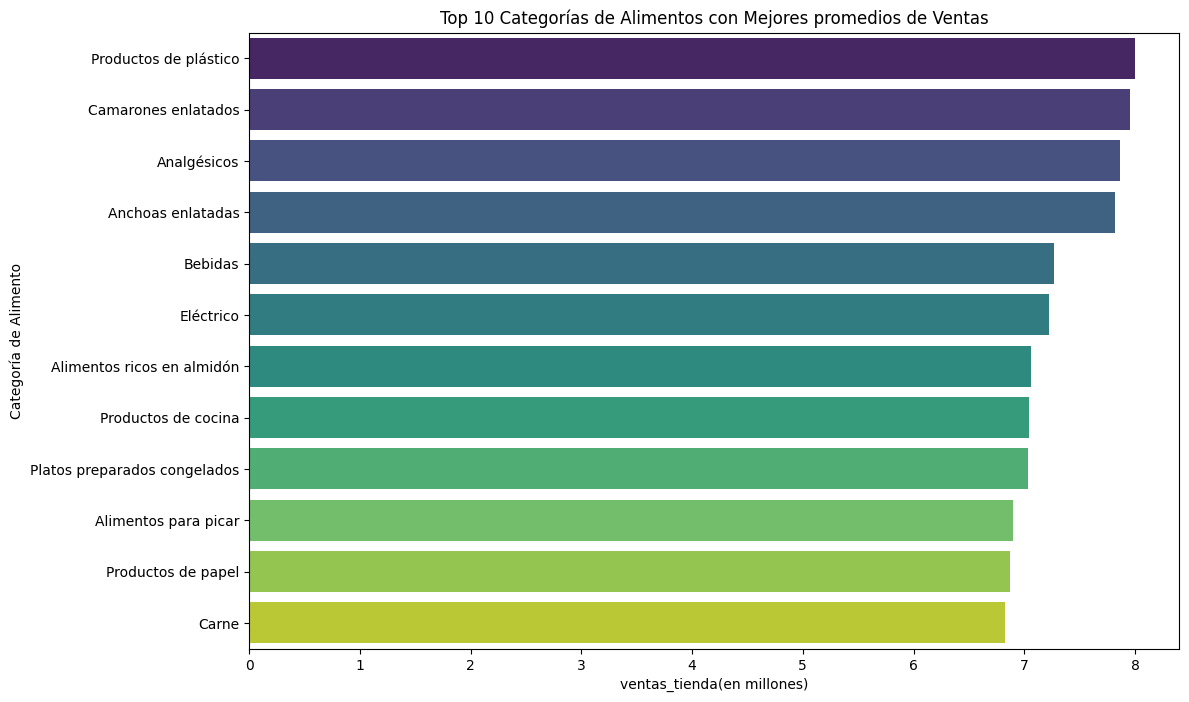

In [ ]:

# Obtener las 10 categorías de alimentos con mejores ingresos anuales
top_10_categorias_ventas = df_renombrado.groupby('categoria_alimento')['ventas_tienda(en millones)'].mean().nlargest(12).reset_index()

# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='ventas_tienda(en millones)', y='categoria_alimento', data=top_10_categorias_ventas, palette='viridis', ci=None)
plt.title('Top 10 Categorías de Alimentos con Mejores promedios de Ventas')
plt.xlabel('ventas_tienda(en millones)')
plt.ylabel('Categoría de Alimento')
plt.show()


<ipython-input-75-e0cdd55a2c9e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categorias_costos["categoria_alimento"], y=top_10_categorias_costos["costo_tienda(en millones)"], palette='coolwarm')


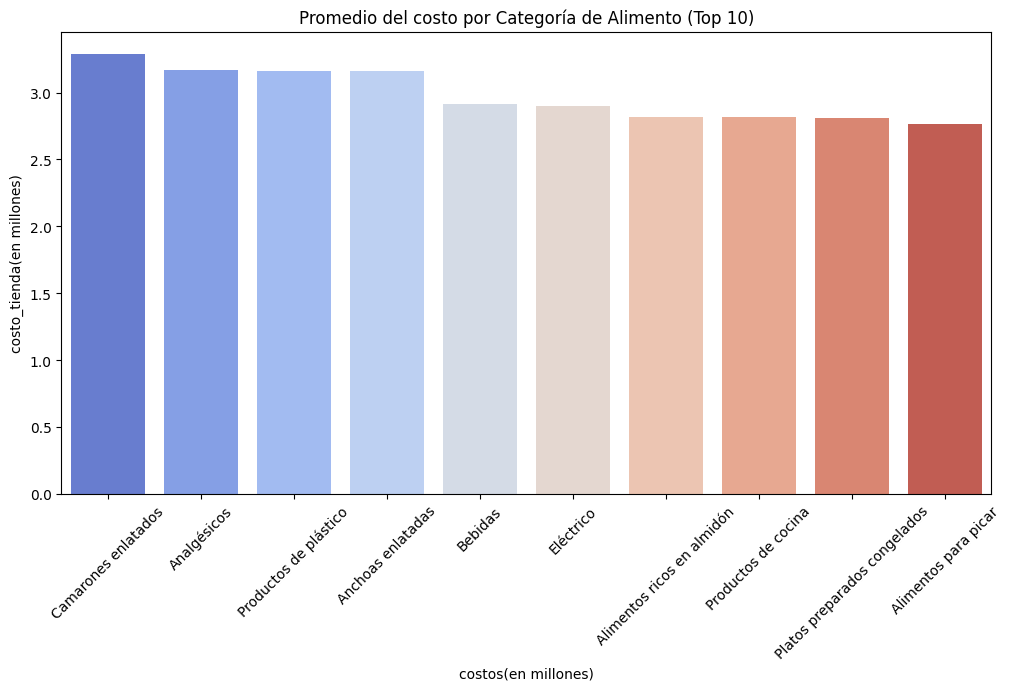

In [ ]:

# Calcular el promedio de costo por categoría_alimento
promedio_costo_por_categoria = df_renombrado.groupby('categoria_alimento')['costo_tienda(en millones)'].mean().sort_values(ascending=False)

# Tomar los 10 mejores resultados
top_10_categorias_costos = promedio_costo_por_categoria.nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categorias_costos["categoria_alimento"], y=top_10_categorias_costos["costo_tienda(en millones)"], palette='coolwarm')
plt.title('Promedio del costo por Categoría de Alimento (Top 10)')
plt.xlabel('costos(en millones)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-76-c3644199ddb6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categorias_costos["categoria_alimento"], y=top_10_categorias_costos["costo_tienda(en millones)"], palette='coolwarm')


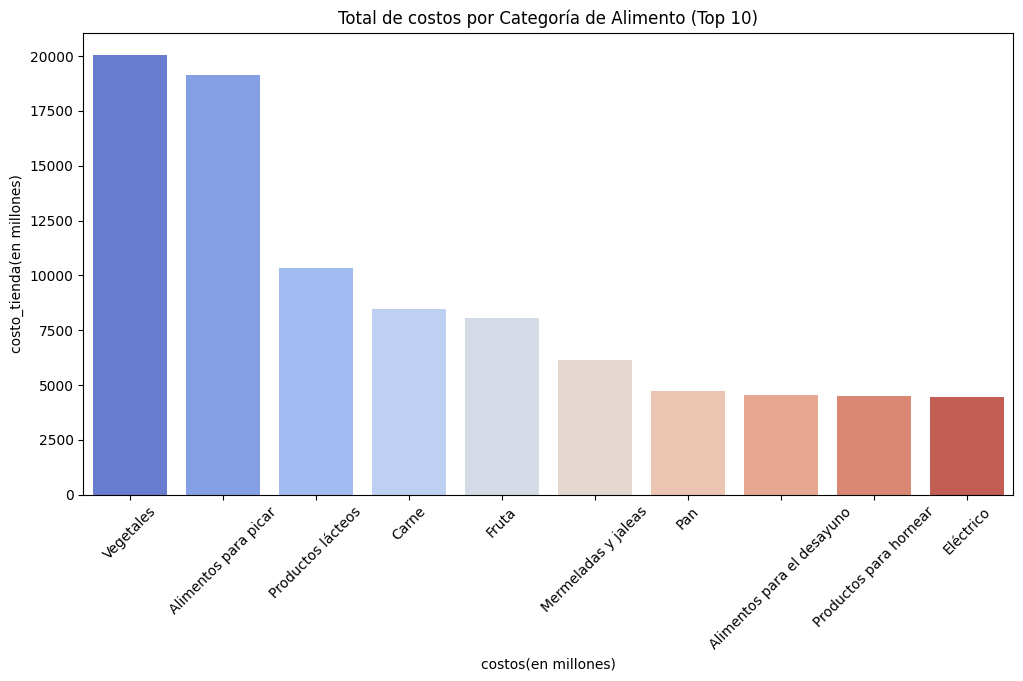

In [ ]:

# Calcular el promedio de costo por categoría_alimento
total_costo_por_categoria = df_renombrado.groupby('categoria_alimento')['costo_tienda(en millones)'].sum().sort_values(ascending=False)

# Tomar los 10 mejores resultados
top_10_categorias_costos = total_costo_por_categoria.nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categorias_costos["categoria_alimento"], y=top_10_categorias_costos["costo_tienda(en millones)"], palette='coolwarm')
plt.title('Total de costos por Categoría de Alimento (Top 10)')
plt.xlabel('costos(en millones)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-77-fe648f83c2ed>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='categoria_alimento', data=top_10_categorias_ventas, palette='viridis', ci=None)
<ipython-input-77-fe648f83c2ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='categoria_alimento', data=top_10_categorias_ventas, palette='viridis', ci=None)


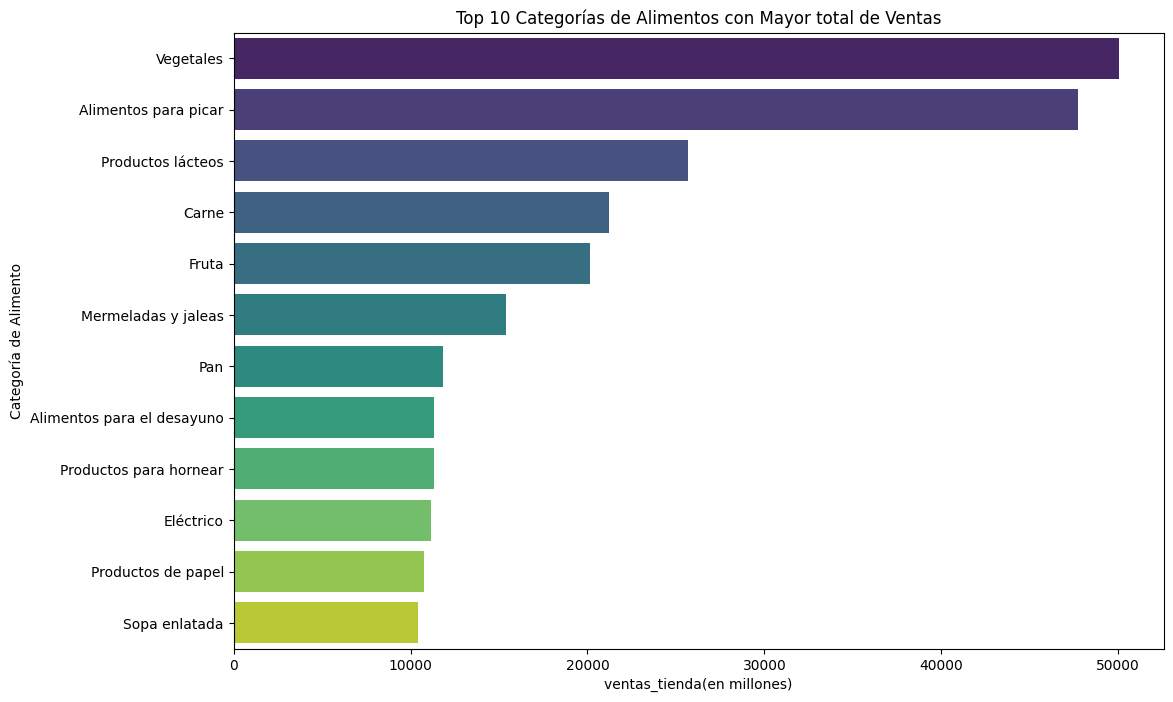

In [ ]:

# Obtener las 10 categorías de alimentos con mejores ingresos anuales
top_10_categorias_ventas = df_renombrado.groupby('categoria_alimento')['ventas_tienda(en millones)'].sum().nlargest(12).reset_index()

# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='ventas_tienda(en millones)', y='categoria_alimento', data=top_10_categorias_ventas, palette='viridis', ci=None)
plt.title('Top 10 Categorías de Alimentos con Mayor total de Ventas')
plt.xlabel('ventas_tienda(en millones)')
plt.ylabel('Categoría de Alimento')
plt.show()


In [ ]:
mejor_venta = df_renombrado[df_renombrado["categoria_alimento"].isin(top_10_categorias_ventas["categoria_alimento"])]["departamento"]
mejor_venta.unique()
mayor_costo = df_renombrado[df_renombrado["categoria_alimento"].isin(top_10_categorias_costos["categoria_alimento"])]["departamento"]

In [ ]:

df_departamento_ventas = df_renombrado[df_renombrado["departamento"].isin(mejor_venta)].groupby("departamento")["ventas_tienda(en millones)"].mean().nlargest(10).reset_index()
df_departamento_costos = df_renombrado[df_renombrado["departamento"].isin(mayor_costo)].groupby("departamento")["costo_tienda(en millones)"].mean().nlargest(10).reset_index()
df_renombrado.groupby("categoria_alimento")["departamento"].unique()

categoria_alimento
Acompañamientos                                                     [Charcutería]
Alimentos para el desayuno      [Alimentos congelados, Alimentos para el desay...
Alimentos para picar                                       [Alimentos para picar]
Alimentos ricos en almidón                           [Alimentos ricos en almidón]
Almejas enlatadas                                           [Alimentos enlatados]
Analgésicos                                                     [Salud e higiene]
Anchoas enlatadas                                           [Alimentos enlatados]
Artículos de ferretería                 [Artículos para el hogar, Caja de salida]
Atún enlatado                                               [Alimentos enlatados]
Bebidas                                                                 [Bebidas]
Bebidas calientes                                                       [Bebidas]
Bebidas carbonatadas                                                    [Bebidas]
Bebidas de jugo puro                                                    [Bebidas]
Camarones enlatados                                         [Alimentos enlatados]
Carne                                  [Carne, Charcutería, Alimentos congelados]
Cerveza y vino                                              [Bebidas alcohólicas]
Descongestionantes                                              [Salud e higiene]
Dulces                                                                   [Snacks]
Eléctrico                                               [Artículos para el hogar]
Especialidades                                      [Productos frescos, Carrusel]
Fruta                                    [Productos frescos, Productos enlatados]
Higiene                                                         [Salud e higiene]
Huevos                                                                   [Huevos]
Mariscos                                                               [Mariscos]
Mermeladas y jaleas                                      [Productos para hornear]
Misceláneos                                                      [Caja de salida]
Ostras enlatadas                                            [Alimentos enlatados]
Pan                                                         [Productos horneados]
Pizza                                                      [Alimentos congelados]
Platos preparados congelados                               [Alimentos congelados]
Postres congelados                                         [Alimentos congelados]
Productos de baño                      [Salud e higiene, Artículos para el hogar]
Productos de cocina                                     [Artículos para el hogar]
Productos de papel                                      [Artículos para el hogar]
Productos de plástico                                   [Artículos para el hogar]
Productos lácteos                                             [Productos lácteos]
Productos para hornear                                   [Productos para hornear]
Remedios para el resfriado                                      [Salud e higiene]
Revistas                                               [Publicaciones periódicas]
Sardinas enlatadas                                          [Alimentos enlatados]
Sopa enlatada                                               [Alimentos enlatados]
Suministros de limpieza                                 [Artículos para el hogar]
Vegetales                       [Productos frescos, Alimentos congelados, Alim...
Vegetales envasados                                           [Productos frescos]
Velas                                                   [Artículos para el hogar]
Name: departamento, dtype: object

<ipython-input-80-a8bbb955aada>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='departamento', data=df_departamento_ventas, palette='viridis', ci=None)
<ipython-input-80-a8bbb955aada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='departamento', data=df_departamento_ventas, palette='viridis', ci=None)


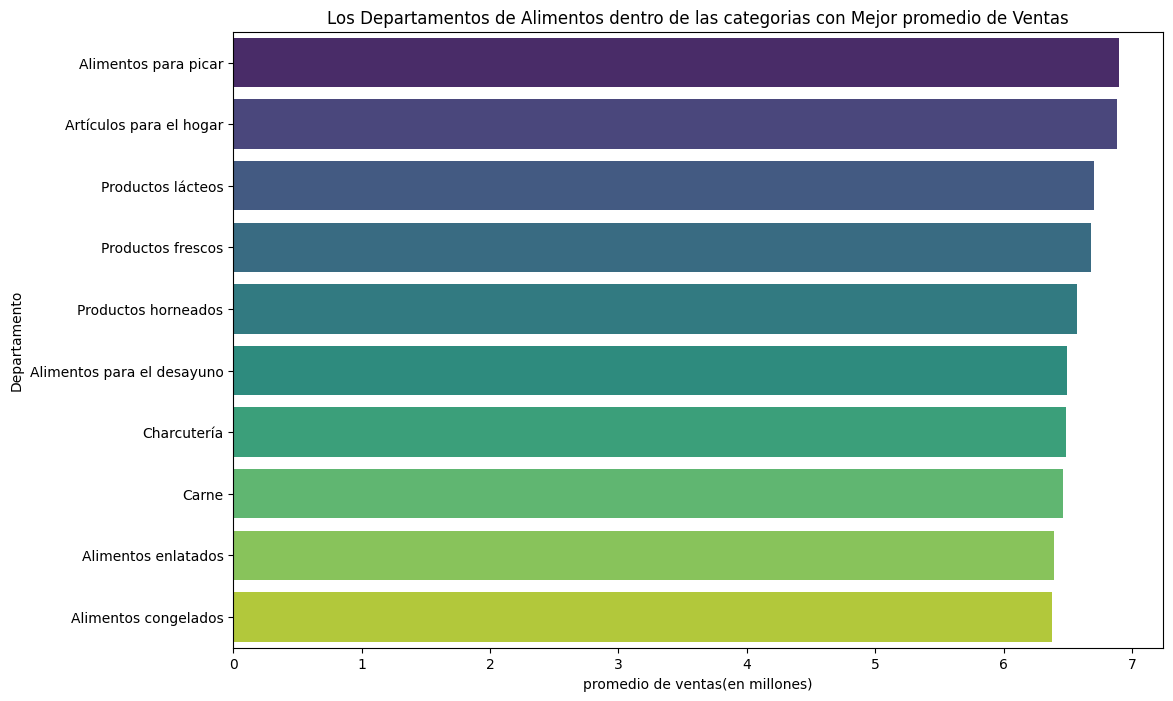

In [ ]:
# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='ventas_tienda(en millones)', y='departamento', data=df_departamento_ventas, palette='viridis', ci=None)
plt.title('Los Departamentos de Alimentos dentro de las categorias con Mejor promedio de Ventas')
plt.xlabel('promedio de ventas(en millones)')
plt.ylabel('Departamento')
plt.show()


<ipython-input-81-42393155da14>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='costo_tienda(en millones)', y='departamento', data=df_departamento_costos, palette='viridis', ci=None)
<ipython-input-81-42393155da14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='costo_tienda(en millones)', y='departamento', data=df_departamento_costos, palette='viridis', ci=None)


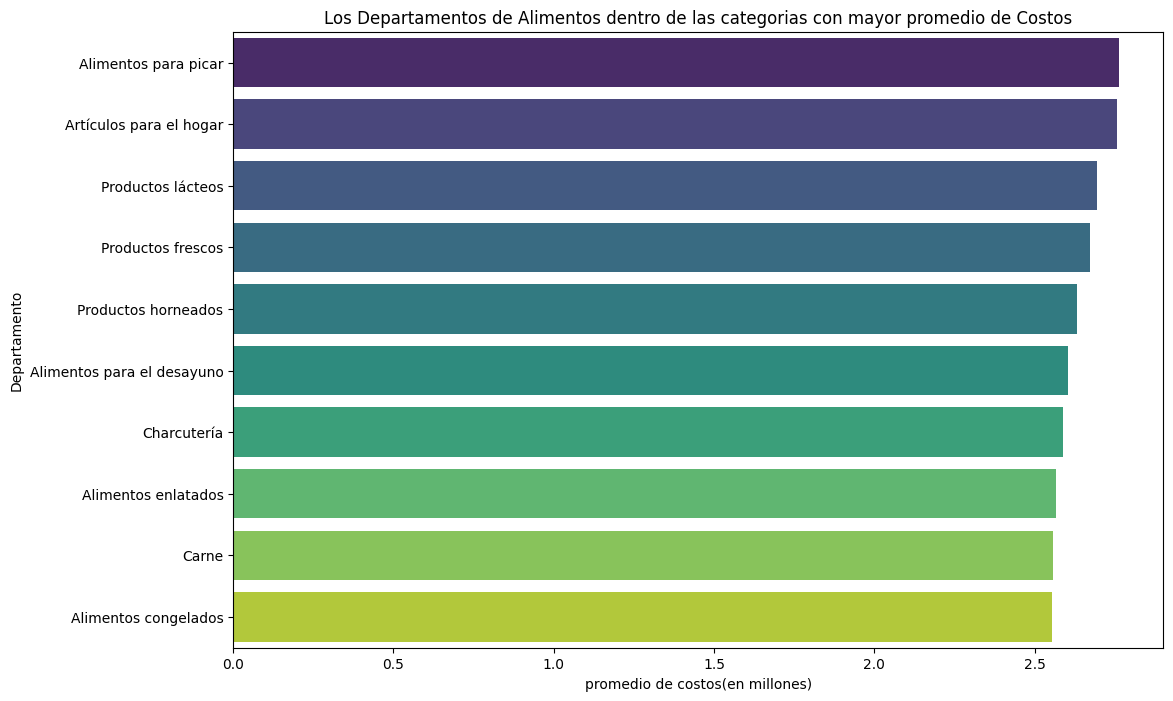

In [ ]:
# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='costo_tienda(en millones)', y='departamento', data=df_departamento_costos, palette='viridis', ci=None)
plt.title('Los Departamentos de Alimentos dentro de las categorias con mayor promedio de Costos')
plt.xlabel('promedio de costos(en millones)')
plt.ylabel('Departamento')
plt.show()

Observaciones:

* Los costos y ventas promedio de los departamentos tienen el mismo top 4.

* Las categorias y departamentos tienen un top 4, solo que resalta un poco mas la diferencia con los departamentos.

* El departamento de carne esta relacionado con tiendas con medias de supermercados con mas ventas que costos.
* Las categorias mas frecuentes no son las que tienen una media de ventas mayor. Son las que tienen un mayor total de ventas.
* El total de ventas y costos tiene el mismo orden de categorias de mayor a menor.

Hipotesis:

* Las categorias tienen un departamento enlazado a ellas, salvo algunas excepciones.

* Las categorias y departamentos tienen graficas parecidas de ventas y costos promedio porque cada categoria tiene un departamento, salvo contadas excepciones.

* Las categorias mas frecuentes no son las que tienen una media de ventas mayor porque tienen datos de tiendas que bajan la media de ventas por que son las mas frecuentes dentro de los datos. Y a diferencia de  algunas mas vendidas que tienen poca frecuencia y que sin embargo tienen una venta mas elevada, ya que sus valores se concentran en supermercados con mayores ventas.

* Son importantes las categoria de alimentos mas frecuentes porque son los mas comunes dentro de los supermercados como vegetales, carnes congeladas, etc. Al ser los mas frecuentes significa que se encuentran en la mayoria de tiendas de la linea de supermercados. Y si consideramos el total y no el promedio son las mismas categorias. Estas son las que tienen las mayores ventas.

* Las categorias de alimentos con mayor promedio de ventas son las menos frecuentes, estas no estan tipificadas por algun tipo de comercio. Sin embargo tienen una relacion cantidad y ventas estrecha, es decir que la mayoria de los supermercados en donde se ubica la categoria tiene unas ventas altas, igualmente los costos.

* El orden de categorias de mayor a menor es el mismo por total de ventas y costos, es decir que las ventas por categoria crecen linealmente con los costos y viceversa.

#### Cuales son las Marcas con mayores ventas y costos? Y cuales son las Marcas mas conocidas?

<ipython-input-82-0283ff51bd83>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='marca', data=top_10_marcas, palette='viridis', ci=None)
<ipython-input-82-0283ff51bd83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='marca', data=top_10_marcas, palette='viridis', ci=None)


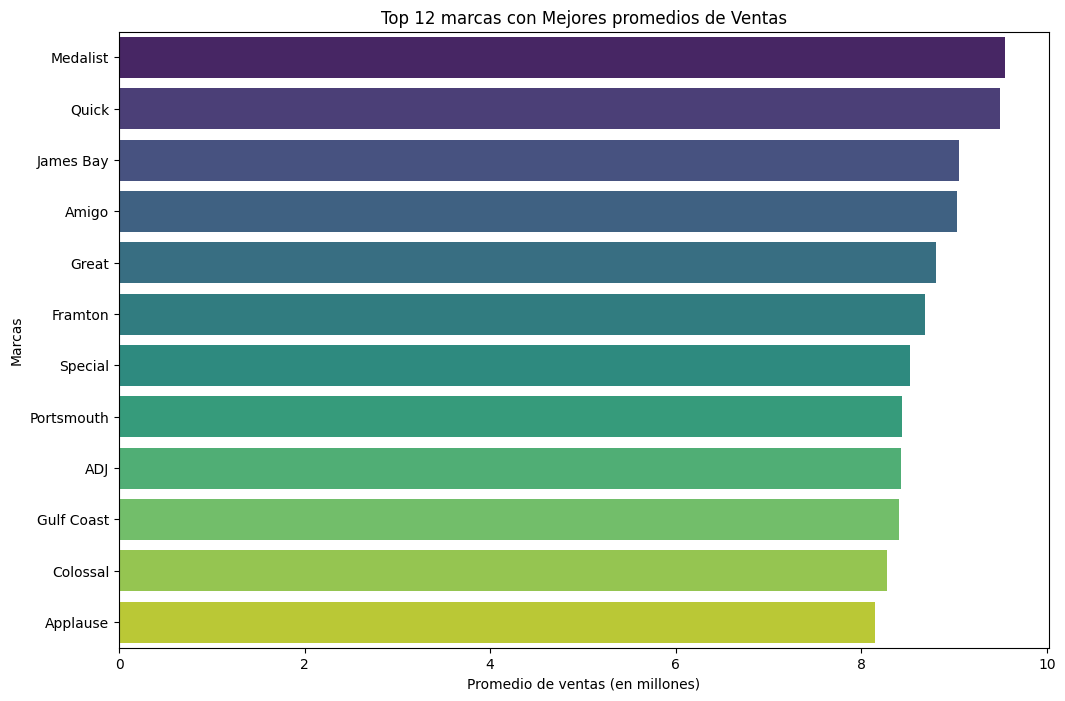

In [ ]:
top_10_marcas = df_renombrado.groupby('marca')['ventas_tienda(en millones)'].mean().nlargest(12).reset_index()

# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='ventas_tienda(en millones)', y='marca', data=top_10_marcas, palette='viridis', ci=None)
plt.title('Top 12 marcas con Mejores promedios de Ventas')
plt.xlabel('Promedio de ventas (en millones)')
plt.ylabel('Marcas')
plt.show()

<ipython-input-83-b84e5f40bcfb>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='marca', data=top_10_marcas, palette='viridis', ci=None)
<ipython-input-83-b84e5f40bcfb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ventas_tienda(en millones)', y='marca', data=top_10_marcas, palette='viridis', ci=None)


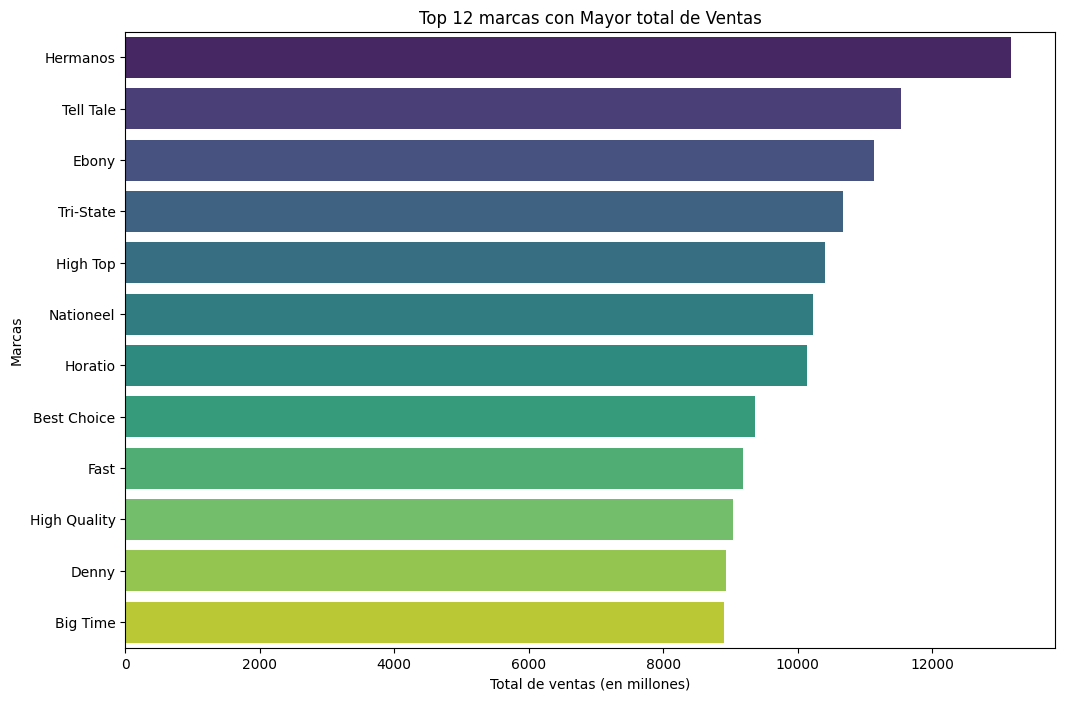

In [ ]:
top_10_marcas = df_renombrado.groupby('marca')['ventas_tienda(en millones)'].sum().nlargest(12).reset_index()

# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='ventas_tienda(en millones)', y='marca', data=top_10_marcas, palette='viridis', ci=None)
plt.title('Top 12 marcas con Mayor total de Ventas')
plt.xlabel('Total de ventas (en millones)')
plt.ylabel('Marcas')
plt.show()

<ipython-input-84-58afc0db0e48>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_marcas_costo.index, y=top_10_marcas_costo.values, palette='coolwarm')


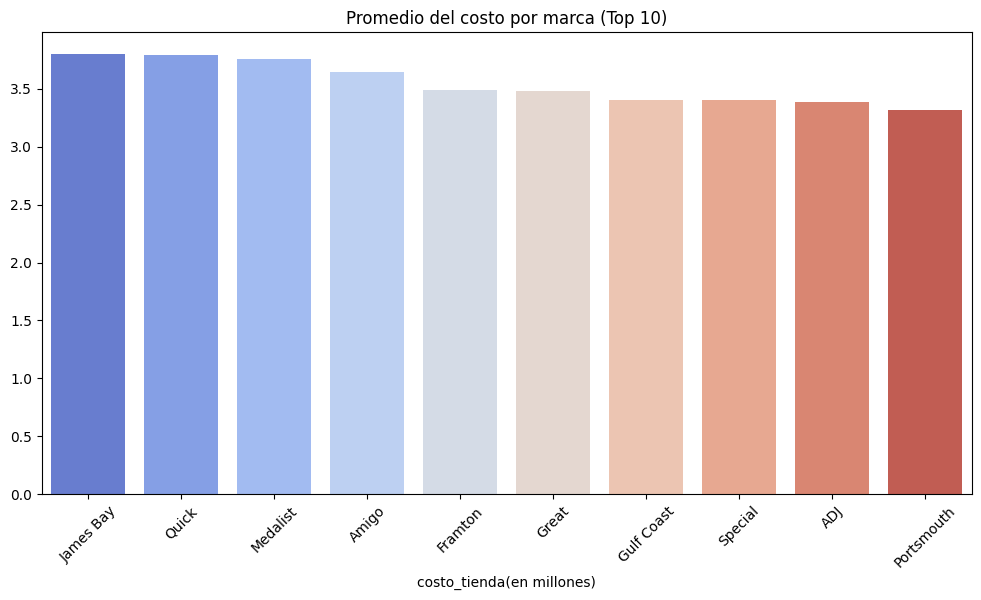

In [ ]:
promedio_costo_por_marca = df_renombrado.groupby('marca')['costo_tienda(en millones)'].mean().sort_values(ascending=False)

# Tomar los 10 mejores resultados
top_10_marcas_costo = promedio_costo_por_marca.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_marcas_costo.index, y=top_10_marcas_costo.values, palette='coolwarm')
plt.title('Promedio del costo por marca (Top 10)')
plt.xlabel('costo_tienda(en millones)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-85-e0894751f0e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_marcas_costo.index, y=top_10_marcas_costo.values, palette='coolwarm')


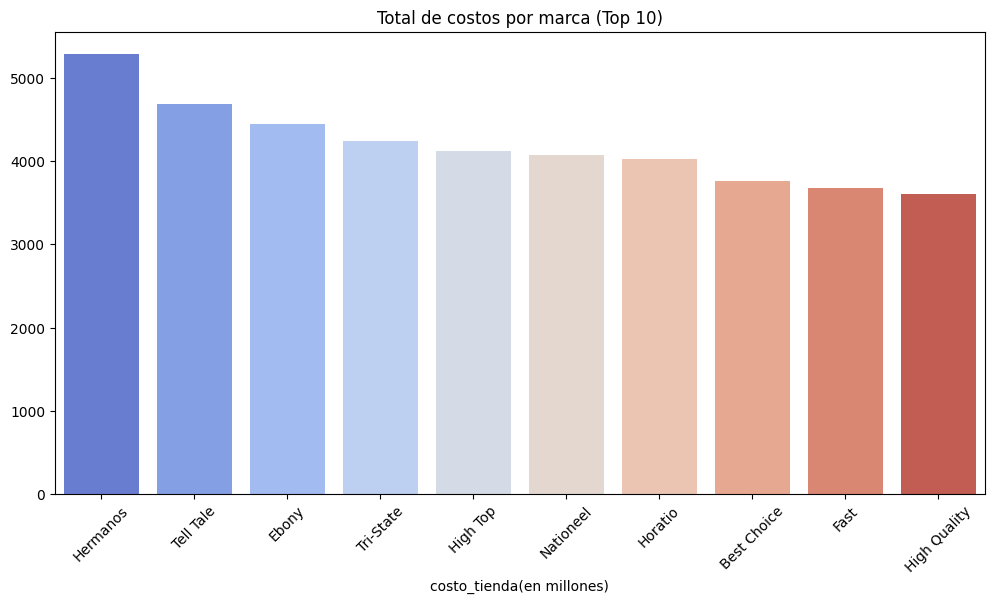

In [ ]:
total_costo_por_marca = df_renombrado.groupby('marca')['costo_tienda(en millones)'].sum().sort_values(ascending=False)

# Tomar los 10 mejores resultados
top_10_marcas_costo = total_costo_por_marca.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_marcas_costo.index, y=top_10_marcas_costo.values, palette='coolwarm')
plt.title('Total de costos por marca (Top 10)')
plt.xlabel('costo_tienda(en millones)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_renombrado["marca"].value_counts(normalize=True) * 100

marca
Hermanos     3.043291
Ebony        2.861256
Tell Tale    2.859602
Tri-State    2.702390
High Top     2.634540
               ...   
ADJ          0.092672
Symphony     0.081088
Prelude      0.074469
Toretti      0.064540
King         0.059575
Name: proportion, Length: 111, dtype: float64

In [ ]:
df_renombrado["ventas_tienda(en millones)"].describe()

count    60428.000000
mean         6.541031
std          3.463047
min          0.510000
25%          3.810000
50%          5.940000
75%          8.670000
max         22.920000
Name: ventas_tienda(en millones), dtype: float64

In [ ]:
df_filtrado = df_renombrado.loc[df_renombrado["ventas_tienda(en millones)"] >= 8.67]
df_filtrado["marca"].describe()

count        15161
unique         102
top       Hermanos
freq           600
Name: marca, dtype: object

Observaciones:

* Las 4 marcas con mayores ventas promedio mencionadas por los clientes tambien son las que tienen mayores costos promedio.

Hipotesis:

* Las marcas seleccionadas por los clientes estan conectados por la cantidad de ventas promedio de la tienda a la que acuden los clientes, por lo que objetivamente puede no dar una relacion concreta de ventas por marca. Ya que seria mejor calcular la cantidad de ventas de los productos de cada marca directamente sin usar estos datos.

* Entonces la relacion entre ventas y costos con las marcas es unida unicamente por los clientes es decir son las marcas que conocen los clientes que acuden a las tiendas con mayores ventas o costos promedio o totales. Bien puede haber una relacion pero no se conoce con exactitud. Lo que es seguro es que son las marcas identificadas por los clientes que acuden a tiendas con ventas elevadas.

* Lo que si se puede abordar con una mayor importancia es cuales son la marcas mas conocidas por los clientes de la linea de supermercados. Estas marcas son ebony, tell tale, hermanos, tri-state. Estas tambien son las que tienen un mayor total de ventas y costos.

#### Cual es la membresia con mayor cantidad de clientes:

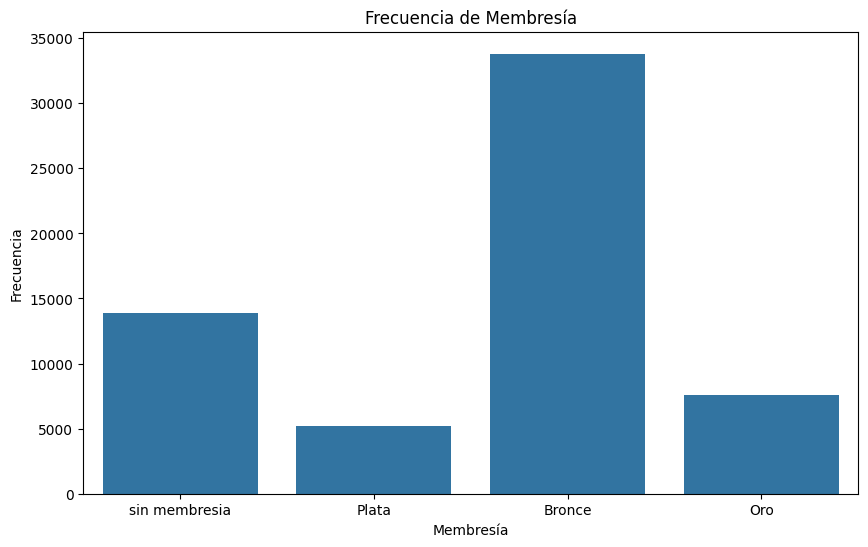

In [ ]:

# Crear un gráfico de conteo para la variable 'miembro'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_renombrado, x='miembro')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Membresía')
plt.xlabel('Membresía')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


In [ ]:
df_renombrado["miembro"].value_counts(normalize=True) * 100

miembro
Bronce           55.945919
sin membresia    22.947971
Oro              12.504137
Plata             8.601973
Name: proportion, dtype: float64

#### Cuales el numero de autos del cliente segun el tipo de comercio y membresia?

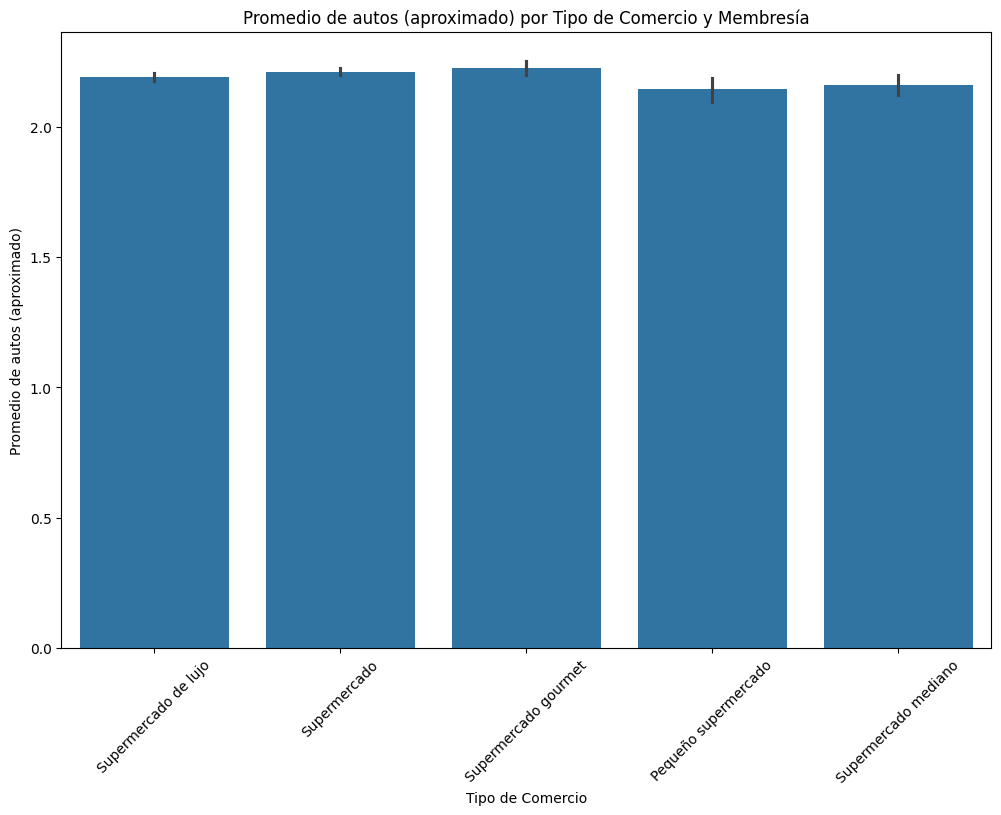

In [ ]:
# Crear un gráfico de barras para la variable 'promedio_autos(aprox)' según 'comercio' y 'miembro'
plt.figure(figsize=(12, 8))
sns.barplot(data=df_renombrado, x='comercio', y='promedio_autos(aprox)')

# Añadir títulos y etiquetas
plt.title('Promedio de autos (aproximado) por Tipo de Comercio y Membresía')
plt.xlabel('Tipo de Comercio')
plt.ylabel('Promedio de autos (aproximado)')

# Rotar las etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

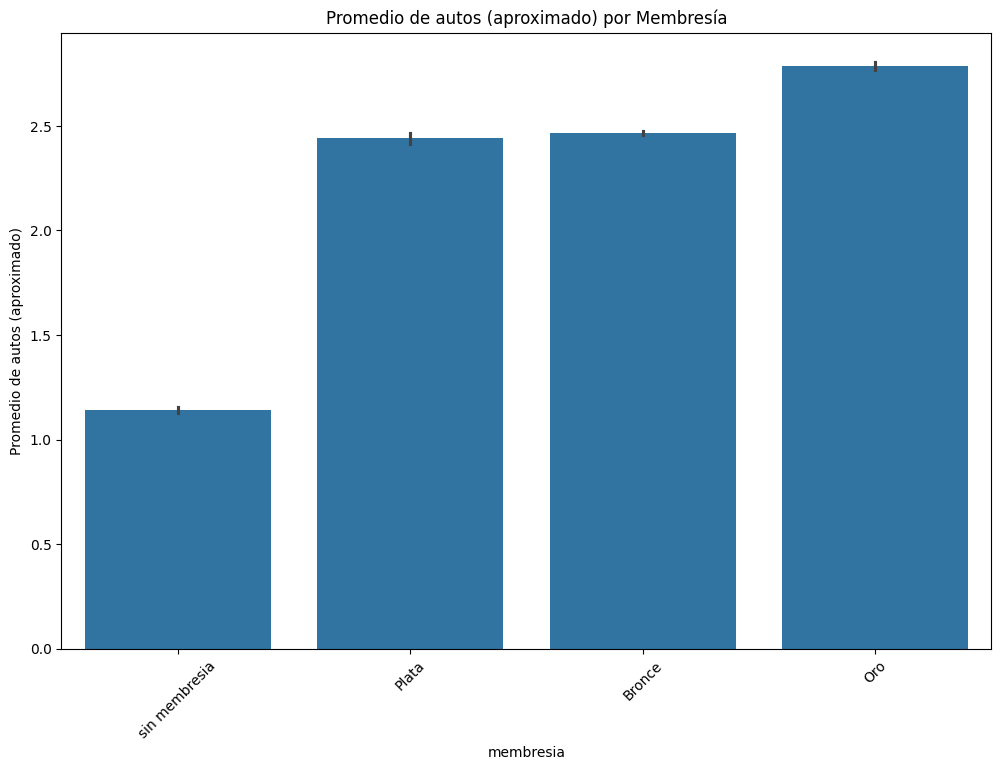

In [ ]:
# Crear un gráfico de barras para la variable 'promedio_autos(aprox)' según 'comercio' y 'miembro'
plt.figure(figsize=(12, 8))
sns.barplot(data=df_renombrado, x='miembro', y='promedio_autos(aprox)')

# Añadir títulos y etiquetas
plt.title('Promedio de autos (aproximado) por Membresía')
plt.xlabel('membresia')
plt.ylabel('Promedio de autos (aproximado)')

# Rotar las etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

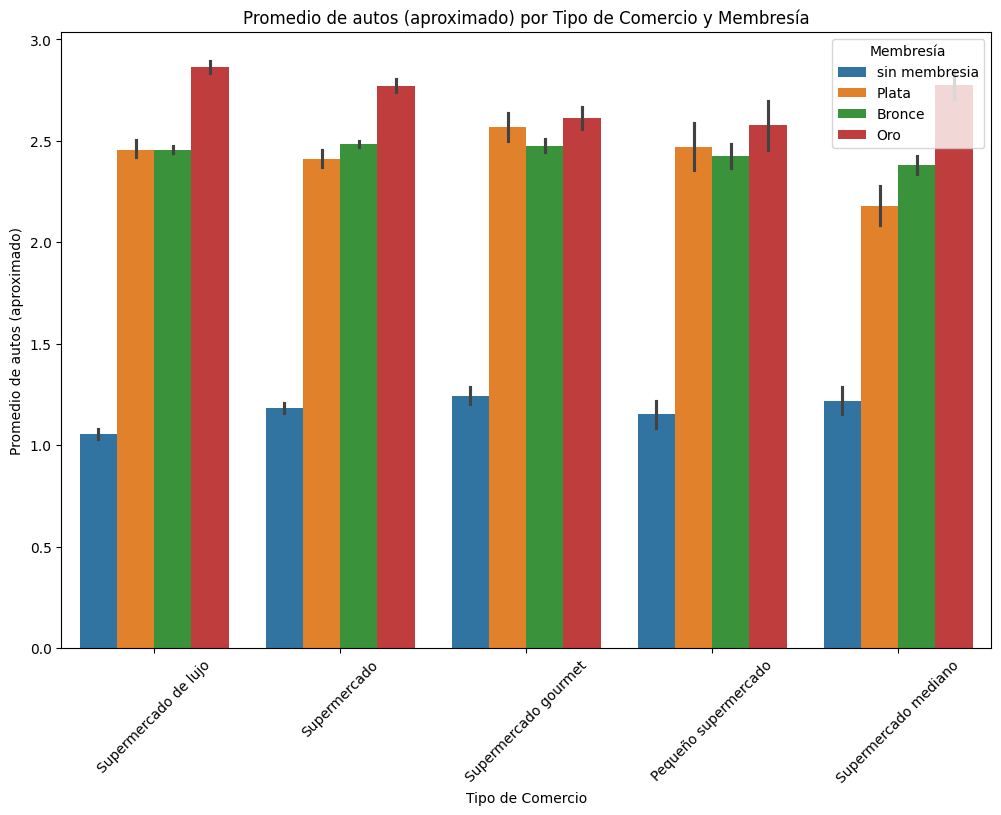

In [ ]:
# Crear un gráfico de barras para la variable 'promedio_autos(aprox)' según 'comercio' y 'miembro'
plt.figure(figsize=(12, 8))
sns.barplot(data=df_renombrado, x='comercio', y='promedio_autos(aprox)', hue='miembro')

# Añadir títulos y etiquetas
plt.title('Promedio de autos (aproximado) por Tipo de Comercio y Membresía')
plt.xlabel('Tipo de Comercio')
plt.ylabel('Promedio de autos (aproximado)')
plt.legend(title='Membresía', loc='upper right')

# Rotar las etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Observaciones:

*  Promedio de autos por tipo de supermercado no muestra diferencias significativas.
*  Los que no tienen membresia tienen la menor cantidad de autos.
* Los que tienen membresias oro son los que tienen la mayor cantidad de autos.
* Los que tienen membresias plata y bronce tienen una cantidad de autos parecida.
* Las membresias plata y bronce cambian de orden segun la mayor cantidad de autos en la mayoria de los supermercados a excepcion del supermercado de lujo.

Hipotesis:

* Segun mas alta en valor sea la membresia mayor es la media de los autos de quienes la compran.



#### Hay alguna relacion entre membresia y categoria alimento/marca con mayores ventas?

In [ ]:
marcas_con_mayor_total = df_renombrado[df_renombrado["marca"].isin(top_10_marcas["marca"])]
categorias = df_renombrado[df_renombrado["categoria_alimento"].isin(top_10_categorias_ventas["categoria_alimento"])]

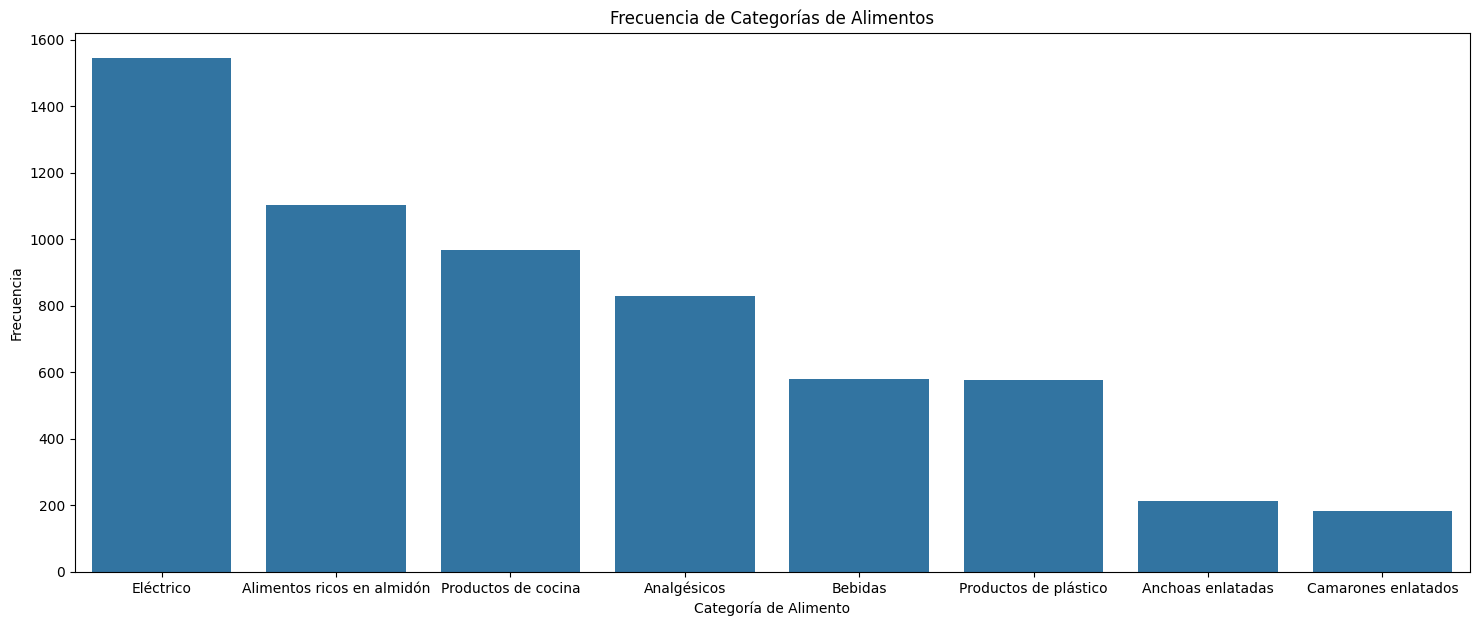

In [ ]:
# Obtener las top 6 categorías de alimentos por ventas promedio
top_10_categorias_ventas_2 = df_renombrado.groupby('categoria_alimento')['ventas_tienda(en millones)'].mean().nlargest(8).reset_index()

# Filtrar el DataFrame para incluir solo las top 6 categorías de alimentos
categorias_2 = df_renombrado[df_renombrado["categoria_alimento"].isin(top_10_categorias_ventas_2["categoria_alimento"])]

# Contar la frecuencia de cada categoría de alimentos
categoria_counts = categorias_2['categoria_alimento'].value_counts()

# Ordenar las categorías por frecuencia
orden_categorias = categoria_counts.index

# Crear la gráfica de barras con seaborn, ordenando por frecuencia
plt.figure(figsize=(18, 7))
sns.countplot(data=categorias_2, x='categoria_alimento', order=orden_categorias)

plt.xlabel('Categoría de Alimento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Categorías de Alimentos')

plt.show()

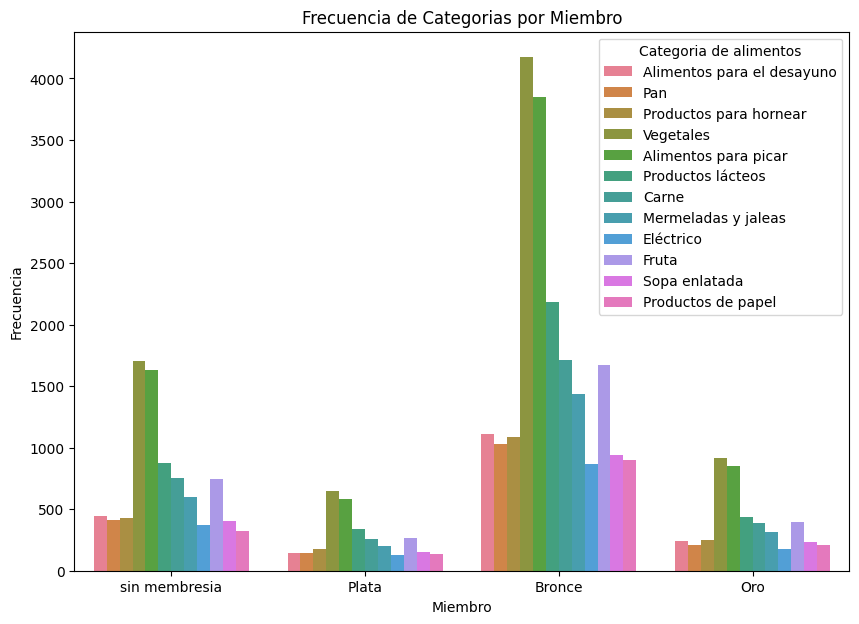

In [ ]:
# Crear la gráfica de barras con seaborn
plt.figure(figsize=(10, 7))
sns.countplot(data=categorias, x='miembro', hue='categoria_alimento')

plt.xlabel('Miembro')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Categorias por Miembro')
plt.legend(title='Categoria de alimentos')
plt.show()

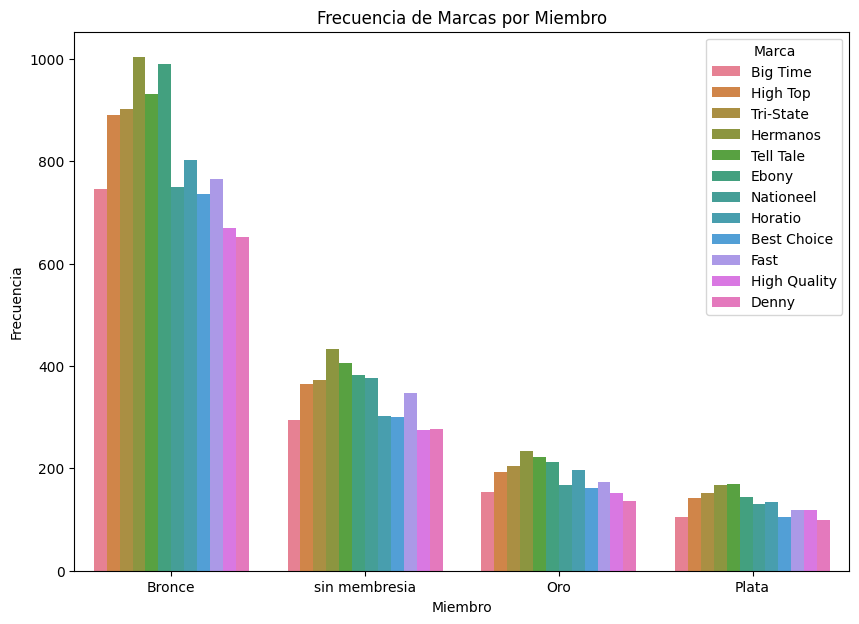

In [ ]:
# Crear la gráfica de barras con seaborn
plt.figure(figsize=(10, 7))
sns.countplot(data=marcas_con_mayor_total, x='miembro', hue='marca')

plt.xlabel('Miembro')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Marcas por Miembro')
plt.legend(title='Marca')
plt.show()

Observaciones:

* El orden es el mismo en la mayoria de graficas, aunque una rompe un poco con el orden es la grafica de marcas.

* En la grafica de marcas en la membresia bronce cambia ligeramente el segundo y tercer marca con mayor frecuencia.

Hipotesis:

* No se ve algo determinante para suponer que existe alguna distincion por membresia segun las marcas o categorias.

#### Hay alguna relacion entre escolaridad y categoria alimento/marca con mayores ventas?

In [ ]:
marcas_con_mayor_total = df_renombrado[df_renombrado["marca"].isin(top_10_marcas["marca"])]
categorias = df_renombrado[df_renombrado["categoria_alimento"].isin(top_10_categorias_ventas["categoria_alimento"])]

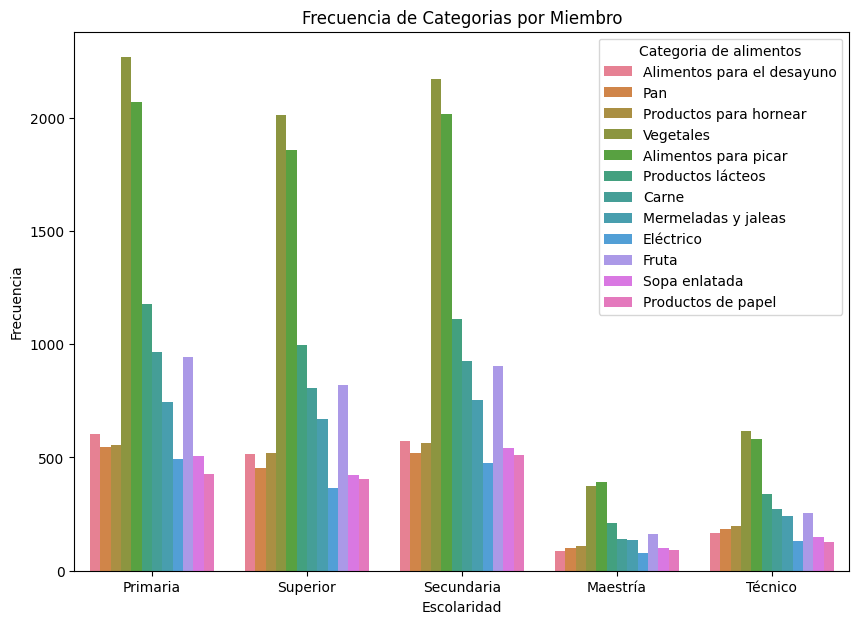

In [ ]:
# Crear la gráfica de barras con seaborn
plt.figure(figsize=(10, 7))
sns.countplot(data=categorias, x='escolaridad', hue='categoria_alimento')

plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Categorias por Miembro')
plt.legend(title='Categoria de alimentos')
plt.show()

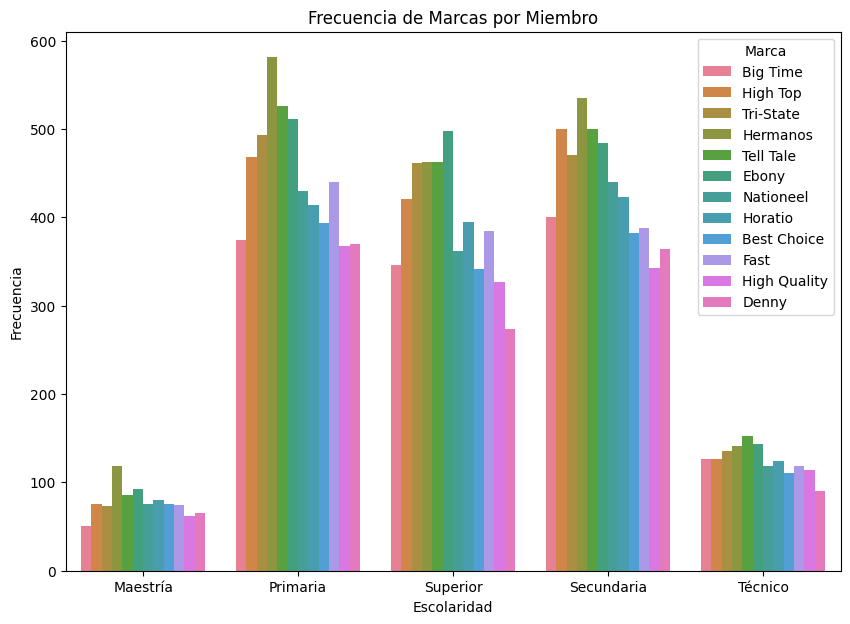

In [ ]:
# Crear la gráfica de barras con seaborn
plt.figure(figsize=(10, 7))
sns.countplot(data=marcas_con_mayor_total, x='escolaridad', hue='marca')

plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Marcas por Miembro')
plt.legend(title='Marca')
plt.show()

Observaciones:

* El orden es el mismo en la mayoria de graficas, a excepcion de la grafica de marcas.

* La marca hermanos es la mas frecuente en primaria, secundaria y maestria.

* La marca ebony es la mas frecuente en la escolaridad superior.

* La marca tell tale es la mas frecuente para la escolaridad tecnico.

* La grafica de marcas/escolaridad tiene dos distribuciones distintas. Primaria, secundaria y maestria en una y tecnica, superior en la otra.
Aunque en la segunda distribucion los picos cambian de marca.

* las dos categorias de alimentos con mas frecuencia en la grafica escolaridades es vegetales y alimentos para picar.

Hipotesis:

* No se ve algo determinante para suponer que existe alguna distincion por membresia segun las categorias.

* La grafica de marcas muestra distincion segun la escolaridad en los picos y orden de frecuencia de las marcas.

#### Hay alguna relacion en el total de hijos con la membresia?

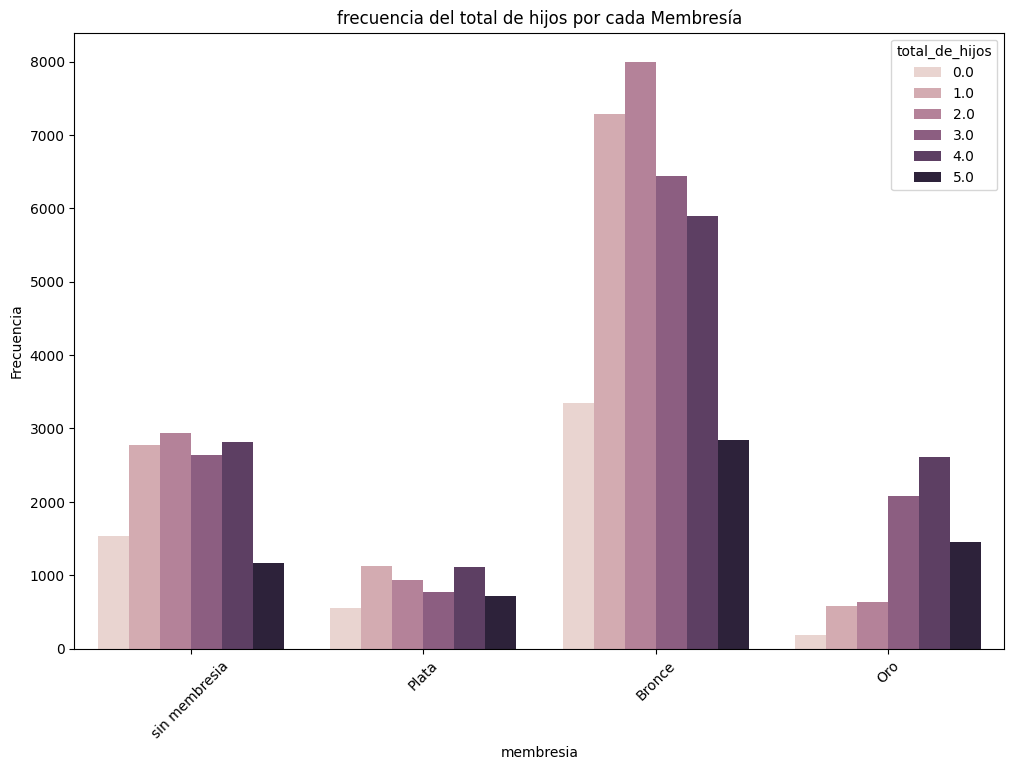

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_renombrado, x='miembro', hue='total_de_hijos')

# Añadir títulos y etiquetas
plt.title('frecuencia del total de hijos por cada Membresía')
plt.xlabel('membresia')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

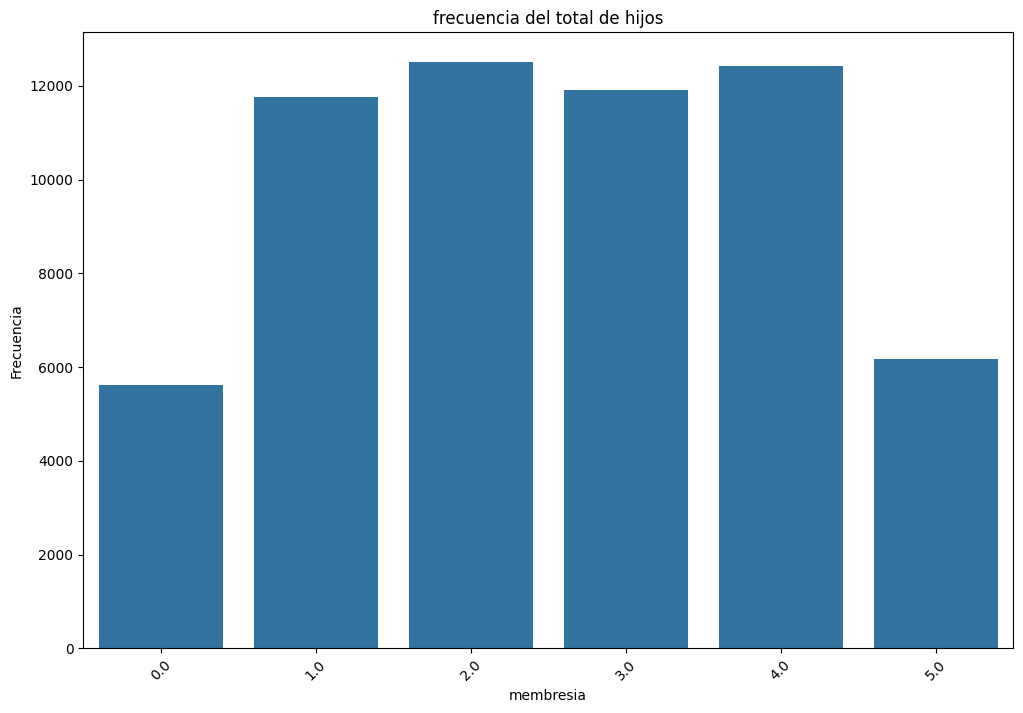

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_renombrado, x='total_de_hijos')

# Añadir títulos y etiquetas
plt.title('frecuencia del total de hijos')
plt.xlabel('membresia')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

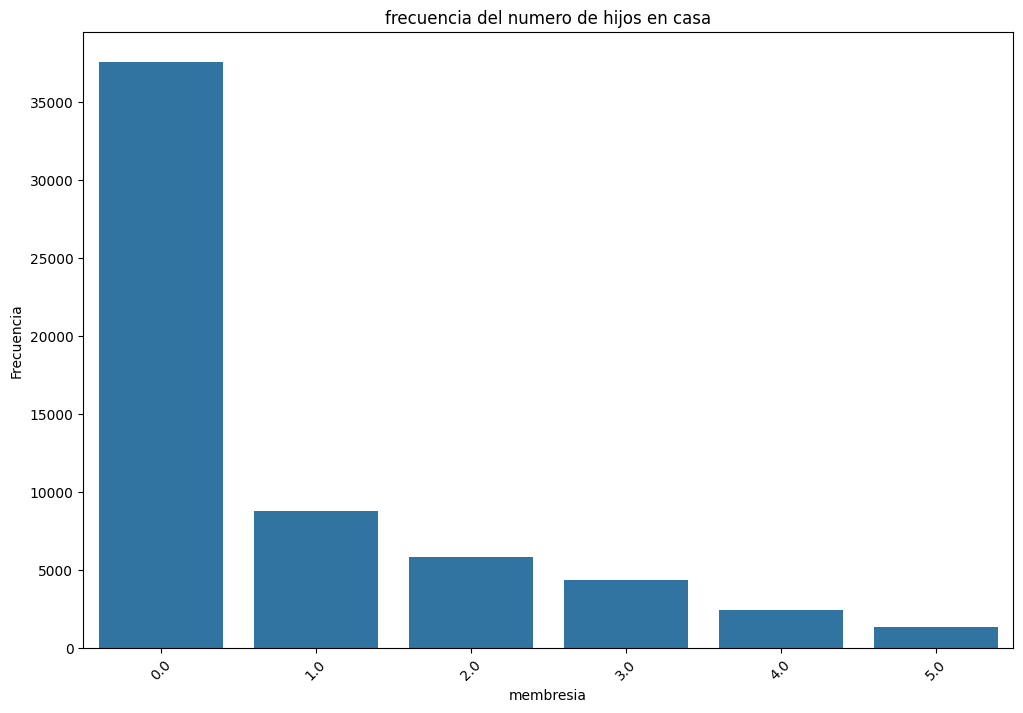

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_renombrado, x='numero_hijos_casa')

# Añadir títulos y etiquetas
plt.title('frecuencia del numero de hijos en casa')
plt.xlabel('membresia')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

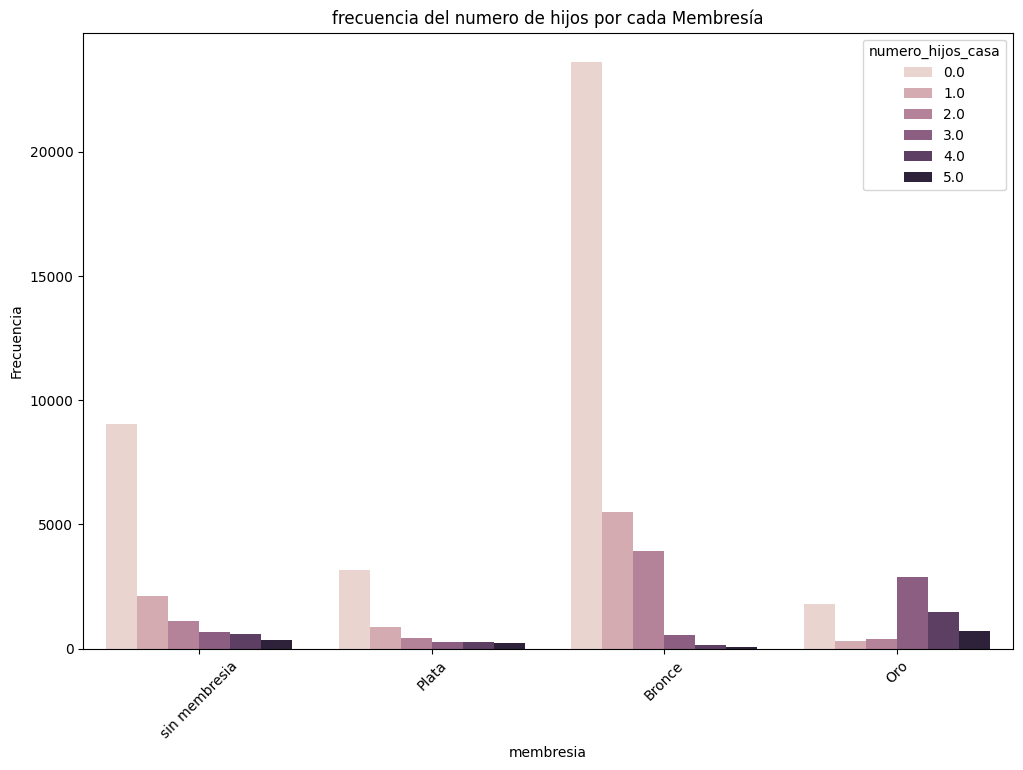

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_renombrado, x='miembro', hue='numero_hijos_casa')

# Añadir títulos y etiquetas
plt.title('frecuencia del numero de hijos por cada Membresía')
plt.xlabel('membresia')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Observaciones:

* Los clientes sin membresia tienen casi la misma cantidad de datos con 1,2,3,4 hijos.

* Los clientes plata tienen 2 picos de 1 y 4 hijos. Es decir que los clientes con membresia plata son mas frecuentes a tener 1 o 4 hijos.

* Los clientes bronce son mas frecuentes con un 2 hijos. Aunque no tiene una diferencia elevada a su frecuencia con 1 hijo.

* Los clientes Oro tienen una mayor frecuencia a tener 4 hijos.

* El numero de hijos en casa mas frecuente es 0.

* Los clientes Oro tiene una frecuencia mas alta en 3 hijos en casa.

* La frecuencia de sin membresia, plata y cobre ronda con una mayor frecuencia en 0 numero de hijos en casa.


Hipotesis:

* Entre mas elevada la membresia es mayor la frecuencia en un numero mas elevado de hijos. Explicando sería en sin membresia los valores se mantienen sin tantas diferencias porque son clientes potenciales. En la membresia cobre los valores mas frecuentes estan entre 1 a 2 hijos, con un pico centrado en 2 hijos. En la membresia plata hay dos picos en el primer hijo pero tambien en el cuarto hijo, centradose la distribucion en estos dos valores. Y en la membresia Oro el pico se traslado hacia la derecha con los 4 hijos centrandose unicamente en los valores mas cercanos del pico. Por lo anterior considero que hay un relacion directa entre membresia e total de hijos.

* La grafica de frecuencia de numero de hijos en casa tiene una frecuencia muy alta de 0 y viendo la grafica de frecuencia de total de hijos con una distribucion centrada en 1,2,3,4, me hace pensar que la mayoria de clientes tienen edades superiores a 35 años puesto que sus hijos ya son indepedientes.

* Los clientes oro tienen una mayor frecuencia de 3 hijos en casa son los unicos con un pico distinto de 0 hijos. Esto puede decir que los clientes con un 3 o mas numero de hijos en casa estan mas dispuestos a costear la membresia oro ya que las ventajas que tiene la membresia les convienen especialmente por la cantidad de hijos a cuidar. Aunque en la distibucion aun se nota que hay una cantidad considerable de clientes con 0 numero de hijos en casa por lo que puede que esten interesados por otras razones este grupo de personas en la membresia oro.

* El que la mayoria de clientes hayan tenido hijos y que la mayoria de clientes no los tenga en casa indica que son personas casadas o divorciadas que pueden estar acudiendo al supermercado por apego o rutina. Puede que haya una relacion emocional entre el cliente, su familia y la linea de supermercados puesto que un supermercado esta atribuido con la necesidad de alimentarte a ti o tu familia, tambien mucha publicidad esta dedicada a los niños lo que lleva a que cada ida del supermercado se gaste en comida chatarra o juguetes. Por lo anterior creo que se aborda una emocion de proteccion y cuidado de un padre de familia a sus hijos e incluso otras emociones. Para simplificar es una accion causada por una emocion guiada por la costumbre o nostalgia del padre de familia a recuerdos de la rutina diaria de los hijos. Extendiendo seria comprar insumos para cumplir las necesidades basicas y continuar con la rutina diaria y proteccion/cuidado de sus hijos.

#### cual es la promocion mas conocida por los clientes?

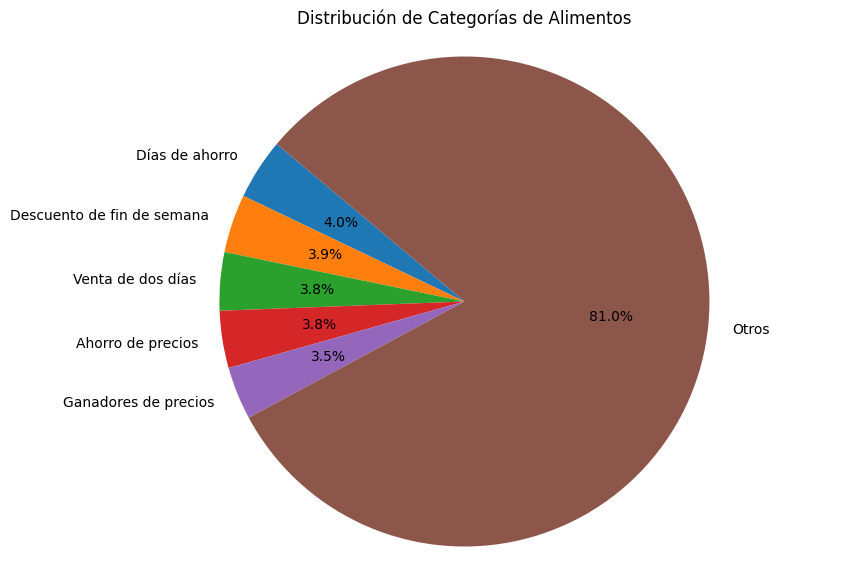

In [ ]:
conteo = df_renombrado['promocion'].value_counts(normalize=True) * 100

# Obtener las cuatro categorías más frecuentes
top_4_promociones = conteo.nlargest(5)

# Calcular la frecuencia del resto de las categorías y agruparlas como "Otros"
otros = conteo[5:].sum()

# Crear una serie combinada con las cuatro categorías más frecuentes y "Otros"
conteo_final = pd.concat([top_4_promociones, pd.Series({'Otros': otros})])

# Crear el gráfico de pastel
plt.figure(figsize=(10, 7))
plt.pie(conteo_final, labels=conteo_final.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de Categorías de Alimentos')
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea un círculo
plt.show()


Observaciones:

* La promocion dias de ahorro es la mas conocida por los clientes.

### Hipotesis y Observaciones:

Las **hipotesis y observaciones** se encuentran en cada pregunta segun sean los descubrimientos de estas mismas.

Aprendizaje:

* El promedio tiene un significado diferente de las mayores ventas puesto que es sensible a cada valor individual como a la cantidad total. El mayor promedio no significa que el valor individual de la tienda en general sean con las mayores ventas, sino que se encuentra los valores del centro de los datos en cercanias de valores mas altos de ventas. Unicamente representa una relacion mejor o peor entre el valor unico y el total. Si lo adecuamos en el contexto de la linea de supermercados significa que la mayoria de las ventas de supermercados se encuentran mas o menos entre la cercania de la media de ventas. Aunque se puede desviar mucho la media del centro (mediana) hasta valores del 75% de los datos, si hay valores extremos muy elevados o viciversa al 25% si hay valores muy bajos. Es decir la media es sensible ha valores atipicos.

* El promedio se puede interpretar para entender los valores en los que se encuentra un determinado grupo de datos en mas o menos un valor cerca de la mediana.

* El ingreso anual promedio indica mas o menos en donde se centra el conjunto de datos de los ingresos anuales.


## 4. Preprocesamiento y obtencion de datos

#### Transformacion de variables categoricas ordinales a numeros:

In [ ]:


df_copia = df_renombrado.copy()

ordinal_mapping = {
    "escolaridad": {'Primaria':1, 'Secundaria':2, 'Superior':3, 'Maestría':4, 'Técnico':5},
    "miembro": {'Plata':3, 'Oro':4, 'Bronce':2, 'sin membresia':1},
    "comercio": {'Supermercado de lujo':4, 'Supermercado':2, 'Pequeño supermercado':1,
       'Supermercado gourmet':5, 'Supermercado mediano':3}
}

df_copia.replace(ordinal_mapping, inplace=True)

# Lista de columnas categóricas nominales
columns_to_encode = ["categoria_alimento", "departamento", "tipo", "promocion", "pais", "estado_civil",
                      "genero", "divulgacion", "vivienda_propia", "marca", "ciudad", "estado","ocupacion"]

df_to_encode = df_renombrado[columns_to_encode]

# Aplicar One-Hot-Encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df_to_encode)

# Obtener nombres de las características después de la codificación
encoded_columns = encoder.get_feature_names_out(input_features=columns_to_encode)

# Crear DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenar el nuevo DataFrame codificado con el original
df_transformado = pd.concat([df_copia, encoded_df], axis=1)

# Eliminar las columnas originales que se codificaron
df_transformado = df_transformado.drop(columns=columns_to_encode)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Variables categoricas y binarias que se van a usar:

In [ ]:
["categoria_alimento","departamento","tipo","promocion","pais","estado_civil","genero","divulgacion","miembro",
 "ocupacion","vivienda_propia","marca","comercio","ciudad","estado","escolaridad","miembro", 'promedio_autos(aprox)', 'empaque_reciclable',
 'bajo_en_grasa']

['categoria_alimento',
 'departamento',
 'tipo',
 'promocion',
 'pais',
 'estado_civil',
 'genero',
 'divulgacion',
 'miembro',
 'ocupacion',
 'vivienda_propia',
 'marca',
 'comercio',
 'ciudad',
 'estado',
 'escolaridad',
 'miembro',
 'promedio_autos(aprox)',
 'empaque_reciclable',
 'bajo_en_grasa']

In [ ]:
df_transformado.head()

ventas_tienda(en millones)  costo_tienda(en millones)  \
0                        7.36                     2.7232   
1                        5.52                     2.5944   
2                        3.68                     1.3616   
3                        3.68                     1.1776   
4                        4.08                     1.4280   

   unidades_vendidas(en millones)  total_de_hijos  escolaridad  miembro  \
0                             4.0             1.0            1        1   
1                             3.0             0.0            3        3   
2                             2.0             4.0            1        1   
3                             2.0             2.0            2        2   
4                             3.0             0.0            1        2   

   promedio_autos(aprox)  ingreso_anual  numero_hijos_casa  \
0                    1.0          20000                1.0   
1                    4.0          60000                0.0   
2                    1.0          20000                0.0   
3                    2.0          40000                2.0   
4                    2.0          40000                0.0   

   promedio_autos(aprox).1  precio_recomendado  peso_bruto  peso_neto  \
0                      1.0                1.84       19.70      17.70   
1                      4.0                1.84       19.70      17.70   
2                      1.0                1.84       19.70      17.70   
3                      2.0                1.84       19.70      17.70   
4                      2.0                1.36        7.12       5.11   

   empaque_reciclable  bajo_en_grasa  unidades_por_caja  comercio  \
0                 1.0            0.0               17.0         4   
1                 1.0            0.0               17.0         4   
2                 1.0            0.0               17.0         4   
3                 1.0            0.0               17.0         4   
4                 0.0            1.0               29.0         4   

   pies_cuadrados_tienda  pies_cuadrados_comestibles  \
0                27694.0                     18670.0   
1                27694.0                     18670.0   
2                27694.0                     18670.0   
3                27694.0                     18670.0   
4                27694.0                     18670.0   

   pies_cuadrados_congelados  pies_cuadrados_carne  cafeteria  \
0                     5415.0                3610.0        1.0   
1                     5415.0                3610.0        1.0   
2                     5415.0                3610.0        1.0   
3                     5415.0                3610.0        1.0   
4                     5415.0                3610.0        1.0   

   tienda_de_videos  barra_de_ensaladas  comida_preparada  floristeria  \
0               1.0                 1.0               1.0          1.0   
1               1.0                 1.0               1.0          1.0   
2               1.0                 1.0               1.0          1.0   
3               1.0                 1.0               1.0          1.0   
4               1.0                 1.0               1.0          1.0   

    costo  categoria_alimento_Alimentos para el desayuno  \
0  126.62                                            1.0   
1   59.86                                            1.0   
2   84.16                                            1.0   
3   95.78                                            1.0   
4   50.79                                            1.0   

   categoria_alimento_Alimentos para picar  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   categoria_alimento_Alimentos ricos en almidón  \
0                                            0.0   
1                                            0.0 

#### Columnas numerales para normalizar:



'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)',"ingreso_anual","precio_recomendado","peso_bruto", "peso_neto", "pies_cuadrados_tienda", "unidades_por_caja","escolaridad", "miembro","comercio".

In [ ]:

# Columnas a estandarizar
columns_to_standardize = ['ventas_tienda(en millones)', 'costo_tienda(en millones)',
                           'unidades_vendidas(en millones)', 'ingreso_anual',
                           'precio_recomendado', 'peso_bruto', 'peso_neto',
                           'pies_cuadrados_tienda', 'unidades_por_caja',"pies_cuadrados_comestibles","pies_cuadrados_congelados",	"pies_cuadrados_carne"
                           , "costo"]

# Seleccionar solo las columnas numéricas para estandarizar
df_numeric = df_transformado[columns_to_standardize]

# Estandarizar las variables numéricas
scaler = StandardScaler()
df_transformado[columns_to_standardize] = scaler.fit_transform(df_numeric)




#### Seleccion de las variables para el modelo:





In [ ]:
df_transformado.head()

ventas_tienda(en millones)  costo_tienda(en millones)  \
0                    0.236490                   0.071398   
1                   -0.294838                  -0.017247   
2                   -0.826167                  -0.865700   
3                   -0.826167                  -0.992335   
4                   -0.710661                  -0.820002   

   unidades_vendidas(en millones)  total_de_hijos  escolaridad  miembro  \
0                        1.095643             1.0            1        1   
1                       -0.112567             0.0            3        3   
2                       -1.320778             4.0            1        1   
3                       -1.320778             2.0            2        2   
4                       -0.112567             0.0            1        2   

   promedio_autos(aprox)  ingreso_anual  numero_hijos_casa  \
0                    1.0      -1.061471                1.0   
1                    4.0       0.046757                0.0   
2                    1.0      -1.061471                0.0   
3                    2.0      -0.507357                2.0   
4                    2.0      -0.507357                0.0   

   promedio_autos(aprox).1  precio_recomendado  peso_bruto  peso_neto  \
0                      1.0           -0.295082    1.274931   1.260683   
1                      4.0           -0.295082    1.274931   1.260683   
2                      1.0           -0.295082    1.274931   1.260683   
3                      2.0           -0.295082    1.274931   1.260683   
4                      2.0           -0.809650   -1.446449  -1.427795   

   empaque_reciclable  bajo_en_grasa  unidades_por_caja  comercio  \
0                 1.0            0.0          -0.181381         4   
1                 1.0            0.0          -0.181381         4   
2                 1.0            0.0          -0.181381         4   
3                 1.0            0.0          -0.181381         4   
4                 0.0            1.0           0.988384         4   

   pies_cuadrados_tienda  pies_cuadrados_comestibles  \
0              -0.051654                   -0.116317   
1              -0.051654                   -0.116317   
2              -0.051654                   -0.116317   
3              -0.051654                   -0.116317   
4              -0.051654                   -0.116317   

   pies_cuadrados_congelados  pies_cuadrados_carne  cafeteria  \
0                   0.064819               0.06488        1.0   
1                   0.064819               0.06488        1.0   
2                   0.064819               0.06488        1.0   
3                   0.064819               0.06488        1.0   
4                   0.064819               0.06488        1.0   

   tienda_de_videos  barra_de_ensaladas  comida_preparada  floristeria  \
0               1.0                 1.0               1.0          1.0   
1               1.0                 1.0               1.0          1.0   
2               1.0                 1.0               1.0          1.0   
3               1.0                 1.0               1.0          1.0   
4               1.0                 1.0               1.0          1.0   

      costo  categoria_alimento_Alimentos para el desayuno  \
0  0.911587                                            1.0   
1 -1.312930                                            1.0   
2 -0.503228                                            1.0   
3 -0.116036                                            1.0   
4 -1.615153                                            1.0   

   categoria_alimento_Alimentos para picar  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   categoria_alimento_Alimentos ricos en almidón  \
0                                            0.0   
1                                    

'ventas_tienda(en millones)', 'costo_tienda(en millones)', "unidades_vendidas(en millones)", "ingreso_anual","precio_recomendado","peso_neto", "pies_cuadrados_tienda"pies_cuadrados_tienda ,"pies_cuadrados_comestibles" ,"pies_cuadrados_congelados","pies_cuadrados_carne", "unidades_por_caja","escolaridad", "miembro","comercio", "promedio_autos(aprox)", "comida_preparada","categoria_alimento_Alimentos para picar", "categoria_alimento_Vegetales","departamento_Alimentos para picar", "departamento_Artículos para el hogar", "total_de_hijos", "numero_hijos_casa","marca_Hermanos","marca_Ebony","marca_Tell Tale", "promocion_Descuento de fin de semana"."promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio", "divulgacion_Televisión", "divulgacion_Radio", "costo".

## 5. Clusterización

#### Explicacion del apartado:

 **Primera parte:**

Con los datos ya configurados para el modelo kmeans.
En la primera parte se realizaran pruebas con las metricas silhouette, davies bouldin y calenski-harabasz en la que al menos tiene que tener una metrica con un puntaje aceptable:

Como funciona el modelo:

El modelo k-means es un algoritmo de clustering no supervisado que agrupa datos en un número predefinido de clusters (k clusters) basándose en la similitud de los puntos. Funciona mediante la inicialización de k centroides, la asignación de cada punto de datos al cluster cuyo centroide está más cercano, y la actualización de los centroides como el promedio de los puntos asignados a cada cluster. Este proceso se repite iterativamente hasta que los centroides se estabilizan o se alcanza un número máximo de iteraciones. K-means minimiza la variación interna de los clusters, creando particiones compactas y bien separadas en el espacio de características.

Restricciones de puntajes:

* Silhouette >= 0.50;
* Davies-Bouldin <= 0.75;
* CalinskiHarabasz el número más alto posible.

**Segunda parte:**

En esta segunda parte hay crear una baseline y realizar las mismas pruebas anteriores para poder comparar los resultados y saber si los resultados son adecuados segun si son mas altos que la baseline.

 **Tercera parte:**

En esta tercera parte hay que probar la integridad dividiendo el conjunto  en 5 partes y realizando individualmente las pruebas de todas las metricas y compararlas para identificar una variacion menor del 5%.

 **Cuarta parte:**

En esta cuarta parte es la eleccion y instanciacion del modelo escogido, ademas de absorber las predicciones del modelo a un dataframe copia del original.

**Partes siguientes:**

En estas partes se usara el dataframe con las predicciones del modelo para crear graficas para describir los clusteres y realizar medidas.

### Datos a probar:

'ventas_tienda(en millones)', 'costo_tienda(en millones)', "unidades_vendidas(en millones)", "ingreso_anual","precio_recomendado","peso_neto", "pies_cuadrados_tienda"pies_cuadrados_tienda ,"pies_cuadrados_comestibles" ,"pies_cuadrados_congelados","pies_cuadrados_carne", "unidades_por_caja","escolaridad", "miembro","comercio", "promedio_autos(aprox)", "comida_preparada","categoria_alimento_Alimentos para picar", "categoria_alimento_Vegetales","departamento_Alimentos para picar", "departamento_Artículos para el hogar","tipo_comida", "total_de_hijos", "numero_hijos_casa","marca_Hermanos","marca_Ebony","marca_Tell Tale", "promocion_Descuento de fin de semana"."promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio", "divulgacion_Televisión", "divulgacion_Radio", "costo".

###Funciones:

In [ ]:


def prueba_unitaria(datos):
  # Selecciona las variables transformadas del DataFrame df_transformado
  kmeans = KMeans(n_clusters=3, max_iter=300, random_state=23, init='k-means++')

  # Ajustar el modelo a los datos
  kmeans.fit(datos)

  # Obtener las etiquetas de cluster
  labels = kmeans.labels_

  # Calcular las métricas de evaluación
  silhouette = silhouette_score(datos, labels)
  davies_bouldin = davies_bouldin_score(datos, labels)
  calinski_harabasz = calinski_harabasz_score(datos, labels)

  # Imprimir los resultados de las métricas
  print(f"Clusters={3} | Silhouette={silhouette:.3f} | Davies-Bouldin={davies_bouldin:.3f} | Calinski-Harabasz={calinski_harabasz:.3f}")

In [ ]:

min_clusters = 3
max_clusters = 10

def prueba_clusters(datos):
  # Inicializar listas para almacenar los resultados de las métricas

  silhouette_scores = []
  davies_bouldin_scores = []
  calinski_harabasz_scores = []

  # Iterar sobre diferentes números de clusters
  for n_clusters in range(min_clusters, max_clusters + 1):
      # Instanciar el modelo K-means
      kmeans = KMeans(n_clusters=n_clusters, max_iter=300, random_state=23, init='k-means++', n_init="auto")

      # Ajustar el modelo a los datos
      kmeans.fit(datos)

      # Obtener las etiquetas de cluster
      labels = kmeans.labels_

      # Calcular las métricas de evaluación
      silhouette = silhouette_score(datos, labels)
      davies_bouldin = davies_bouldin_score(datos, labels)
      calinski_harabasz = calinski_harabasz_score(datos, labels)

      # Almacenar las métricas en las listas
      silhouette_scores.append(silhouette)
      davies_bouldin_scores.append(davies_bouldin)
      calinski_harabasz_scores.append(calinski_harabasz)

  # Imprimir los resultados de las métricas
  for n_clusters in range(min_clusters, max_clusters + 1):
      idx = n_clusters - min_clusters
      print(f"Clusters={n_clusters} | Silhouette={silhouette_scores[idx]:.3f} | Davies-Bouldin={davies_bouldin_scores[idx]:.3f} | Calinski-Harabasz={calinski_harabasz_scores[idx]:.3f}")

  return silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores


In [ ]:

def generate_data(n_samples, n_features, n_clusters):
    # Generar datos sintéticos con estructura de clusters
    X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)
    return X

def baseline_kmeans(X, min_clusters, max_clusters):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        # Inicializar y ajustar el modelo K-means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_

        # Calcular métricas para el modelo K-means
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)

        # Almacenar las métricas calculadas
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)
        calinski_harabasz_scores.append(calinski_harabasz)

    # Calcular medias de las métricas
    mean_silhouette = np.mean(silhouette_scores)
    mean_davies_bouldin = np.mean(davies_bouldin_scores)
    mean_calinski_harabasz = np.mean(calinski_harabasz_scores)

    return mean_silhouette, mean_davies_bouldin, mean_calinski_harabasz

def run_baseline(n_samples, n_features, n_clusters_range):
    # Generar datos sintéticos
    X = generate_data(n_samples, n_features, n_clusters=n_clusters_range[-1])

    # Definir el rango de clusters a evaluar
    min_clusters = n_clusters_range[0]
    max_clusters = n_clusters_range[-1]

    # Ejecutar el baseline para K-means
    mean_silhouette, mean_davies_bouldin, mean_calinski_harabasz = baseline_kmeans(X, min_clusters, max_clusters)

    # Imprimir resultados
    print("\nBaseline Metrics:")
    print(f"Mean Silhouette={mean_silhouette:.3f} | Mean Davies-Bouldin={mean_davies_bouldin:.3f} | Mean Calinski-Harabasz={mean_calinski_harabasz:.3f}")

def baseline(datos):
    # Obtener número de muestras y características
    n_samples = datos.shape[0]
    n_features = datos.shape[1]

    # Definir rango de clusters
    n_clusters_range = [3, 4, 5, 6, 7, 8, 9, 10]

    run_baseline(n_samples, n_features, n_clusters_range)

In [ ]:

def crear_set(datos):
  # Dividir X en 5 conjuntos iguales
  sets = np.array_split(datos, 5)
  return sets

def metricas_particion(sets,clusters):

  # Inicializar listas para almacenar las métricas de cada conjunto
  set_silhouette_scores = []
  set_davies_bouldin_scores = []
  set_calinski_harabasz_scores = []

  for set_idx, current_set in enumerate(sets, start=1):
      # Instanciar y ajustar el modelo K-means para el conjunto actual
      kmeans = KMeans(n_clusters=clusters, max_iter=300, random_state=23, init='k-means++')
      kmeans.fit(current_set)

      # Obtener las etiquetas de cluster
      labels = kmeans.labels_

      # Calcular las métricas de evaluación para el conjunto actual
      silhouette = silhouette_score(current_set, labels)
      davies_bouldin = davies_bouldin_score(current_set, labels)
      calinski_harabasz = calinski_harabasz_score(current_set, labels)

      set_silhouette_scores.append(silhouette)
      set_davies_bouldin_scores.append(davies_bouldin)
      set_calinski_harabasz_scores.append(calinski_harabasz)

      # Imprimir las métricas para el conjunto actual
      print(f"\nMetrics for Set {set_idx}:")
      print(f"Silhouette={silhouette:.3f} | Davies-Bouldin={davies_bouldin:.3f} | Calinski-Harabasz={calinski_harabasz:.3f}")

  # Calcular el promedio de las métricas para cada conjunto
  avg_silhouette = np.mean(set_silhouette_scores)
  avg_davies_bouldin = np.mean(set_davies_bouldin_scores)
  avg_calinski_harabasz = np.mean(set_calinski_harabasz_scores)

  # Imprimir el promedio de las métricas para todos los conjuntos
  print("\nAverage Metrics Across Sets:")
  print(f"Silhouette={avg_silhouette:.3f} | Davies-Bouldin={avg_davies_bouldin:.3f} | Calinski-Harabasz={avg_calinski_harabasz:.3f}")

  return set_silhouette_scores,set_davies_bouldin_scores,set_calinski_harabasz_scores,avg_silhouette,avg_davies_bouldin, avg_calinski_harabasz


In [ ]:

def variacion_relativa(set_silhouette_scores, set_davies_bouldin_scores, set_calinski_harabasz_scores):
    # Calcular variación relativa para Silhouette Score
    silhouette_variation = np.abs((max(set_silhouette_scores) - min(set_silhouette_scores)) / max(set_silhouette_scores)) * 100

    # Calcular variación relativa para Davies-Bouldin Score
    davies_bouldin_variation = np.abs((max(set_davies_bouldin_scores) - min(set_davies_bouldin_scores)) / max(set_davies_bouldin_scores)) * 100

    # Calcular variación relativa para Calinski-Harabasz Score
    calinski_harabasz_variation = np.abs((max(set_calinski_harabasz_scores) - min(set_calinski_harabasz_scores)) / max(set_calinski_harabasz_scores)) * 100

    # Imprimir las variaciones relativas
    print("\nVariations Relative to Maximum Across Sets:")
    print(f"Silhouette Variation: {silhouette_variation:.2f}%")
    print(f"Davies-Bouldin Variation: {davies_bouldin_variation:.2f}%")
    print(f"Calinski-Harabasz Variation: {calinski_harabasz_variation:.2f}%")

    # Verificar si la variación relativa es menor o igual al 5%
    if silhouette_variation <= 5 and davies_bouldin_variation <= 5 and calinski_harabasz_variation <= 5:
        print("\nLa variación relativa es menor o igual al 5% para todas las métricas. La estabilidad es aceptable.")
    else:
        print("\nLa variación relativa supera el 5% para al menos una métrica. La estabilidad podría ser cuestionable.")



In [ ]:
def validacion_directa(set_silhouette_scores, set_davies_bouldin_scores, set_calinski_harabasz_scores):
    # Especificar el rango de variación permitido (±5%)
    allowed_variation_percent = 5 / 100  # Convertir el 5% a fracción

    # Calcular los valores mínimos y máximos para cada métrica
    min_silhouette = min(set_silhouette_scores)
    max_silhouette = max(set_silhouette_scores)
    min_davies_bouldin = min(set_davies_bouldin_scores)
    max_davies_bouldin = max(set_davies_bouldin_scores)
    min_calinski_harabasz = min(set_calinski_harabasz_scores)
    max_calinski_harabasz = max(set_calinski_harabasz_scores)

    # Calcular las variaciones permitidas para cada métrica
    silhouette_variation_within_range = (max_silhouette - min_silhouette) <= (max_silhouette * allowed_variation_percent)
    davies_bouldin_variation_within_range = (max_davies_bouldin - min_davies_bouldin) <= (max_davies_bouldin * allowed_variation_percent)
    calinski_harabasz_variation_within_range = (max_calinski_harabasz - min_calinski_harabasz) <= (max_calinski_harabasz * allowed_variation_percent)

    # Imprimir los resultados
    print("\nVariation Check Within ±5%:")
    print(f"Silhouette Variation Within Range: {silhouette_variation_within_range}")
    print(f"Davies-Bouldin Variation Within Range: {davies_bouldin_variation_within_range}")
    print(f"Calinski-Harabasz Variation Within Range: {calinski_harabasz_variation_within_range}")

    # Verificar si todas las variaciones están dentro del rango permitido
    if silhouette_variation_within_range and davies_bouldin_variation_within_range and calinski_harabasz_variation_within_range:
        print("\nLa variación está dentro del rango permitido (±5%) para todas las métricas. La estabilidad es aceptable.")
    else:
        print("\nLa variación excede el rango permitido (±5%) para al menos una métrica. La estabilidad podría ser cuestionable.")



In [ ]:
def comprobar_integridad(datos,clusters):

  sets = crear_set(datos)

  set_silhouette_scores,set_davies_bouldin_scores,set_calinski_harabasz_scores,avg_silhouette,avg_davies_bouldin,avg_calinski_harabasz = metricas_particion(sets,clusters)

  validacion_directa(set_silhouette_scores,set_davies_bouldin_scores,set_calinski_harabasz_scores)

  variacion_relativa(set_silhouette_scores,set_davies_bouldin_scores,set_calinski_harabasz_scores)


### N.1 Prueba de datos completa [Columnas pies_cuadrados]:

#### Datos:

In [ ]:
X_std = df_transformado[[ "pies_cuadrados_tienda" ,"pies_cuadrados_comestibles" ,"pies_cuadrados_congelados" ,"pies_cuadrados_carne"]]

#### Prueba de silhouette, davies bouldin y calinski harabasz:

In [ ]:
prueba_unitaria(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters=3 | Silhouette=0.529 | Davies-Bouldin=0.652 | Calinski-Harabasz=79090.278


In [ ]:
silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores = prueba_clusters(X_std)

Clusters=3 | Silhouette=0.452 | Davies-Bouldin=0.753 | Calinski-Harabasz=53930.257
Clusters=4 | Silhouette=0.524 | Davies-Bouldin=0.690 | Calinski-Harabasz=76339.575
Clusters=5 | Silhouette=0.568 | Davies-Bouldin=0.616 | Calinski-Harabasz=97501.895
Clusters=6 | Silhouette=0.637 | Davies-Bouldin=0.552 | Calinski-Harabasz=137785.864
Clusters=7 | Silhouette=0.656 | Davies-Bouldin=0.452 | Calinski-Harabasz=144538.742
Clusters=8 | Silhouette=0.691 | Davies-Bouldin=0.510 | Calinski-Harabasz=180475.441
Clusters=9 | Silhouette=0.779 | Davies-Bouldin=0.363 | Calinski-Harabasz=248839.343
Clusters=10 | Silhouette=0.790 | Davies-Bouldin=0.333 | Calinski-Harabasz=254399.313


#### Baseline:

In [ ]:
baseline(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Baseline Metrics:
Mean Silhouette=0.593 | Mean Davies-Bouldin=0.635 | Mean Calinski-Harabasz=108434.983


#### Prueba de integridad:

In [ ]:
comprobar_integridad(X_std,10)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 1:
Silhouette=0.833 | Davies-Bouldin=0.312 | Calinski-Harabasz=65292.688


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 2:
Silhouette=0.830 | Davies-Bouldin=0.310 | Calinski-Harabasz=64244.539


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 3:
Silhouette=0.829 | Davies-Bouldin=0.312 | Calinski-Harabasz=64751.329


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 4:
Silhouette=0.829 | Davies-Bouldin=0.315 | Calinski-Harabasz=63752.882


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 5:
Silhouette=0.832 | Davies-Bouldin=0.310 | Calinski-Harabasz=64763.360

Average Metrics Across Sets:
Silhouette=0.831 | Davies-Bouldin=0.312 | Calinski-Harabasz=64560.960

Variation Check Within ±5%:
Silhouette Variation Within Range: True
Davies-Bouldin Variation Within Range: True
Calinski-Harabasz Variation Within Range: True

La variación está dentro del rango permitido (±5%) para todas las métricas. La estabilidad es aceptable.

Variations Relative to Maximum Across Sets:
Silhouette Variation: 0.55%
Davies-Bouldin Variation: 1.63%
Calinski-Harabasz Variation: 2.36%

La variación relativa es menor o igual al 5% para todas las métricas. La estabilidad es aceptable.


### N.2 Prueba de datos completa  ["cafeteria","tienda_de_videos","barra_de_ensaladas","comida_preparada","floristeria"]:

#### Datos:

In [ ]:
# Selecciona las variables transformadas del DataFrame df_transformado
selected_features = ["cafeteria","tienda_de_videos","barra_de_ensaladas","comida_preparada","floristeria"]

X = df_transformado[selected_features]

#### Prueba silhouette, davies bouldin y calinski harabasz:

In [ ]:
prueba_unitaria(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters=3 | Silhouette=0.706 | Davies-Bouldin=0.458 | Calinski-Harabasz=117092.147


In [ ]:

silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores = prueba_clusters(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Clusters=3 | Silhouette=0.712 | Davies-Bouldin=0.756 | Calinski-Harabasz=107163.717
Clusters=4 | Silhouette=0.829 | Davies-Bouldin=0.337 | Calinski-Harabasz=142075.876
Clusters=5 | Silhouette=0.900 | Davies-Bouldin=0.315 | Calinski-Harabasz=289083.103
Clusters=6 | Silhouette=0.983 | Davies-Bouldin=0.165 | Calinski-Harabasz=1715195.586
Clusters=7 | Silhouette=1.000 | Davies-Bouldin=0.000 | Calinski-Harabasz=1.000
Clusters=8 | Silhouette=1.000 | Davies-Bouldin=0.000 | Calinski-Harabasz=1.000
Clusters=9 | Silhouette=1.000 | Davies-Bouldin=0.000 | Calinski-Harabasz=1.000
Clusters=10 | Silhouette=1.000 | Davies-Bouldin=0.000 | Calinski-Harabasz=1.000


#### Baseline:

In [ ]:
baseline(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Baseline Metrics:
Mean Silhouette=0.585 | Mean Davies-Bouldin=0.704 | Mean Calinski-Harabasz=102541.017


#### Prueba de integridad:

In [ ]:
comprobar_integridad(X,6)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 1:
Silhouette=0.983 | Davies-Bouldin=0.164 | Calinski-Harabasz=342001.324


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 2:
Silhouette=0.984 | Davies-Bouldin=0.096 | Calinski-Harabasz=352523.683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 3:
Silhouette=0.982 | Davies-Bouldin=0.168 | Calinski-Harabasz=324656.936


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 4:
Silhouette=0.982 | Davies-Bouldin=0.176 | Calinski-Harabasz=312146.190


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 5:
Silhouette=0.985 | Davies-Bouldin=0.160 | Calinski-Harabasz=373250.707

Average Metrics Across Sets:
Silhouette=0.983 | Davies-Bouldin=0.153 | Calinski-Harabasz=340915.768

Variation Check Within ±5%:
Silhouette Variation Within Range: True
Davies-Bouldin Variation Within Range: False
Calinski-Harabasz Variation Within Range: False

La variación excede el rango permitido (±5%) para al menos una métrica. La estabilidad podría ser cuestionable.

Variations Relative to Maximum Across Sets:
Silhouette Variation: 0.31%
Davies-Bouldin Variation: 45.36%
Calinski-Harabasz Variation: 16.37%

La variación relativa supera el 5% para al menos una métrica. La estabilidad podría ser cuestionable.


### N.3 Prueba de datos completa ["escolaridad","miembro","tienda_de_videos"]:

#### Datos:

In [ ]:
X_1 = df_transformado[["escolaridad","miembro","tienda_de_videos"]]

#### Prueba de silhouette, davies bouldin, calinski harabasz:

In [ ]:
prueba_unitaria(X_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters=3 | Silhouette=0.463 | Davies-Bouldin=0.862 | Calinski-Harabasz=48327.352


In [ ]:

silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores = prueba_clusters(X_1)

Clusters=3 | Silhouette=0.428 | Davies-Bouldin=0.907 | Calinski-Harabasz=38990.176
Clusters=4 | Silhouette=0.359 | Davies-Bouldin=1.273 | Calinski-Harabasz=33766.085
Clusters=5 | Silhouette=0.354 | Davies-Bouldin=1.241 | Calinski-Harabasz=28541.205
Clusters=6 | Silhouette=0.432 | Davies-Bouldin=1.090 | Calinski-Harabasz=41574.827
Clusters=7 | Silhouette=0.493 | Davies-Bouldin=0.868 | Calinski-Harabasz=46861.126
Clusters=8 | Silhouette=0.498 | Davies-Bouldin=0.953 | Calinski-Harabasz=41462.704
Clusters=9 | Silhouette=0.543 | Davies-Bouldin=0.918 | Calinski-Harabasz=43465.838
Clusters=10 | Silhouette=0.597 | Davies-Bouldin=0.798 | Calinski-Harabasz=45165.344


#### Baseline:

In [ ]:
baseline(X_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Baseline Metrics:
Mean Silhouette=0.590 | Mean Davies-Bouldin=0.613 | Mean Calinski-Harabasz=133607.023


#### Prueba de integridad:

In [ ]:
comprobar_integridad(X_1,9)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 1:
Silhouette=0.600 | Davies-Bouldin=0.750 | Calinski-Harabasz=10184.171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 2:
Silhouette=0.612 | Davies-Bouldin=0.750 | Calinski-Harabasz=10392.291


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 3:
Silhouette=0.609 | Davies-Bouldin=0.750 | Calinski-Harabasz=10164.377


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 4:
Silhouette=0.592 | Davies-Bouldin=0.761 | Calinski-Harabasz=10140.582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 5:
Silhouette=0.603 | Davies-Bouldin=0.736 | Calinski-Harabasz=10069.166

Average Metrics Across Sets:
Silhouette=0.603 | Davies-Bouldin=0.750 | Calinski-Harabasz=10190.117

Variation Check Within ±5%:
Silhouette Variation Within Range: True
Davies-Bouldin Variation Within Range: True
Calinski-Harabasz Variation Within Range: True

La variación está dentro del rango permitido (±5%) para todas las métricas. La estabilidad es aceptable.

Variations Relative to Maximum Across Sets:
Silhouette Variation: 3.20%
Davies-Bouldin Variation: 3.27%
Calinski-Harabasz Variation: 3.11%

La variación relativa es menor o igual al 5% para todas las métricas. La estabilidad es aceptable.


### N.4 Prueba de datos completa ["ventas_tienda(en millones)", 'costo_tienda(en millones)']:

#### Datos:

In [ ]:
X_4 = df_transformado[["ventas_tienda(en millones)", 'costo_tienda(en millones)']]

#### Prueba de silhouette, davies bouldin y calinski harabasz:

In [ ]:
prueba_unitaria(X_4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters=3 | Silhouette=0.518 | Davies-Bouldin=0.621 | Calinski-Harabasz=136045.999


In [ ]:
silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores = prueba_clusters(X_4)

Clusters=3 | Silhouette=0.518 | Davies-Bouldin=0.621 | Calinski-Harabasz=136024.674
Clusters=4 | Silhouette=0.487 | Davies-Bouldin=0.649 | Calinski-Harabasz=149679.824
Clusters=5 | Silhouette=0.485 | Davies-Bouldin=0.651 | Calinski-Harabasz=168529.632
Clusters=6 | Silhouette=0.449 | Davies-Bouldin=0.698 | Calinski-Harabasz=171116.264
Clusters=7 | Silhouette=0.429 | Davies-Bouldin=0.745 | Calinski-Harabasz=173701.107
Clusters=8 | Silhouette=0.411 | Davies-Bouldin=0.788 | Calinski-Harabasz=172262.081
Clusters=9 | Silhouette=0.386 | Davies-Bouldin=0.823 | Calinski-Harabasz=168103.439
Clusters=10 | Silhouette=0.386 | Davies-Bouldin=0.808 | Calinski-Harabasz=169871.106


#### Baseline:

In [ ]:
baseline(X_4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Baseline Metrics:
Mean Silhouette=0.606 | Mean Davies-Bouldin=0.577 | Mean Calinski-Harabasz=185253.379


#### Prueba de integridad:

In [ ]:
comprobar_integridad(X_4,3)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 1:
Silhouette=0.507 | Davies-Bouldin=0.624 | Calinski-Harabasz=27647.316


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 2:
Silhouette=0.522 | Davies-Bouldin=0.619 | Calinski-Harabasz=27683.460


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 3:
Silhouette=0.517 | Davies-Bouldin=0.622 | Calinski-Harabasz=26682.144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 4:
Silhouette=0.526 | Davies-Bouldin=0.621 | Calinski-Harabasz=27526.746


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 5:
Silhouette=0.518 | Davies-Bouldin=0.618 | Calinski-Harabasz=26810.680

Average Metrics Across Sets:
Silhouette=0.518 | Davies-Bouldin=0.621 | Calinski-Harabasz=27270.069

Variation Check Within ±5%:
Silhouette Variation Within Range: True
Davies-Bouldin Variation Within Range: True
Calinski-Harabasz Variation Within Range: True

La variación está dentro del rango permitido (±5%) para todas las métricas. La estabilidad es aceptable.

Variations Relative to Maximum Across Sets:
Silhouette Variation: 3.55%
Davies-Bouldin Variation: 0.91%
Calinski-Harabasz Variation: 3.62%

La variación relativa es menor o igual al 5% para todas las métricas. La estabilidad es aceptable.


### N.5 Prueba de datos completa ["promocion_Descuento de fin de semana"."promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio", "divulgacion_Televisión", "divulgacion_Radio"]:

#### Datos:

In [ ]:
X_5 = df_transformado[["promocion_Descuento de fin de semana","promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio", "divulgacion_Televisión", "divulgacion_Radio"]]

#### Prueba de silhouette, davies bouldin y calinski harabasz:

In [ ]:
prueba_unitaria(X_5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters=3 | Silhouette=0.754 | Davies-Bouldin=0.545 | Calinski-Harabasz=33158.155


In [ ]:
silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores = prueba_clusters(X_5)

Clusters=3 | Silhouette=0.701 | Davies-Bouldin=0.599 | Calinski-Harabasz=19805.981
Clusters=4 | Silhouette=0.825 | Davies-Bouldin=0.441 | Calinski-Harabasz=43501.748
Clusters=5 | Silhouette=0.861 | Davies-Bouldin=0.389 | Calinski-Harabasz=48415.513
Clusters=6 | Silhouette=0.892 | Davies-Bouldin=0.482 | Calinski-Harabasz=55736.262
Clusters=7 | Silhouette=0.922 | Davies-Bouldin=0.454 | Calinski-Harabasz=74037.613
Clusters=8 | Silhouette=0.934 | Davies-Bouldin=0.423 | Calinski-Harabasz=78575.451
Clusters=9 | Silhouette=0.949 | Davies-Bouldin=0.247 | Calinski-Harabasz=92278.877
Clusters=10 | Silhouette=0.971 | Davies-Bouldin=0.194 | Calinski-Harabasz=148699.861


#### Baseline:

In [ ]:
baseline(X_5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Baseline Metrics:
Mean Silhouette=0.595 | Mean Davies-Bouldin=0.692 | Mean Calinski-Harabasz=91709.531


#### Prueba de integridad:

In [ ]:
comprobar_integridad(X_5,10)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 1:
Silhouette=0.971 | Davies-Bouldin=0.195 | Calinski-Harabasz=29686.580


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 2:
Silhouette=0.974 | Davies-Bouldin=0.330 | Calinski-Harabasz=34419.189


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 3:
Silhouette=0.974 | Davies-Bouldin=0.342 | Calinski-Harabasz=32169.406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 4:
Silhouette=0.974 | Davies-Bouldin=0.349 | Calinski-Harabasz=33181.361


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 5:
Silhouette=0.975 | Davies-Bouldin=0.350 | Calinski-Harabasz=35331.146

Average Metrics Across Sets:
Silhouette=0.973 | Davies-Bouldin=0.313 | Calinski-Harabasz=32957.536

Variation Check Within ±5%:
Silhouette Variation Within Range: True
Davies-Bouldin Variation Within Range: False
Calinski-Harabasz Variation Within Range: False

La variación excede el rango permitido (±5%) para al menos una métrica. La estabilidad podría ser cuestionable.

Variations Relative to Maximum Across Sets:
Silhouette Variation: 0.42%
Davies-Bouldin Variation: 44.26%
Calinski-Harabasz Variation: 15.98%

La variación relativa supera el 5% para al menos una métrica. La estabilidad podría ser cuestionable.


### N.6 Prueba de datos completa ["escolaridad", "miembro"]:

#### Datos:

In [ ]:
X_6 = df_transformado[["escolaridad", "miembro"]]

#### Prueba de silhouette, davies bouldin y calinski harabasz:

In [ ]:
prueba_unitaria(X_6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters=3 | Silhouette=0.553 | Davies-Bouldin=0.788 | Calinski-Harabasz=63471.561


In [ ]:
silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores = prueba_clusters(X_6)

Clusters=3 | Silhouette=0.502 | Davies-Bouldin=0.779 | Calinski-Harabasz=49408.555
Clusters=4 | Silhouette=0.586 | Davies-Bouldin=0.684 | Calinski-Harabasz=83741.885
Clusters=5 | Silhouette=0.634 | Davies-Bouldin=0.608 | Calinski-Harabasz=89858.530
Clusters=6 | Silhouette=0.663 | Davies-Bouldin=0.631 | Calinski-Harabasz=95655.716
Clusters=7 | Silhouette=0.673 | Davies-Bouldin=0.683 | Calinski-Harabasz=88910.503
Clusters=8 | Silhouette=0.769 | Davies-Bouldin=0.513 | Calinski-Harabasz=107874.421
Clusters=9 | Silhouette=0.773 | Davies-Bouldin=0.436 | Calinski-Harabasz=105652.337
Clusters=10 | Silhouette=0.787 | Davies-Bouldin=0.384 | Calinski-Harabasz=120969.628


#### Baseline:

In [ ]:
baseline(X_6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Baseline Metrics:
Mean Silhouette=0.606 | Mean Davies-Bouldin=0.577 | Mean Calinski-Harabasz=185253.379


#### Prueba de integridad:

In [ ]:
comprobar_integridad(X_6,10)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 1:
Silhouette=0.830 | Davies-Bouldin=0.560 | Calinski-Harabasz=29251.152


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 2:
Silhouette=0.831 | Davies-Bouldin=0.524 | Calinski-Harabasz=29815.017


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 3:
Silhouette=0.836 | Davies-Bouldin=0.564 | Calinski-Harabasz=30764.616


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 4:
Silhouette=0.842 | Davies-Bouldin=0.462 | Calinski-Harabasz=29841.537


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 5:
Silhouette=0.822 | Davies-Bouldin=0.402 | Calinski-Harabasz=27637.096

Average Metrics Across Sets:
Silhouette=0.832 | Davies-Bouldin=0.502 | Calinski-Harabasz=29461.884

Variation Check Within ±5%:
Silhouette Variation Within Range: True
Davies-Bouldin Variation Within Range: False
Calinski-Harabasz Variation Within Range: False

La variación excede el rango permitido (±5%) para al menos una métrica. La estabilidad podría ser cuestionable.

Variations Relative to Maximum Across Sets:
Silhouette Variation: 2.45%
Davies-Bouldin Variation: 28.72%
Calinski-Harabasz Variation: 10.17%

La variación relativa supera el 5% para al menos una métrica. La estabilidad podría ser cuestionable.


### N.7 Prueba de datos completa ["marca_Ebony","marca_Tell Tale", "promocion_Descuento de fin de semana"."promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio", "divulgacion_Televisión", "divulgacion_Radio", "comida_preparada","categoria_alimento_Alimentos para picar", "categoria_alimento_Vegetales"]:

#### Datos:

In [ ]:
X_7 = df_transformado[["marca_Ebony","marca_Tell Tale", "promocion_Descuento de fin de semana",
                       "promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio",
                       "divulgacion_Televisión", "divulgacion_Radio","categoria_alimento_Alimentos para picar",
                       "categoria_alimento_Vegetales"]]

#### Prueba de silhouette, davies bouldin y calinski harabasz:

In [ ]:
prueba_unitaria(X_7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters=3 | Silhouette=0.517 | Davies-Bouldin=1.011 | Calinski-Harabasz=15051.884


In [ ]:
silhouette_scores,davies_bouldin_scores,calinski_harabasz_scores = prueba_clusters(X_7)

Clusters=3 | Silhouette=0.498 | Davies-Bouldin=1.045 | Calinski-Harabasz=12992.411
Clusters=4 | Silhouette=0.572 | Davies-Bouldin=0.897 | Calinski-Harabasz=16498.323
Clusters=5 | Silhouette=0.644 | Davies-Bouldin=0.770 | Calinski-Harabasz=20580.782
Clusters=6 | Silhouette=0.691 | Davies-Bouldin=0.724 | Calinski-Harabasz=22217.802
Clusters=7 | Silhouette=0.702 | Davies-Bouldin=0.719 | Calinski-Harabasz=20441.520
Clusters=8 | Silhouette=0.719 | Davies-Bouldin=0.712 | Calinski-Harabasz=19330.416
Clusters=9 | Silhouette=0.731 | Davies-Bouldin=0.702 | Calinski-Harabasz=18788.839
Clusters=10 | Silhouette=0.749 | Davies-Bouldin=0.717 | Calinski-Harabasz=19098.807


#### Baseline:

In [ ]:
baseline(X_7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Baseline Metrics:
Mean Silhouette=0.583 | Mean Davies-Bouldin=0.760 | Mean Calinski-Harabasz=75109.263


#### Prueba de integridad:

In [ ]:
comprobar_integridad(X_7,10)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 1:
Silhouette=0.710 | Davies-Bouldin=0.783 | Calinski-Harabasz=4706.888


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 2:
Silhouette=0.835 | Davies-Bouldin=0.626 | Calinski-Harabasz=5947.018


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 3:
Silhouette=0.868 | Davies-Bouldin=0.481 | Calinski-Harabasz=6570.161


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 4:
Silhouette=0.800 | Davies-Bouldin=0.601 | Calinski-Harabasz=5730.482


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Metrics for Set 5:
Silhouette=0.870 | Davies-Bouldin=0.642 | Calinski-Harabasz=7306.198

Average Metrics Across Sets:
Silhouette=0.817 | Davies-Bouldin=0.627 | Calinski-Harabasz=6052.149

Variation Check Within ±5%:
Silhouette Variation Within Range: False
Davies-Bouldin Variation Within Range: False
Calinski-Harabasz Variation Within Range: False

La variación excede el rango permitido (±5%) para al menos una métrica. La estabilidad podría ser cuestionable.

Variations Relative to Maximum Across Sets:
Silhouette Variation: 18.38%
Davies-Bouldin Variation: 38.61%
Calinski-Harabasz Variation: 35.58%

La variación relativa supera el 5% para al menos una métrica. La estabilidad podría ser cuestionable.


### Aprendizajes segun las distintas pruebas de los distintos tipos de datos:

####Proceso de validacion de datos y clusters por cada metrica en cada prueba de datos:

 Valorando datos numericos, categoricos ordinales y nominales para distinguir la posible combinacion de parametros y generar experiencia en el uso del modelo:



*   Los datos numericos normalizados dieron estos resultados:

 * Datos: [Columnas pies_cuadrados] | Clusters=10 | Silhouette=0.797 | Davies-Bouldin=0.251 | Calinski-Harabasz=2928906.787
 parametros: 4

 * Datos: ["ventas_tienda(en millones)", 'costo_tienda(en millones)'] |Clusters=3 | Silhouette=0.517 | Davies-Bouldin=0.620 | Calinski-Harabasz=135994.956
    
    Resultados:

    * La primera prueba cambio con 4 parametros, resultados de integridad y pruebas positivos en apartado resultados.

    * La segunda prueba no acerto con 4 variables contando la variable ingreso anual que tiene distintos intervarlos numericos. Tampoco acerto con 3 variables contando a unidades vendidas tiene el mismo orden en millones, pero fallo porque no tenia en sus valores tantos decimales como en las otras 2 variables. Acerto con 2 variables.


*   Los datos categoricos ordinales resultados:

  * Datos: ["escolaridad","miembro","tienda_de_videos"] | Clusters=9 | Silhouette=0.602 | Davies-Bouldin=0.788 | Calinski-Harabasz=50773.025 parametros = 3

  * Datos: ["escolaridad", "miembro"] | Clusters=10 | Silhouette=0.798 | Davies-Bouldin=0.405 | Calinski-Harabasz=125396.233

    Resultados:

    * La primera prueba con 3 parametros funciona bien en la mayoria de las pruebas, sin embargo falla en la prueba davies-bouldin.

    * La segunda prueba fallo con 6 parametros, en esta prueba los datos estaba ordenados en forma numeral no normalizados. Con datos normalizados tambien fallo la prueba. En las dos anteriores pruebas tenia la variable promedio_autos_aprox, se eliminara la variable del conjunto de datos. Con 5 parametros mejoraron los puntajes pero sigue fallando, se eliminara la variable comercio. Con 4 variables los resultados siguen sin ser suficientes se eliminara la variable "numero_hijos_casa". Los resultados son los mismos con y sin la variable numero de hijos en casa, se probo eliminando la variable escolaridad y aumentaron los puntajes pero aun son insuficientes. Con dos variables numero de hijos y total de hijos seguramente los resultados serian buenos pero lo que se busca es tener variadas variables. Se logro tener un resultado satisfactorio con estas dos variables ["escolaridad", "miembro"].


*   Los datos categoricos nominales resultados:

  * Datos: ["cafeteria","tienda_de_videos","barra_de_ensaladas","comida_preparada","floristeria"] | Clusters=6 | Silhouette=0.983 | Davies-Bouldin=0.165 | Calinski-Harabasz=1715195.586 parametros: 5

  * Datos: ["promocion_Descuento de fin de semana","promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio", "divulgacion_Televisión", "divulgacion_Radio"] |Clusters=10 | Silhouette=0.971 | Davies-Bouldin=0.194 | Calinski-Harabasz=148699.861

  * Datos: ["marca_Ebony","marca_Tell Tale", "promocion_Descuento de fin de semana","promocion_Días de ahorro", "promocion_Venta de dos días", "divulgacion_Periódico diario, radio",
  "divulgacion_Televisión","divulgacion_Radio","categoria_alimento_Alimentos para picar","categoria_alimento_Vegetales"] |Clusters=10 | Silhouette=0.766 | Davies-Bouldin=0.734 | Calinski-Harabasz=21509.629

    Resultados:
    * La primera prueba con 5 parametros da buenos resultados e integridad.

    * La segunda prueba con 7 parametros fallo, se puede deber a que la variable costo es una variable numerica por lo mismo se eliminara. Con 6 parametros ha funcionando correctamente.

    * La tercera prueba con una gran cantidad de variables no logro resultados satisfactorios, se quitaran una parte de las variables estado dejando solo estado wa y zacatecas. El resultado todavia no es bueno se quitara la variable departamento_Artículos para el hogar. Mejoraron los puntajes aunque aun es insuficiente se eliminara la variable "promocion_Venta de dos días". Aumento muy poco se retomara la variable y ese eliminara la variable "departamento_Alimentos para picar". Aun no se obtienen resultados satisfactorios, se quitara la variable "Estado_Zacatecas".Resultados casi satisfactorios, se quitara la variable "Estado_WA". Resultados satisfactorios prueba silhouette y harabasz superadas, aunque davies bouldin aun falta se quitara la variable "marca_Hermanos" para obtener mejores resultados. Los resultados mejoraron aunque aun la prueba davies bouldin no ha sido superada se quitara la variable "comida_preparada". Se lograron resultados satisfactorios en todas las pruebas con la mayor cantidad de parametros.

Explicaciones:

*  Los datos numericos no daban buenos resultados porque antes de la normalizacion estaban en diferentes medidas es decir rangos distintos. Al elejir las 4 variables con rangos similares mejoro la primera prueba en el apartado de integridad y en las otras metricas. Si se elimina la variable costo de la segunda prueba de los datos categoricos nominales los resultados dan positivos.

* Los datos categoricos ordinales descritos no pasan todas las pruebas porque se usa un parametro categorico nominal dentro de los datos categoricos ordinales, esto afecta porque estan a distintas escalas en un rango distinto. Para aumentar su confiabilidad hay que cambiar este parametro nominal por ordinal. Lo anterior se explica porque apartir del modelo kmeans tiene relevancia si estaban o no en una medidad similar entre ellos antes de la normalizacion puesto que cambia de cierto modo la cercania de los conjuntos pues es la distribucion de los mismos.

* En la segunda prueba de datos numericos con 3 variables en una escala similar no se consiguio pasar las pruebas, esto me da a entender que el modelo kmeans es muy sensible a la distribucion de los datos. Creo que esto es peor para los datos numericos puesto que aunque se normalice los datos, previamente estaban con una dispersion mas granular o imprecisa de orden 1000, 10000, 100000, 1000000 lo que provoca diferencias dentro de la normalizacion. Esto tiene sentido puesto que la segunda prueba de datos numericos logro pasar con variables con un intervalo y aparicion de decimales parecido.

* En la segunda prueba de datos numericos tuvo en las dos primeras metricas peores resultados que la baseline porque los datos numericos en el modelo kmeans es de cierta manera complicado obtener resultados buenos esto explicado en puntos anteriores. Ademas el modelo baseline al ser datos sinteticos tiene la facilidad de tener distribuciones semejantes puesto que kmeans funciona creando centroides y uniendo los valores al centroide mas cercano, que las features tengan distribuciones similares es importante.

* Prueba de normalizacion u Ordenacion:
Los datos categoricos ordinales en la segunda prueba fallan con 6 parametros, los datos categoricos ordinales estaban ordenados segun la categoria en 0,1,2,3 ...|Menor a mayor, se probara hacer una normalizacion posterior para ver si cambian los resultados con el mismo numero de parametros.
Prueba normalizada mejor resultado de cluster es de: Clusters=4 | Silhouette=0.215 | Davies-Bouldin=1.544 | Calinski-Harabasz=15520.612
Prueba ordenada numeral mejor resultado de cluster es de: Clusters=4 | Silhouette=0.215 | Davies-Bouldin=1.544 | Calinski-Harabasz=15520.612
Por lo tanto no hay diferencia en ninguno de los dos metodos porque da el mismo resultado.

* Creo que tener distintas variables en el conjunto de datos puede ayudar a que las predicciones tengan una mayor precision porque es capaz de dividir con mayor precision las features en cada uno de los clusters por el aumento de datos. Es decir resultados mas precisos.

* Las variables numerales y categoricas ordinales tienen dificultades para conseguir un puntaje adecuado con muchas variables, esto se debe a que los datos pueden diferir con mayor facilidad debido a una mayor frexibilidad en las opciones que pueden ser.

In [ ]:
df_renombrado[['costo_tienda(en millones)',"ventas_tienda(en millones)", "unidades_vendidas(en millones)"]].describe()

costo_tienda(en millones)  ventas_tienda(en millones)  \
count               60428.000000                60428.000000   
mean                    2.619460                    6.541031   
std                     1.453009                    3.463047   
min                     0.163200                    0.510000   
25%                     1.500000                    3.810000   
50%                     2.385600                    5.940000   
75%                     3.484025                    8.670000   
max                     9.726500                   22.920000   

       unidades_vendidas(en millones)  
count                    60428.000000  
mean                         3.093169  
std                          0.827677  
min                          1.000000  
25%                          3.000000  
50%                          3.000000  
75%                          4.000000  
max                          6.000000

#### Datos Finales:



*   Primer resultado funcional:

    
    Datos numericos: [ "pies_cuadrados_tienda" ,"pies_cuadrados_comestibles" ,"pies_cuadrados_congelados" ,"pies_cuadrados_carne"] = normalizados: X_std.
    
    Modelo: kmeans = KMeans(n_clusters=8, max_iter=300, random_state=23, init='k-means++')
    
    Resultados:
    Pruebas superadas.
    Test de integridad todas las pruebas superadas.

*   Segundo resultado funcional:


    Datos categoricos nominales: ["cafeteria","tienda_de_videos","barra_de_ensaladas","comida_preparada","floristeria"] = OneHotEncoder: X

    Modelo: kmeans = KMeans(n_clusters=6, max_iter=300, random_state=23, init='k-means++')

    Resultados pruebas superadas.
    Test de integridad ninguna superada a excepcion de davies bouldin en variacion directa.

*   tercer resultado funcional:


    Datos categoricos ordinales con nominal: df_transformado[["escolaridad","miembro","tienda_de_videos"]] = Procesamiento Manual y OneHotEncoder: X_1

    Modelo: kmeans = KMeans(n_clusters=9, max_iter=300, random_state=23, init='k-means++')

    Resultados pruebas superadas a excepcion de davies bouldin.
    Test de integridad unica prueba superada es calenski harabasz en directa y relativa.
    
*   Cuarto resultado funcional:


    Datos numerales: df_transformado["ventas_tienda(en millones)", 'costo_tienda(en millones)'] = normalizador: X_4  

    Modelo: kmeans = KMeans(n_clusters=3,max_iter=300, random_state=23,
    init='k-means++')

    Resultados pruebas superadas.
    Test de integridad pruebas superadas.
  
*   Quinto resultado funcional:


    Datos categoricos ordinales: df_transformado[Datos: ["escolaridad", "miembro"] = Procesamiento manual: X_6  

    Modelo: kmeans = KMeans(m_clusters=10,max_iter=300, random_state=23,
    init='k-means++')

    Resultados pruebas superadas.
    Test de integridad no superadas a excepcion de la prueba directa y relativa de silhouette.

*   Sexto resultado funcional:


    Datos categoricos ordinales: df_transformado["promocion_Descuento de fin de semana","promocion_Días de ahorro","promocion_Venta de dos días","divulgacion_Periódico diario, radio", "divulgacion_Televisión", "divulgacion_Radio"]
    = OneHotEncoder: X_5  

    Modelo: kmeans = KMeans(m_clusters=10,max_iter=300, random_state=23,
    init='k-means++')

    Resultados pruebas superadas.
    Test de integridad no superadas en todas a excepcion de la prueba directa de silhouette.

*   Septimo resultado funcional:


    Datos categoricos ordinales: df_transformado["marca_Ebony","marca_Tell Tale", "promocion_Descuento de fin de semana","promocion_Días de ahorro", "promocion_Venta de dos días", "divulgacion_Periódico diario, radio", "divulgacion_Televisión","divulgacion_Radio","categoria_alimento_Alimentos para picar","categoria_alimento_Vegetales"] = OneHotEncoder: X_7  

    Modelo: kmeans = KMeans(m_clusters=10,max_iter=300, random_state=23,
    init='k-means++')

    Resultados pruebas superadas.
    Test de integridad no superadas en ninguna metrica.
    

### Instanciando y acoplando los etiquetas de los clusters a cada fila de la base de datos original para dos distintos modelos:

#### Instanciando el modelo de kmeans categorico nominal seleccionado:

In [ ]:
# Copiar el DataFrame original para no modificar los datos originales
df_raw_categorico_nominal = df_renombrado.copy()

##### Modelo categorico nominal:

In [ ]:

n_clusters = 6
kmeans_nominal = KMeans(n_clusters=n_clusters, max_iter=300, random_state=23, init='k-means++')

# Ajustar el modelo K-means a tus datos (X)
kmeans_nominal.fit(X_std)

# Obtener las etiquetas de cluster
cluster_labels = kmeans_nominal.labels_

# Añadir la columna 'cluster' al DataFrame con las etiquetas de los clusters
df_raw_categorico_nominal['cluster'] = cluster_labels

# Verificar el resultado
df_raw_categorico_nominal.head()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


categoria_alimento          departamento    tipo  \
0  Alimentos para el desayuno  Alimentos congelados  Comida   
1  Alimentos para el desayuno  Alimentos congelados  Comida   
2  Alimentos para el desayuno  Alimentos congelados  Comida   
3  Alimentos para el desayuno  Alimentos congelados  Comida   
4  Alimentos para el desayuno  Alimentos congelados  Comida   

   ventas_tienda(en millones)  costo_tienda(en millones)  \
0                        7.36                     2.7232   
1                        5.52                     2.5944   
2                        3.68                     1.3616   
3                        3.68                     1.1776   
4                        4.08                     1.4280   

   unidades_vendidas(en millones)                        promocion  \
0                             4.0                    Bolsas llenas   
1                             3.0  Lotería de la caja registradora   
2                             2.0  Ahorro para apostadores grandes   
3                             2.0  Lotería de la caja registradora   
4                             3.0                      Venta Doble   

             pais estado_civil     genero  total_de_hijos escolaridad  \
0  Estados Unidos       Casado   Femenino             1.0    Primaria   
1  Estados Unidos       Casado  Masculino             0.0    Superior   
2  Estados Unidos      Soltero   Femenino             4.0    Primaria   
3  Estados Unidos       Casado   Femenino             2.0  Secundaria   
4  Estados Unidos       Casado  Masculino             0.0    Primaria   

         miembro    ocupacion vivienda_propia  promedio_autos(aprox)  \
0  sin membresia      Técnico              Sí                    1.0   
1          Plata  Profesional              Sí                    4.0   
2  sin membresia       Obrero              No                    1.0   
3         Bronce       Obrero              Sí                    2.0   
4         Bronce      Técnico              No                    2.0   

   ingreso_anual  numero_hijos_casa  promedio_autos(aprox).1       marca  \
0          20000                1.0                      1.0  Carrington   
1          60000                0.0                      4.0  Carrington   
2          20000                0.0                      1.0  Carrington   
3          40000                2.0                      2.0  Carrington   
4          40000                0.0                      2.0      Golden   

   precio_recomendado  peso_bruto  peso_neto  empaque_reciclable  \
0                1.84       19.70      17.70                 1.0   
1                1.84       19.70      17.70                 1.0   
2                1.84       19.70      17.70                 1.0   
3                1.84       19.70      17.70                 1.0   
4                1.36        7.12       5.11                 0.0   

   bajo_en_grasa  unidades_por_caja              comercio ciudad estado  \
0            0.0               17.0  Supermercado de lujo  Salem     OR   
1            0.0               17.0  Supermercado de lujo  Salem     OR   
2            0.0               17.0  Supermercado de lujo  Salem     OR   
3            0.0               17.0  Supermercado de lujo  Salem     OR   
4            1.0               29.0  Supermercado de lujo  Salem     OR   

   pies_cuadrados_tienda  pies_cuadrados_comestibles  \
0                27694.0                     18670.0   
1                27694.0                     18670.0   
2                27694.0                     18670.0   
3                27694.0                     18670.0   
4                27694.0                     18670.0   

   pies_cuadrados_congelados  pies_cuadrados_carne  cafeteria  \
0                     5415.0                3610.0        1.0   
1                     5415.0                3610.0        1.0   
2                     5415.0                3610.0        1.0   
3                     5415.0                3610.0        1.0   

#### Instanciando el modelo de kmeans numeral seleccionado:

In [ ]:
# Copiar el DataFrame original para no modificar los datos originales
df_raw_numeral = df_renombrado.copy()

##### Modelo numeral:

In [ ]:

n_clusters = 3
kmeans_numeral = KMeans(n_clusters=n_clusters, max_iter=300, random_state=23, init='k-means++')

# Ajustar el modelo K-means a tus datos (X)
kmeans_numeral.fit(X_4)

# Obtener las etiquetas de cluster
cluster_labels = kmeans_numeral.labels_

# Añadir la columna 'cluster' al DataFrame con las etiquetas de los clusters
df_raw_numeral['cluster'] = cluster_labels

# Verificar el resultado
df_raw_numeral.head()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


categoria_alimento          departamento    tipo  \
0  Alimentos para el desayuno  Alimentos congelados  Comida   
1  Alimentos para el desayuno  Alimentos congelados  Comida   
2  Alimentos para el desayuno  Alimentos congelados  Comida   
3  Alimentos para el desayuno  Alimentos congelados  Comida   
4  Alimentos para el desayuno  Alimentos congelados  Comida   

   ventas_tienda(en millones)  costo_tienda(en millones)  \
0                        7.36                     2.7232   
1                        5.52                     2.5944   
2                        3.68                     1.3616   
3                        3.68                     1.1776   
4                        4.08                     1.4280   

   unidades_vendidas(en millones)                        promocion  \
0                             4.0                    Bolsas llenas   
1                             3.0  Lotería de la caja registradora   
2                             2.0  Ahorro para apostadores grandes   
3                             2.0  Lotería de la caja registradora   
4                             3.0                      Venta Doble   

             pais estado_civil     genero  total_de_hijos escolaridad  \
0  Estados Unidos       Casado   Femenino             1.0    Primaria   
1  Estados Unidos       Casado  Masculino             0.0    Superior   
2  Estados Unidos      Soltero   Femenino             4.0    Primaria   
3  Estados Unidos       Casado   Femenino             2.0  Secundaria   
4  Estados Unidos       Casado  Masculino             0.0    Primaria   

         miembro    ocupacion vivienda_propia  promedio_autos(aprox)  \
0  sin membresia      Técnico              Sí                    1.0   
1          Plata  Profesional              Sí                    4.0   
2  sin membresia       Obrero              No                    1.0   
3         Bronce       Obrero              Sí                    2.0   
4         Bronce      Técnico              No                    2.0   

   ingreso_anual  numero_hijos_casa  promedio_autos(aprox).1       marca  \
0          20000                1.0                      1.0  Carrington   
1          60000                0.0                      4.0  Carrington   
2          20000                0.0                      1.0  Carrington   
3          40000                2.0                      2.0  Carrington   
4          40000                0.0                      2.0      Golden   

   precio_recomendado  peso_bruto  peso_neto  empaque_reciclable  \
0                1.84       19.70      17.70                 1.0   
1                1.84       19.70      17.70                 1.0   
2                1.84       19.70      17.70                 1.0   
3                1.84       19.70      17.70                 1.0   
4                1.36        7.12       5.11                 0.0   

   bajo_en_grasa  unidades_por_caja              comercio ciudad estado  \
0            0.0               17.0  Supermercado de lujo  Salem     OR   
1            0.0               17.0  Supermercado de lujo  Salem     OR   
2            0.0               17.0  Supermercado de lujo  Salem     OR   
3            0.0               17.0  Supermercado de lujo  Salem     OR   
4            1.0               29.0  Supermercado de lujo  Salem     OR   

   pies_cuadrados_tienda  pies_cuadrados_comestibles  \
0                27694.0                     18670.0   
1                27694.0                     18670.0   
2                27694.0                     18670.0   
3                27694.0                     18670.0   
4                27694.0                     18670.0   

   pies_cuadrados_congelados  pies_cuadrados_carne  cafeteria  \
0                     5415.0                3610.0        1.0   
1                     5415.0                3610.0        1.0   
2                     5415.0                3610.0        1.0   
3                     5415.0                3610.0        1.0   

## 6. Describiendo clusters de una de las mejores combinaciones:

###Funciones

In [ ]:
def cluster_y_variable_por_frecuencia(variable,data):
  plt.figure(figsize=(10, 6))
  sns.countplot(x='cluster', hue=variable, data=data)
  plt.title(f'Clusters agrupados por {variable}')
  plt.show()

In [ ]:
def generar_graficas_por_variable(variables, data):
    for variable in variables:
          cluster_y_variable_por_frecuencia(variable, data)


In [ ]:
def generar_graficas_dispersión(variables1, variables2 , data):
    for variable1 in variables1:
        for variable2 in variables2:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=variable1, y=variable2, hue='cluster', data=data,
                            palette='Set1',  # Puedes cambiar la paleta de colores según tu preferencia
                            s=50,  # Ajusta el tamaño de los puntos
                            alpha=0.7)  # Ajusta la opacidad de los puntos
            plt.title(f'Dispersión de {variable1} con respecto a {variable2} por cluster')
            plt.show()

### Graficas


#### Grafica del modelo numeral:

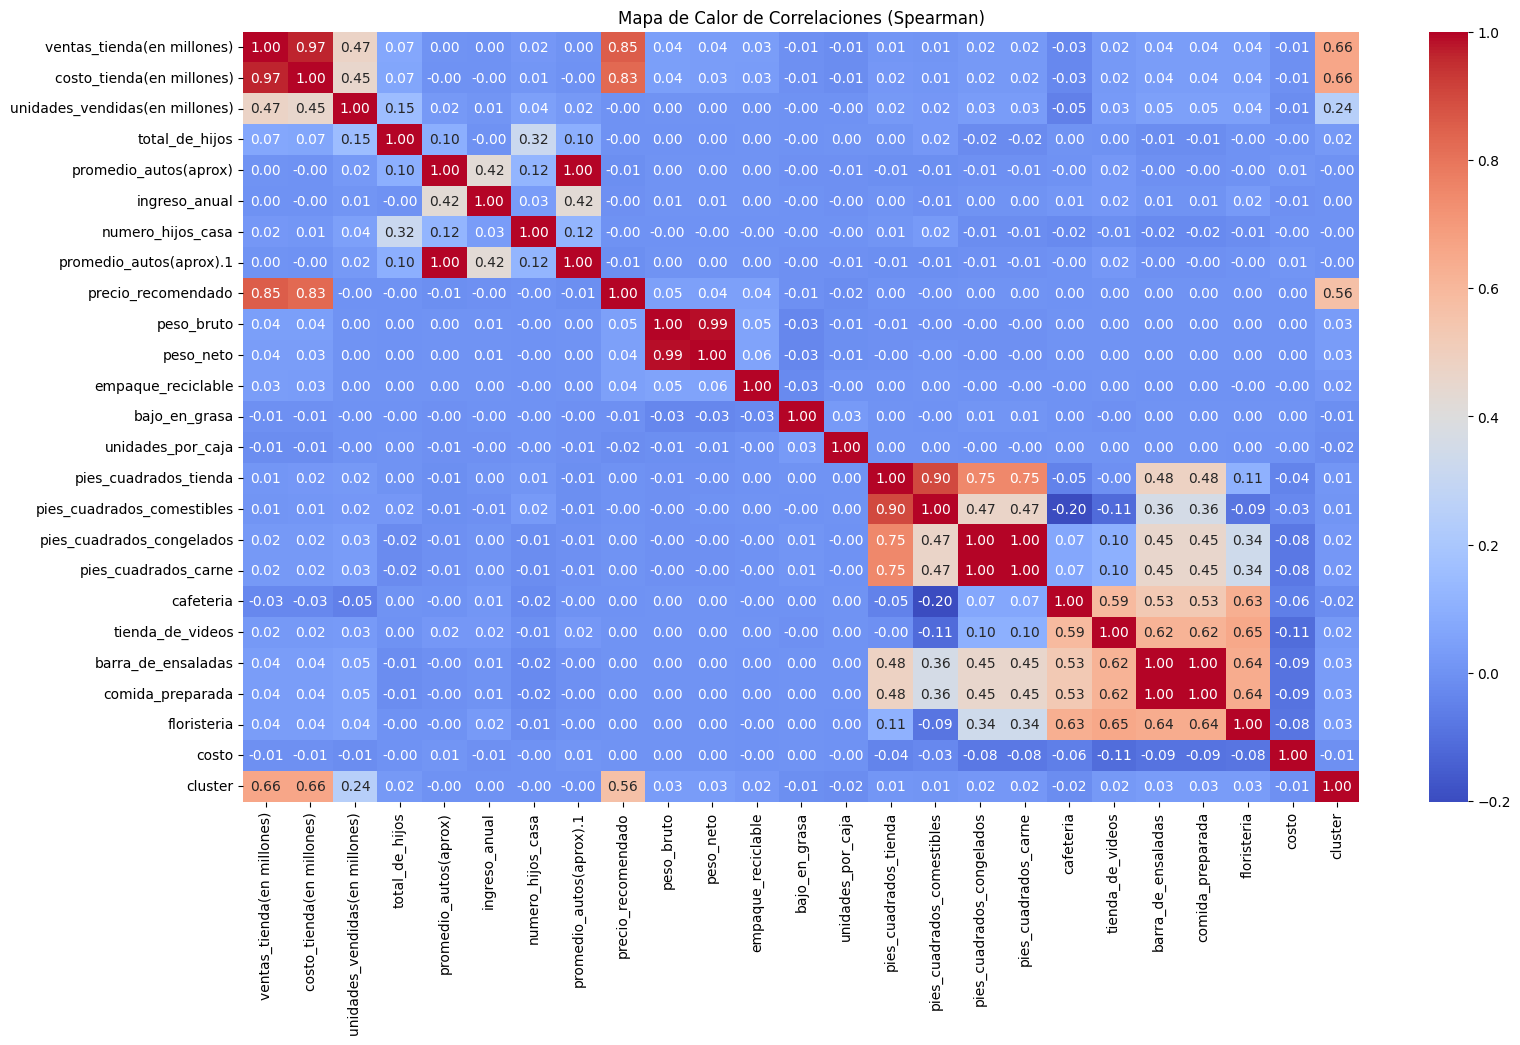

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_raw_numeral.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr(method='spearman')

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones (Spearman)")
plt.show()

<ipython-input-162-80774217231e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_raw_numeral, x='unidades_vendidas(en millones)', y='cluster', palette='viridis', s=100)


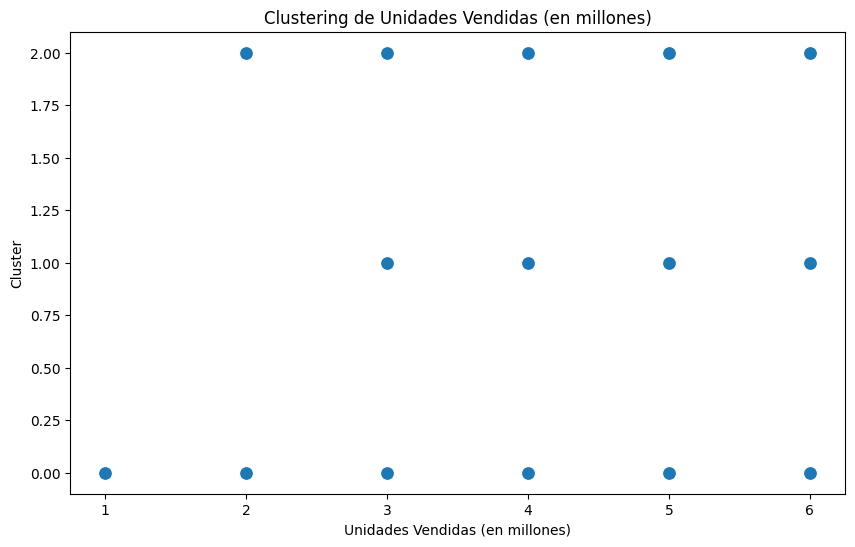

In [ ]:

# Grafica los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_raw_numeral, x='unidades_vendidas(en millones)', y='cluster', palette='viridis', s=100)

# Añade etiquetas y título
plt.title('Clustering de Unidades Vendidas (en millones)')
plt.xlabel('Unidades Vendidas (en millones)')
plt.ylabel('Cluster')
plt.show()

In [ ]:
# prompt: quiero ver una lista de todas las columnas del dataframe  df_raw_numeral

list(df_raw_numeral.columns)


['categoria_alimento',
 'departamento',
 'tipo',
 'ventas_tienda(en millones)',
 'costo_tienda(en millones)',
 'unidades_vendidas(en millones)',
 'promocion',
 'pais',
 'estado_civil',
 'genero',
 'total_de_hijos',
 'escolaridad',
 'miembro',
 'ocupacion',
 'vivienda_propia',
 'promedio_autos(aprox)',
 'ingreso_anual',
 'numero_hijos_casa',
 'promedio_autos(aprox).1',
 'marca',
 'precio_recomendado',
 'peso_bruto',
 'peso_neto',
 'empaque_reciclable',
 'bajo_en_grasa',
 'unidades_por_caja',
 'comercio',
 'ciudad',
 'estado',
 'pies_cuadrados_tienda',
 'pies_cuadrados_comestibles',
 'pies_cuadrados_congelados',
 'pies_cuadrados_carne',
 'cafeteria',
 'tienda_de_videos',
 'barra_de_ensaladas',
 'comida_preparada',
 'floristeria',
 'divulgacion',
 'costo',
 'cluster']

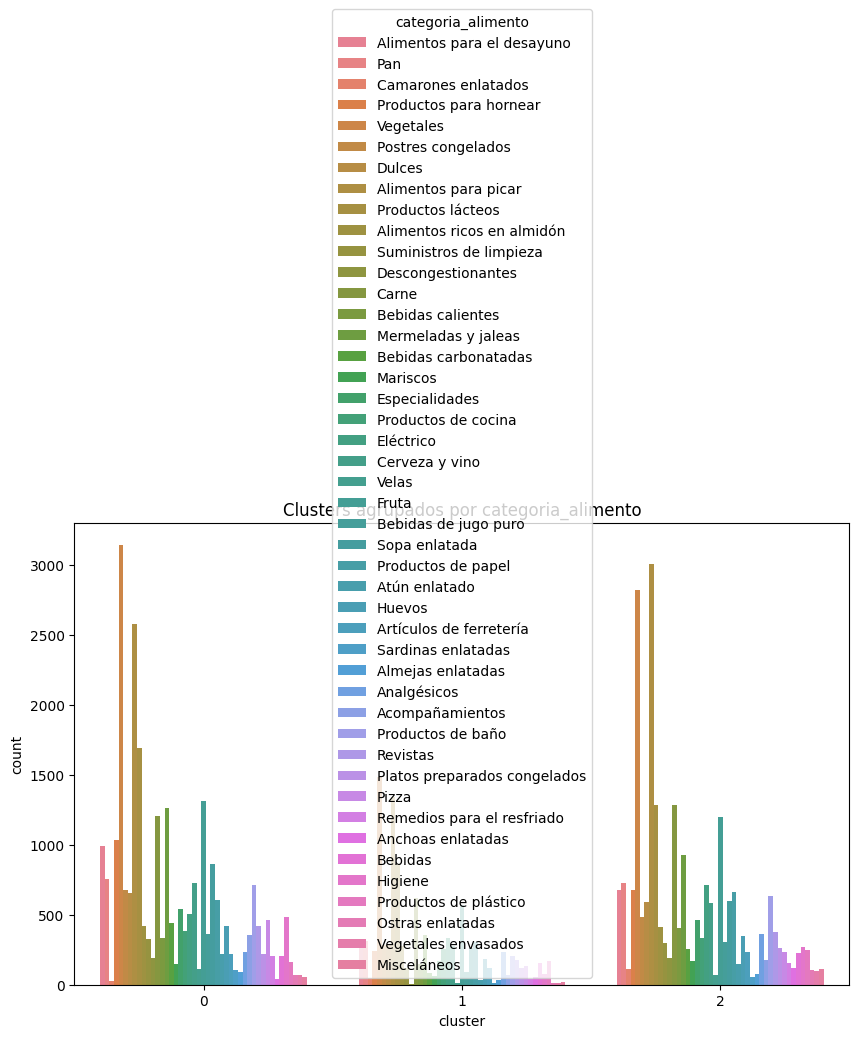

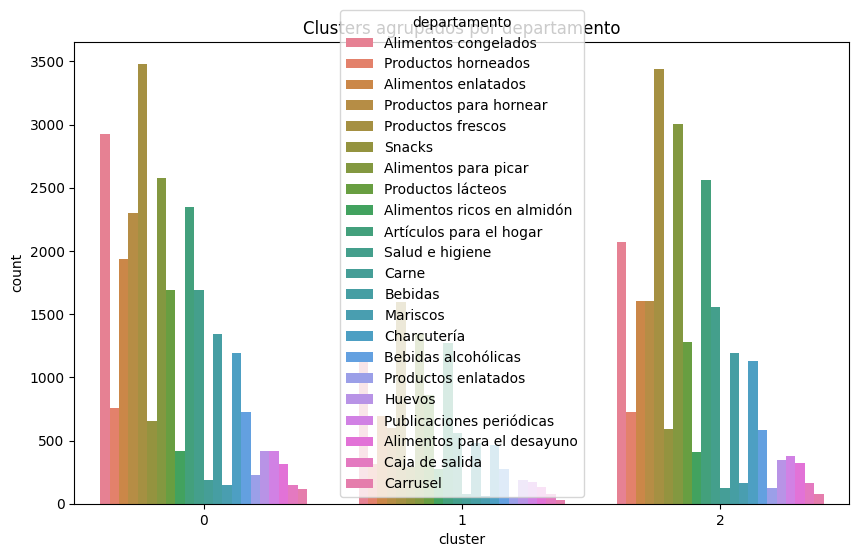

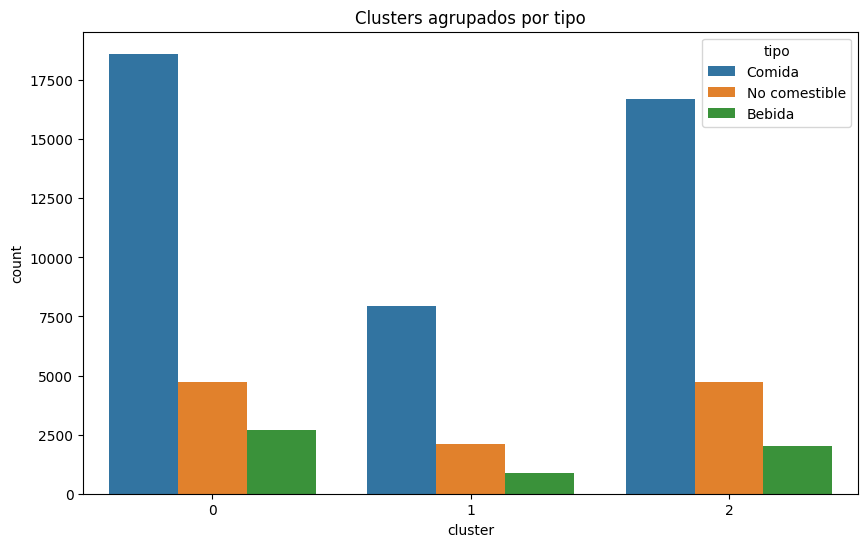

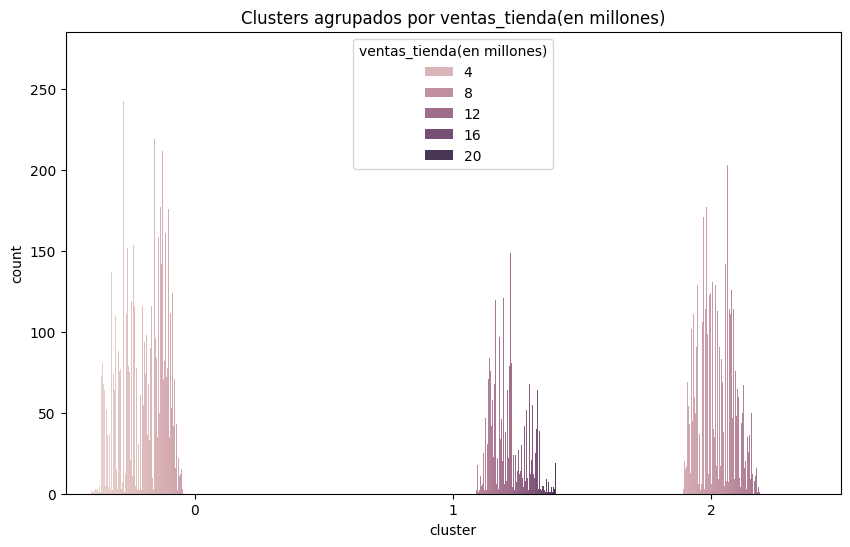

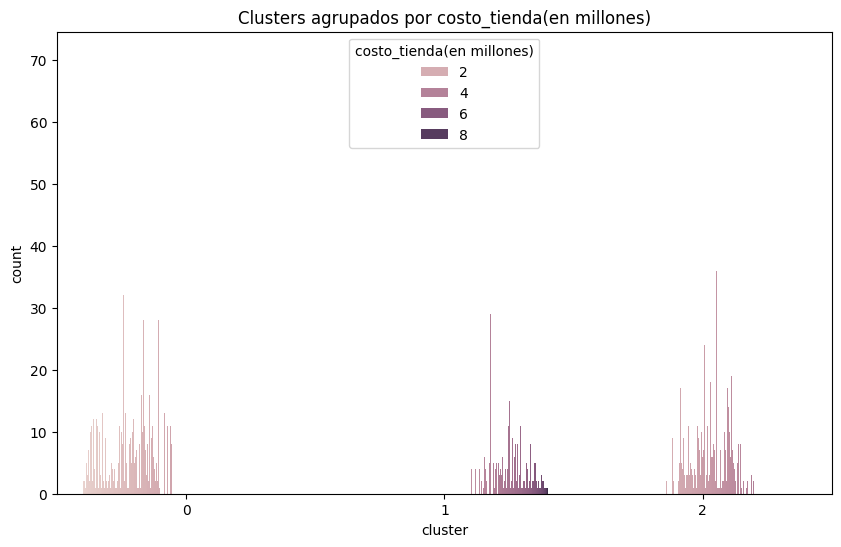

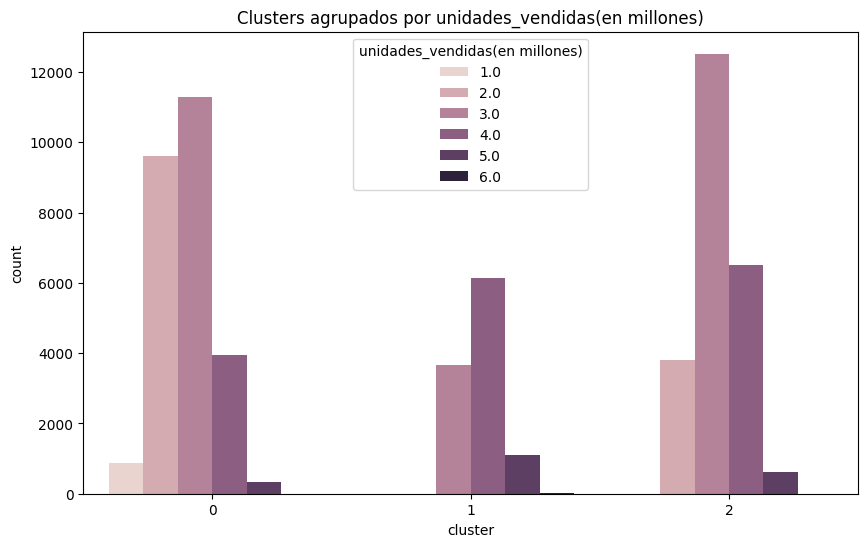

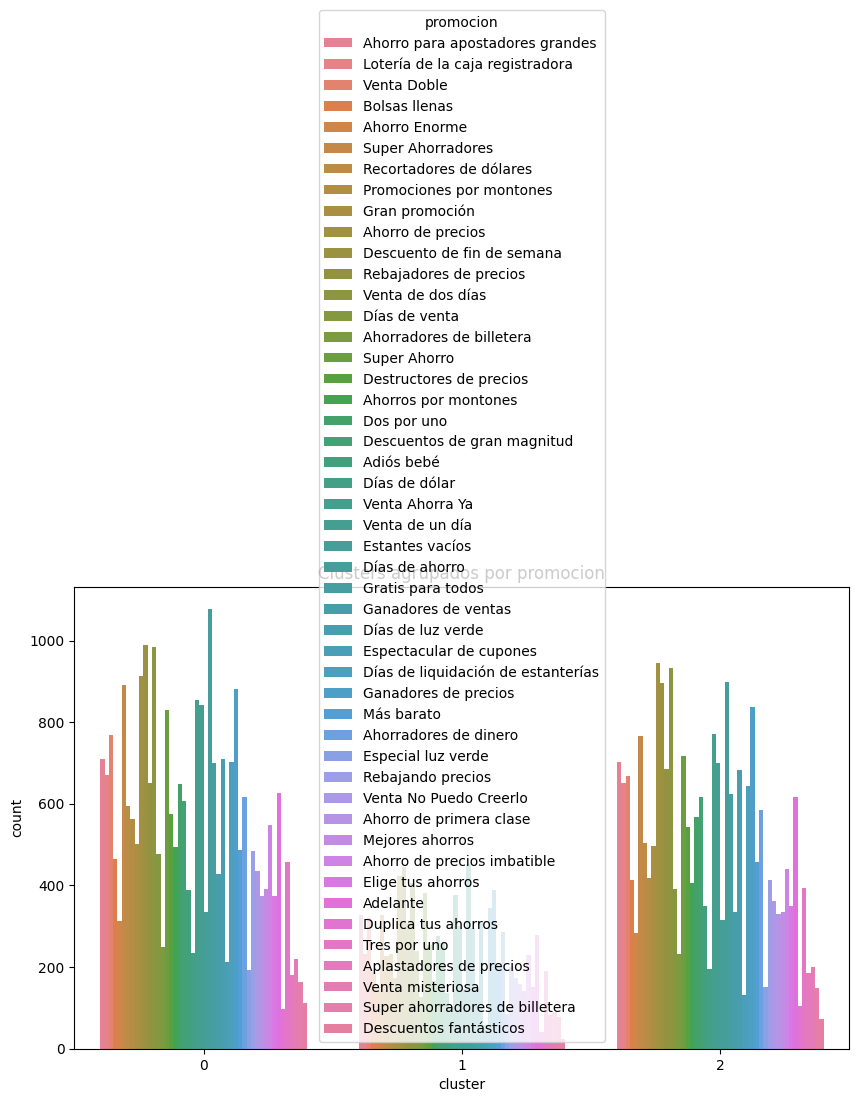

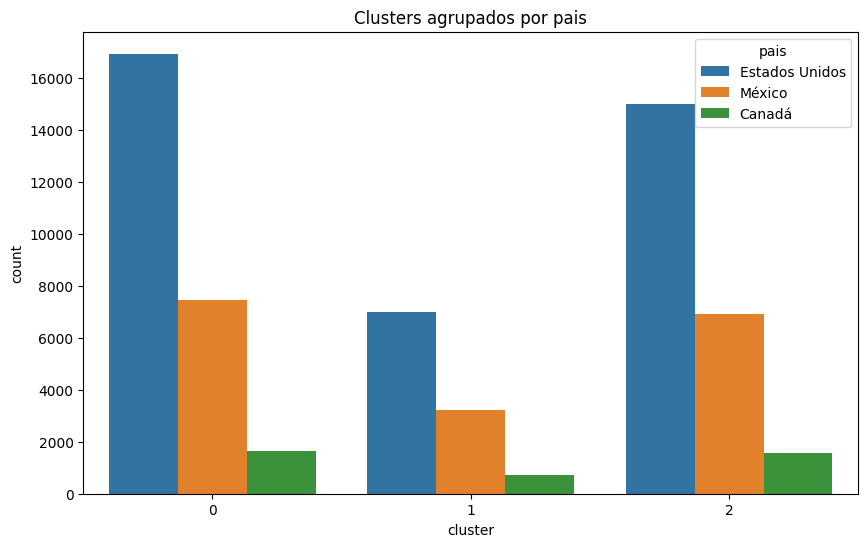

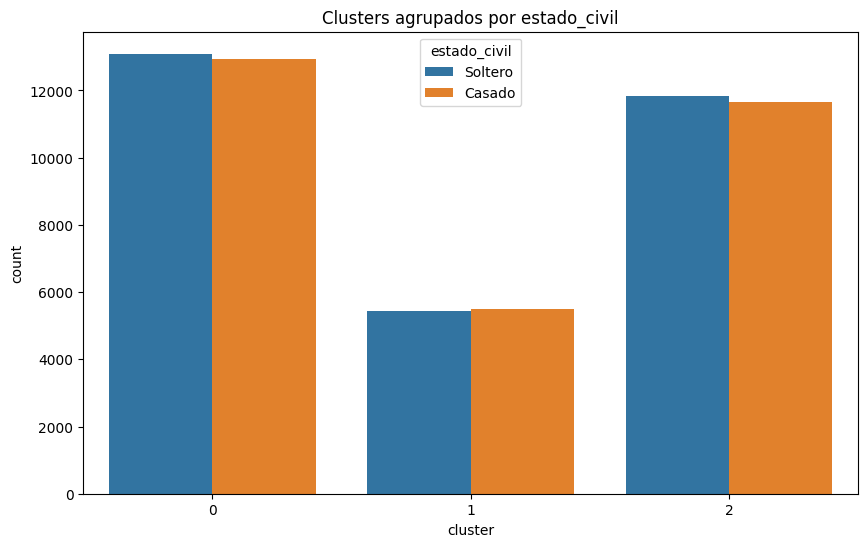

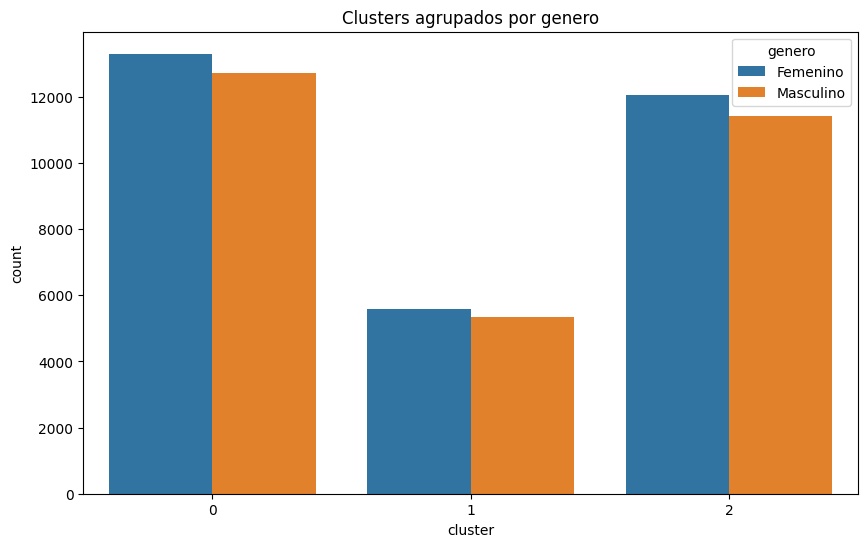

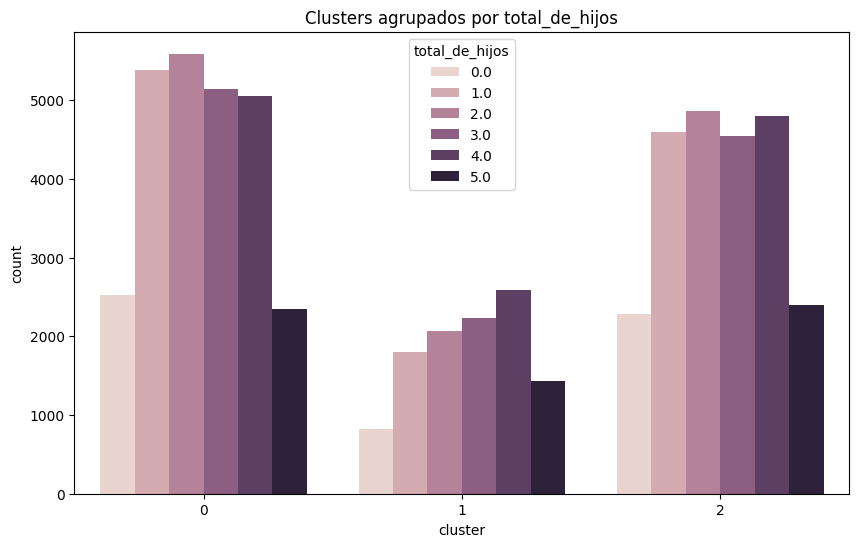

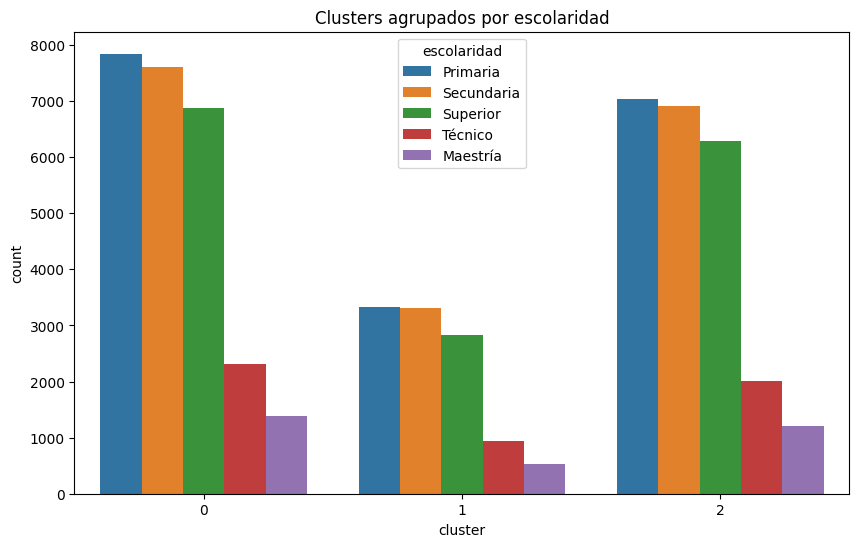

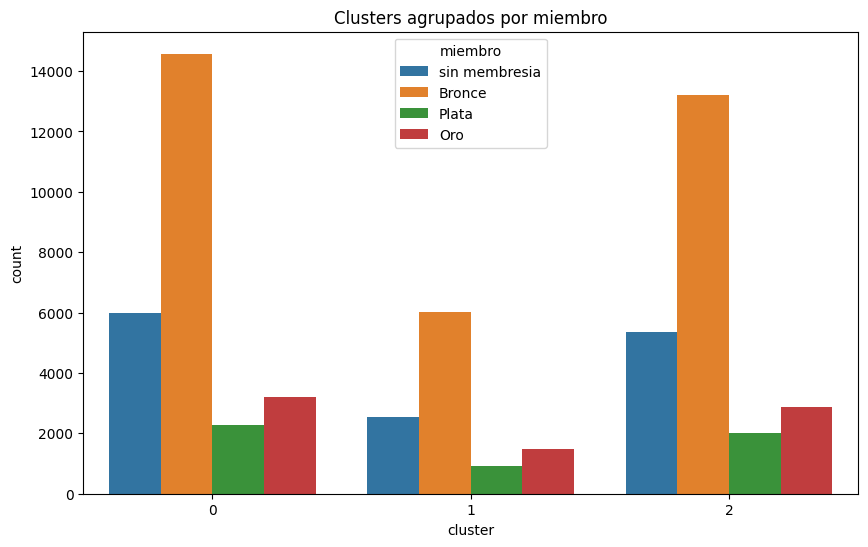

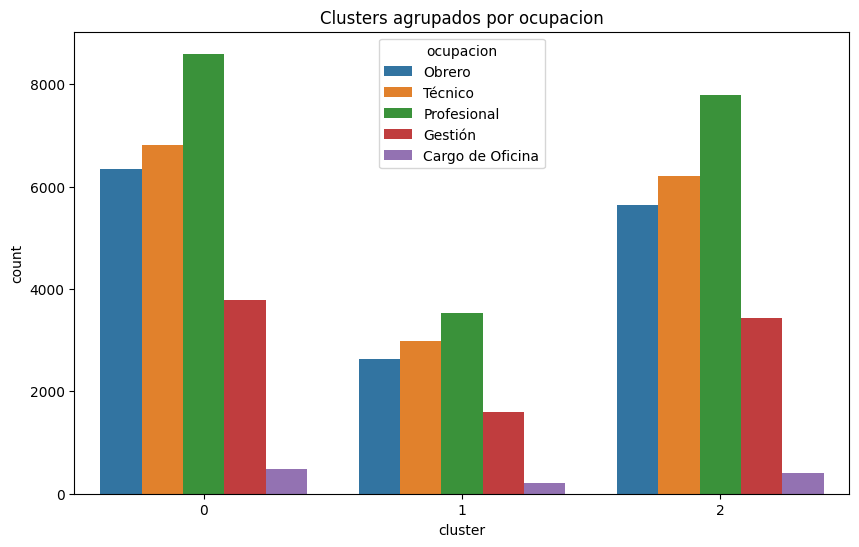

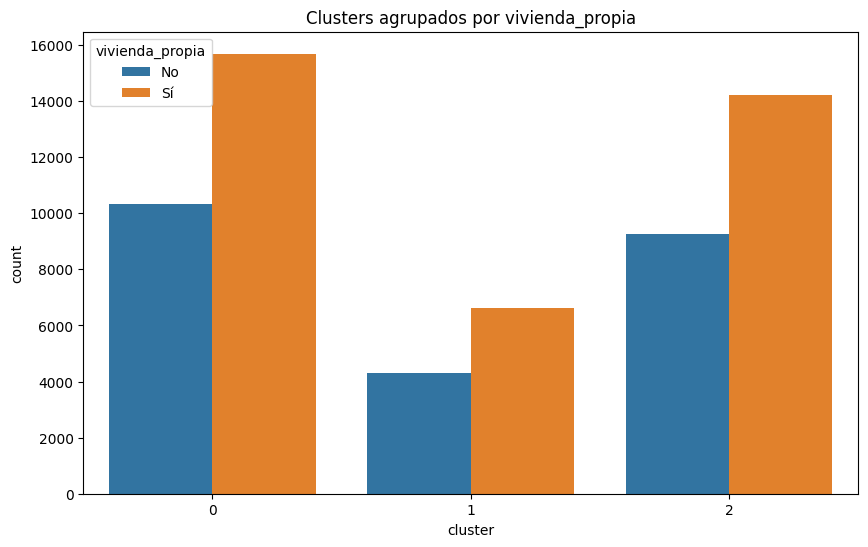

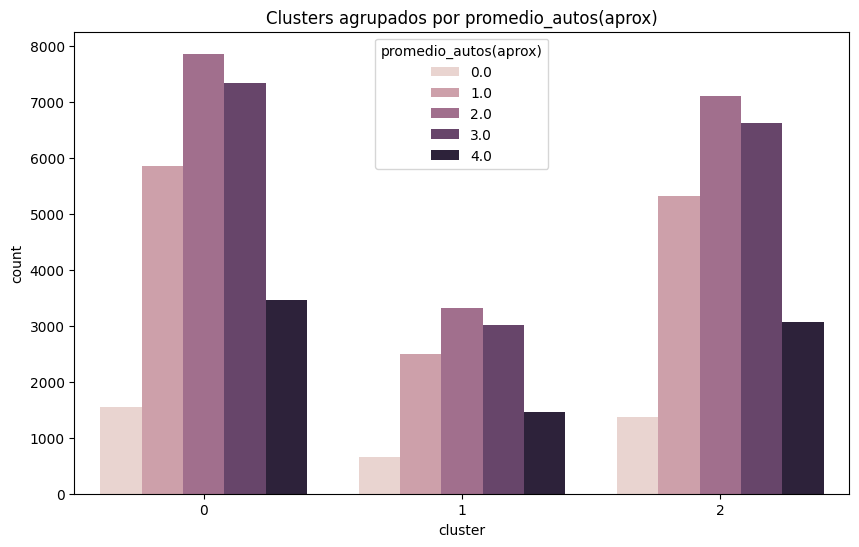

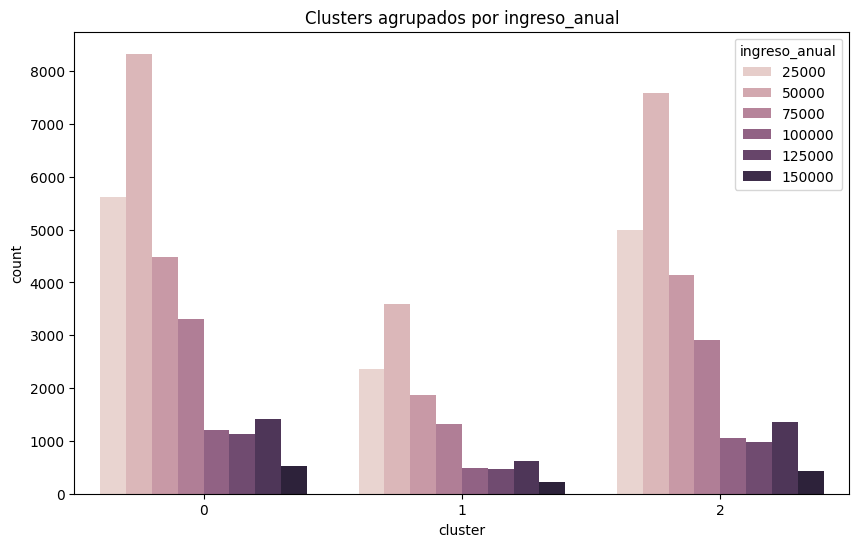

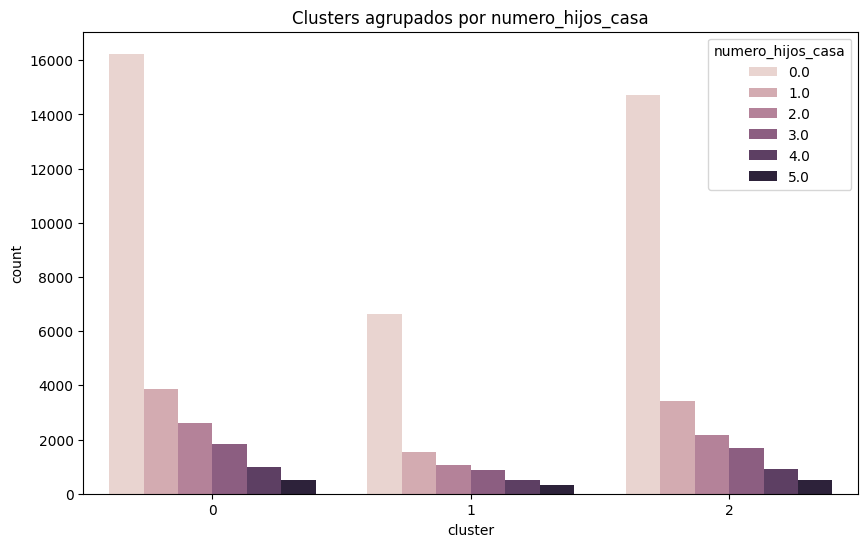

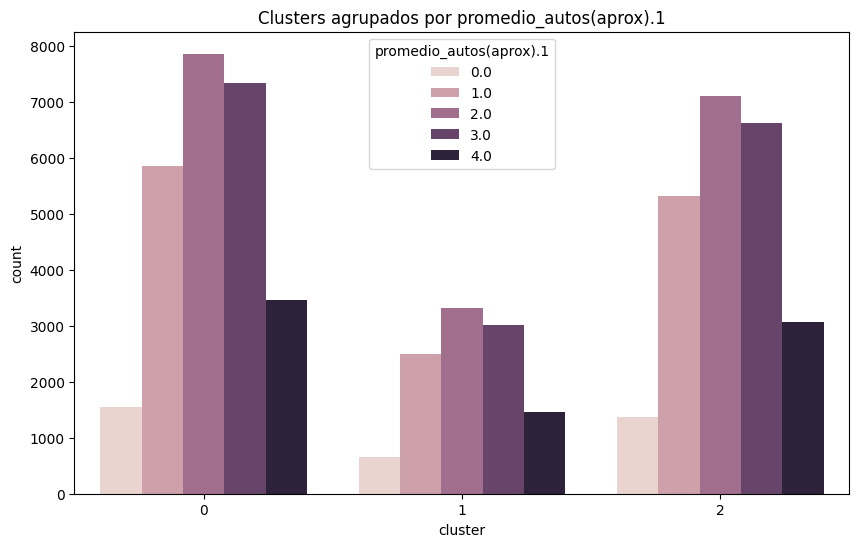

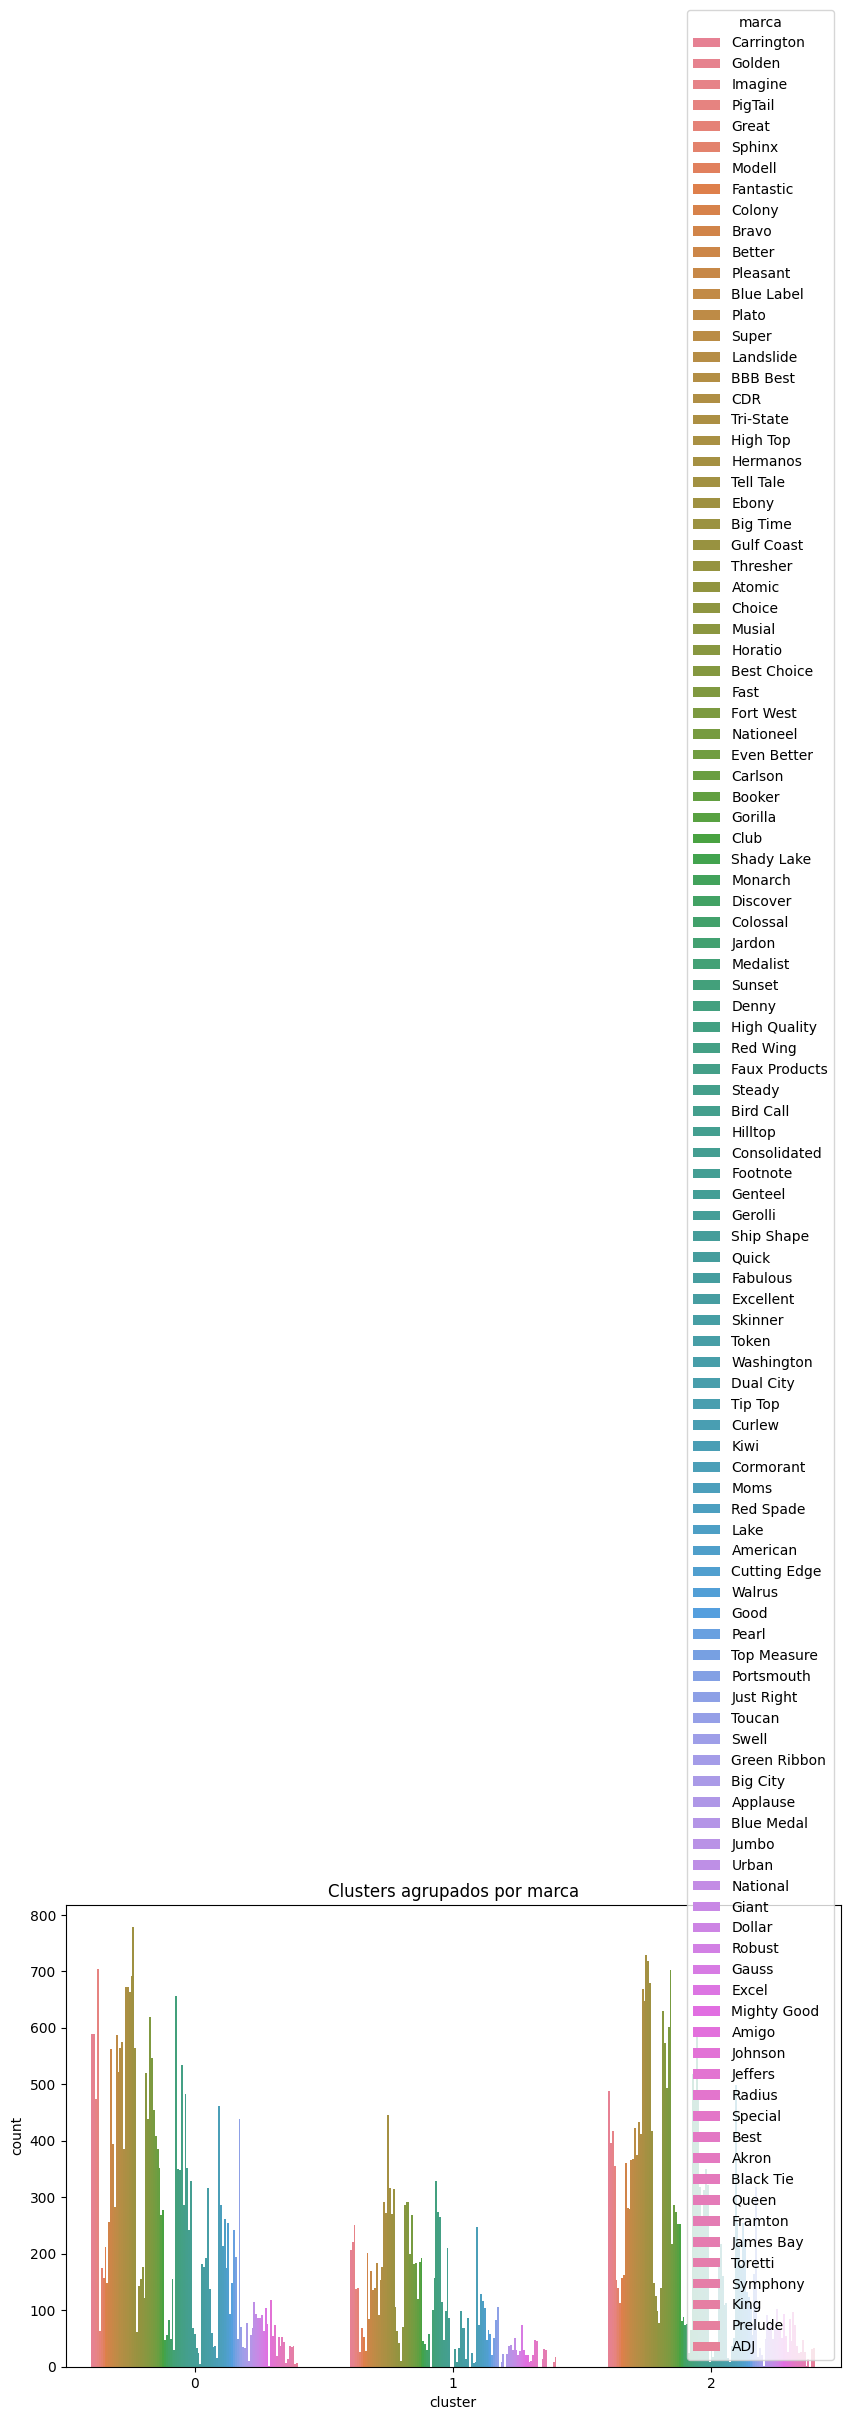

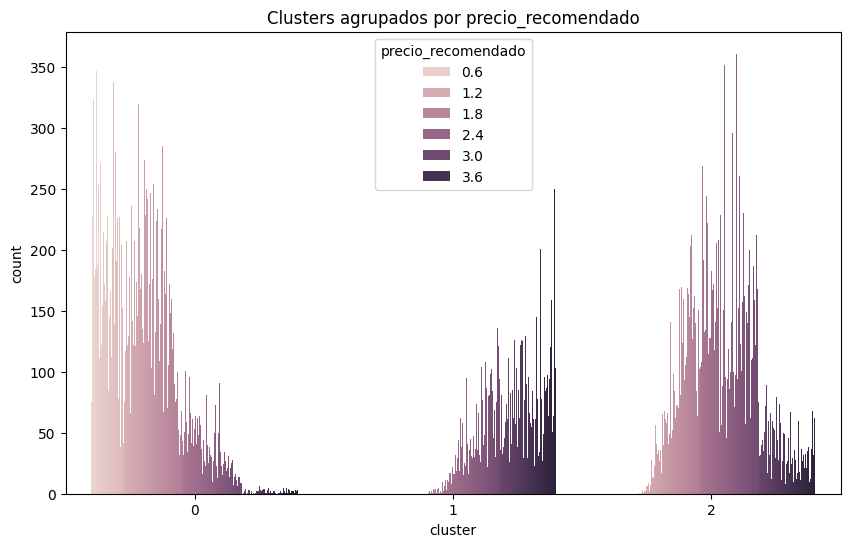

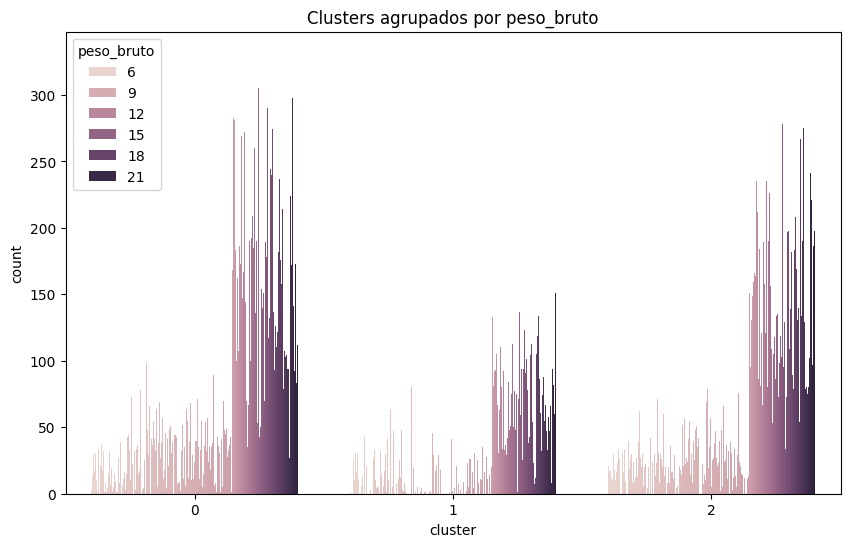

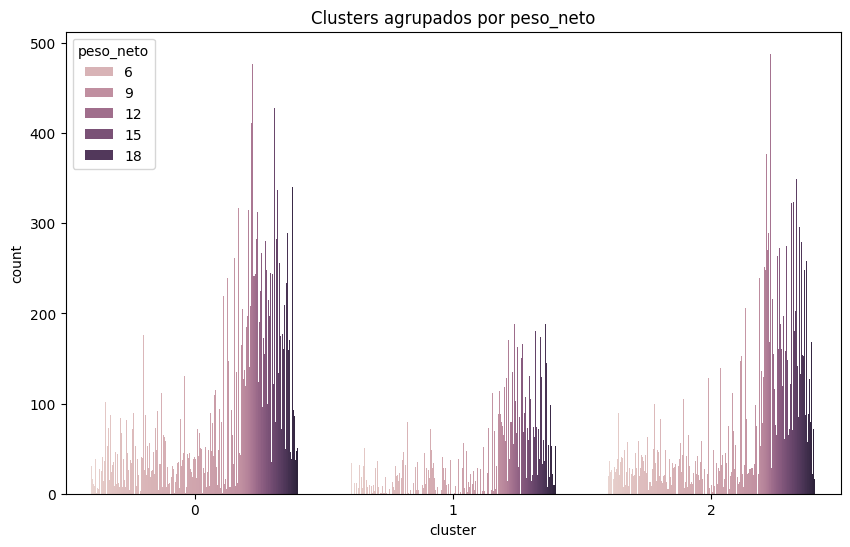

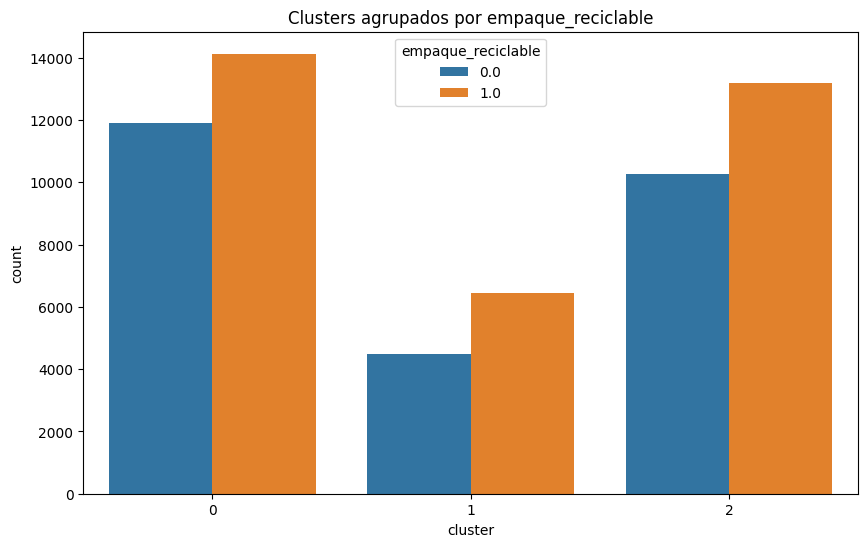

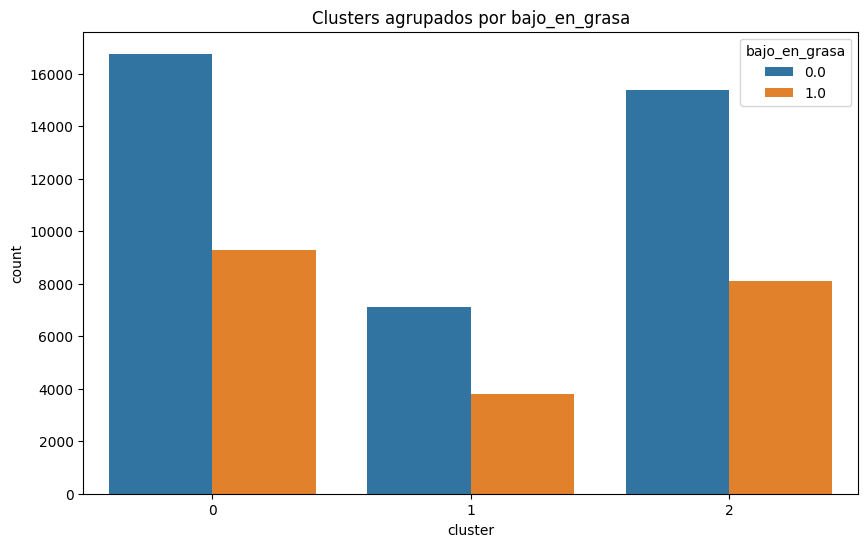

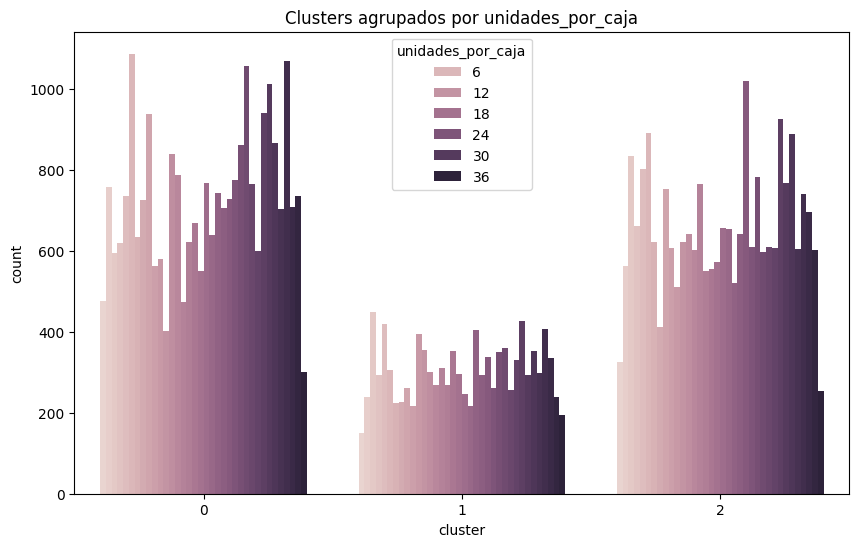

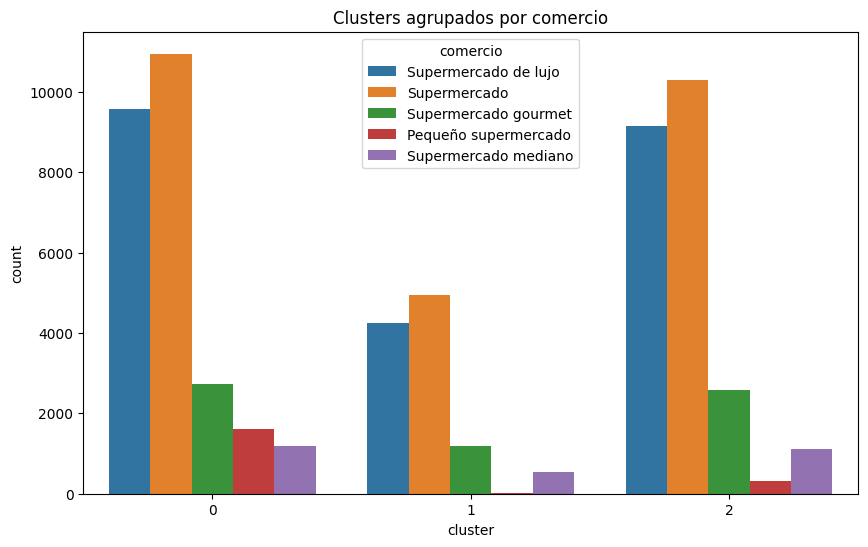

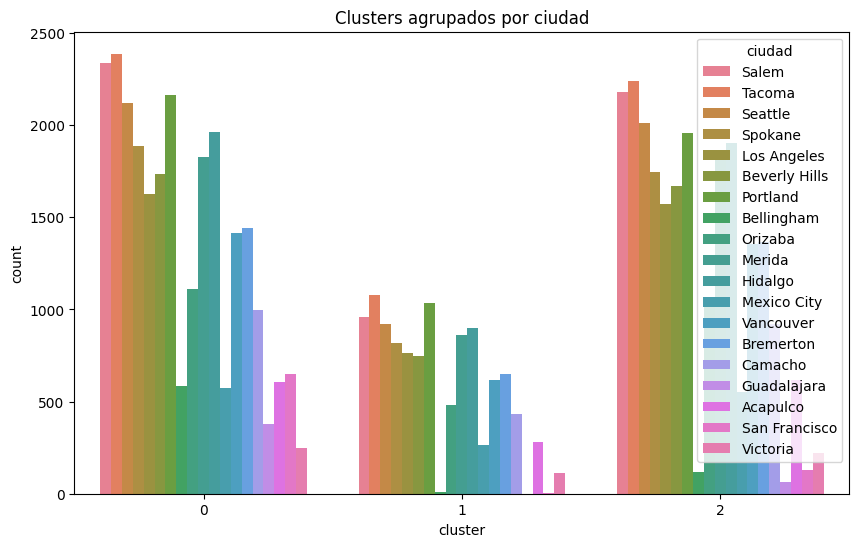

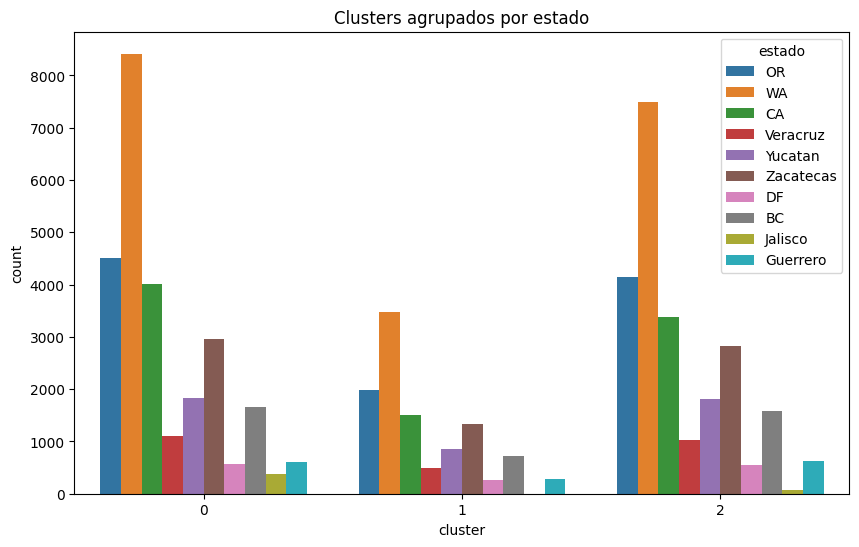

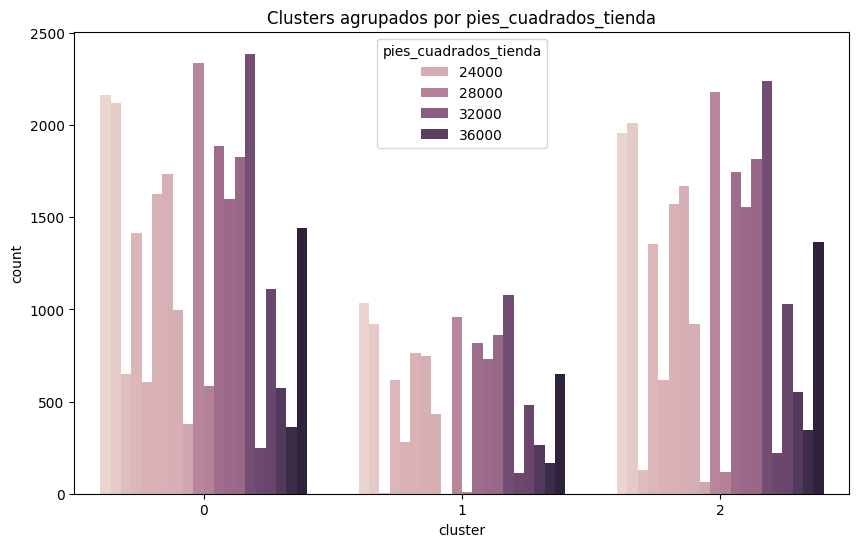

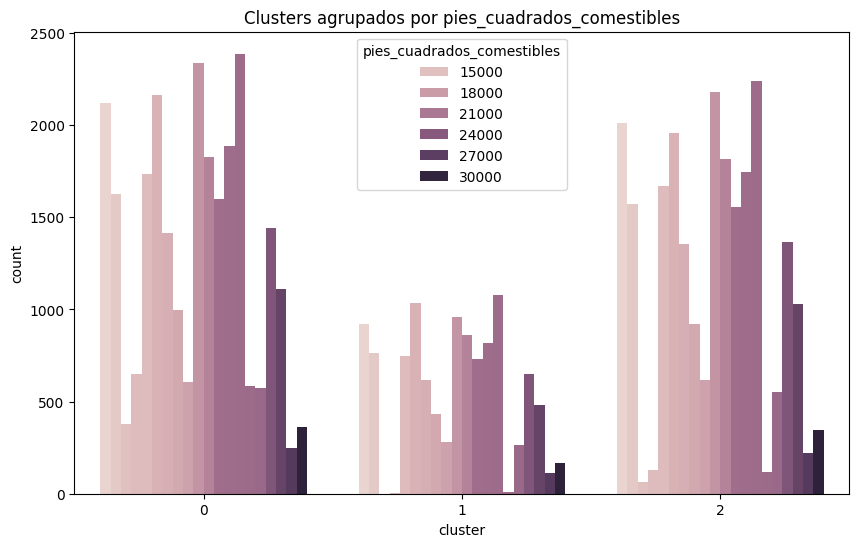

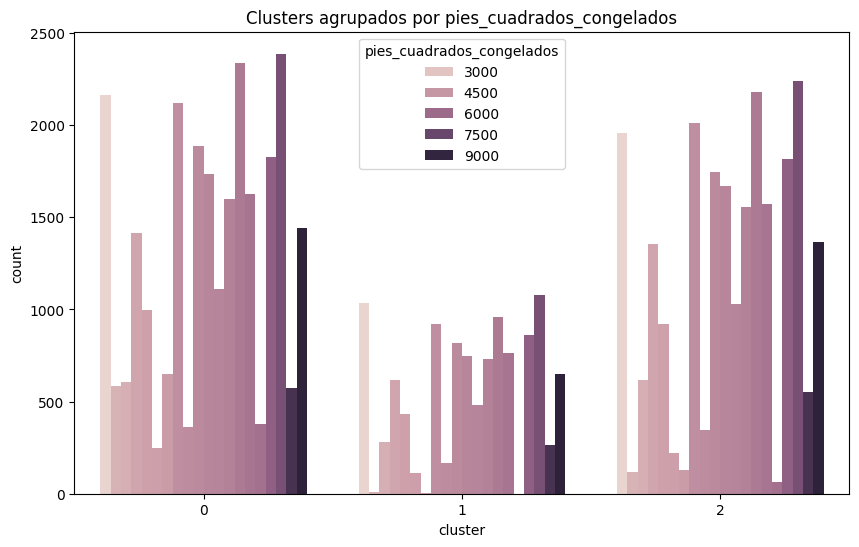

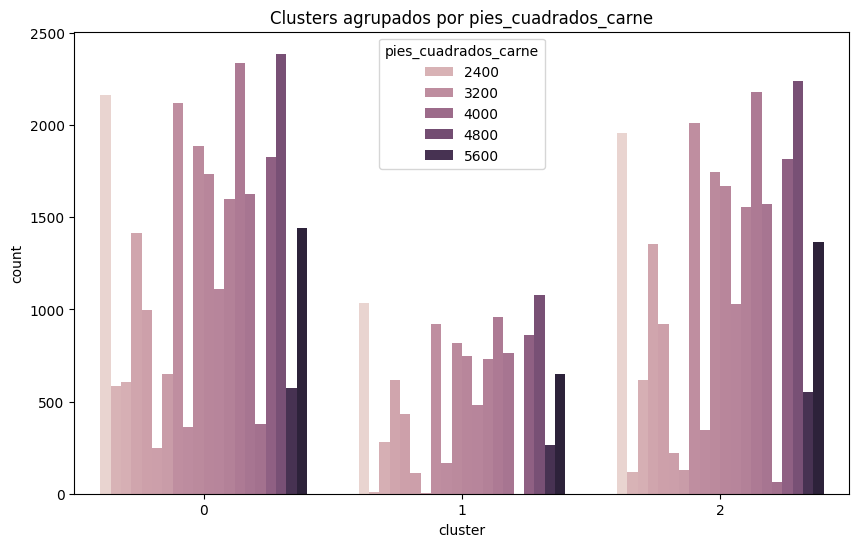

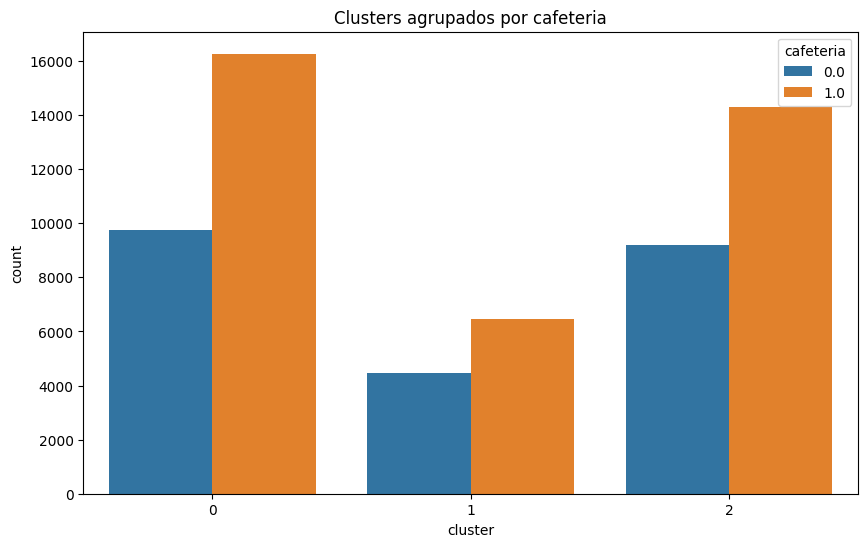

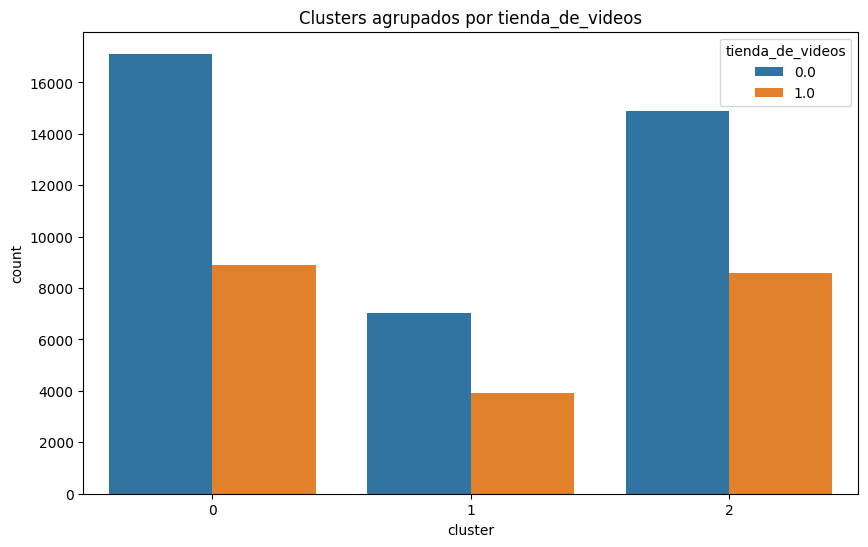

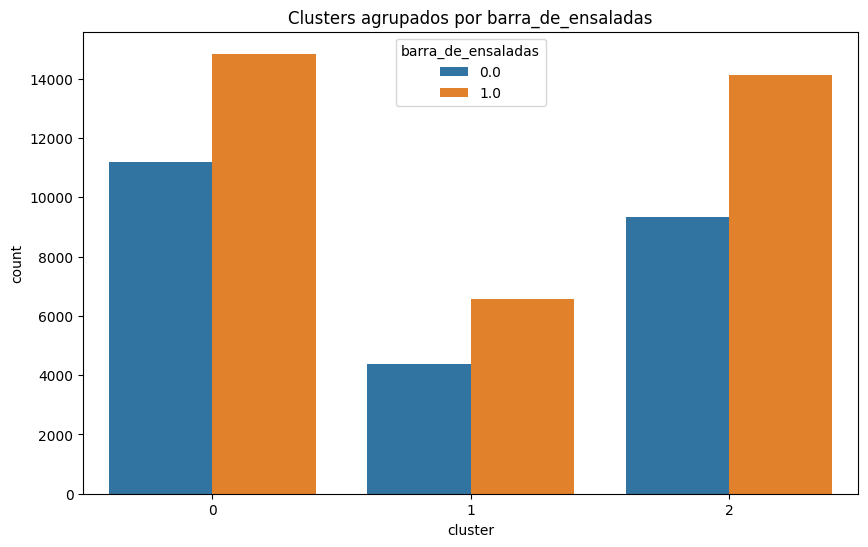

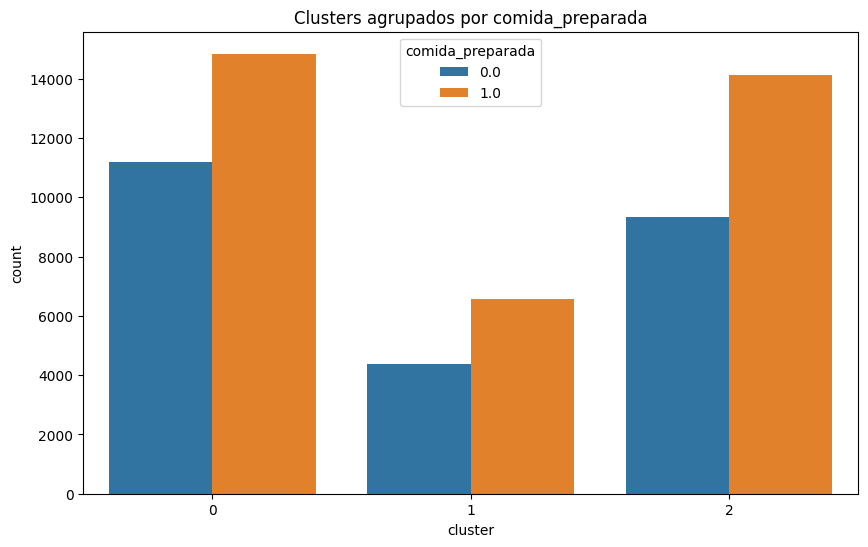

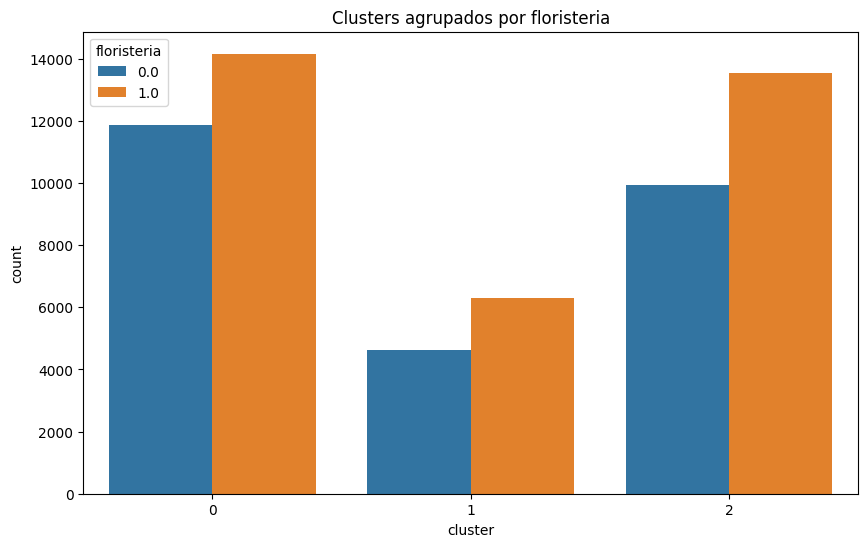

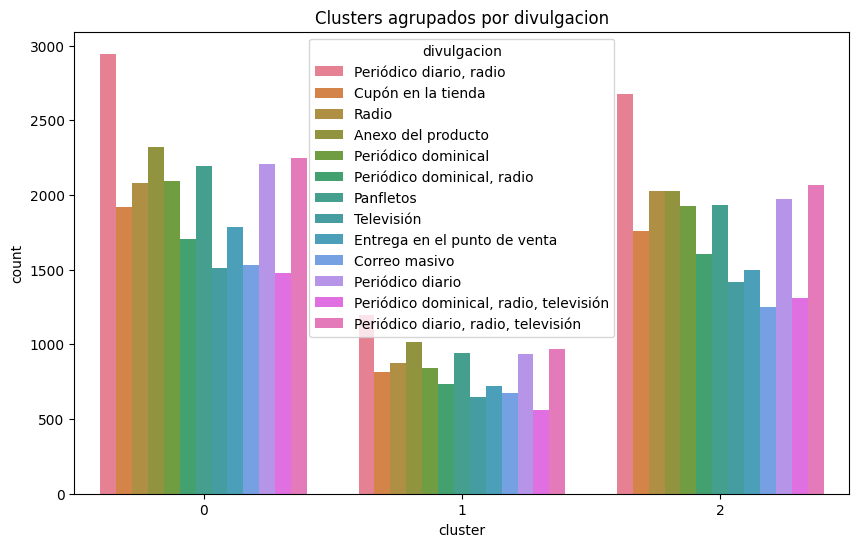

In [ ]:
# Lista de variables que quieres visualizar
variables_a_visualizar = ['categoria_alimento',
 'departamento',
 'tipo',
 'ventas_tienda(en millones)',
 'costo_tienda(en millones)',
 'unidades_vendidas(en millones)',
 'promocion',
 'pais',
 'estado_civil',
 'genero',
 'total_de_hijos',
 'escolaridad',
 'miembro',
 'ocupacion',
 'vivienda_propia',
 'promedio_autos(aprox)',
 'ingreso_anual',
 'numero_hijos_casa',
 'promedio_autos(aprox).1',
 'marca',
 'precio_recomendado',
 'peso_bruto',
 'peso_neto',
 'empaque_reciclable',
 'bajo_en_grasa',
 'unidades_por_caja',
 'comercio',
 'ciudad',
 'estado',
 'pies_cuadrados_tienda',
 'pies_cuadrados_comestibles',
 'pies_cuadrados_congelados',
 'pies_cuadrados_carne',
 'cafeteria',
 'tienda_de_videos',
 'barra_de_ensaladas',
 'comida_preparada',
 'floristeria',
 'divulgacion']

generar_graficas_por_variable(variables_a_visualizar, df_raw_numeral)

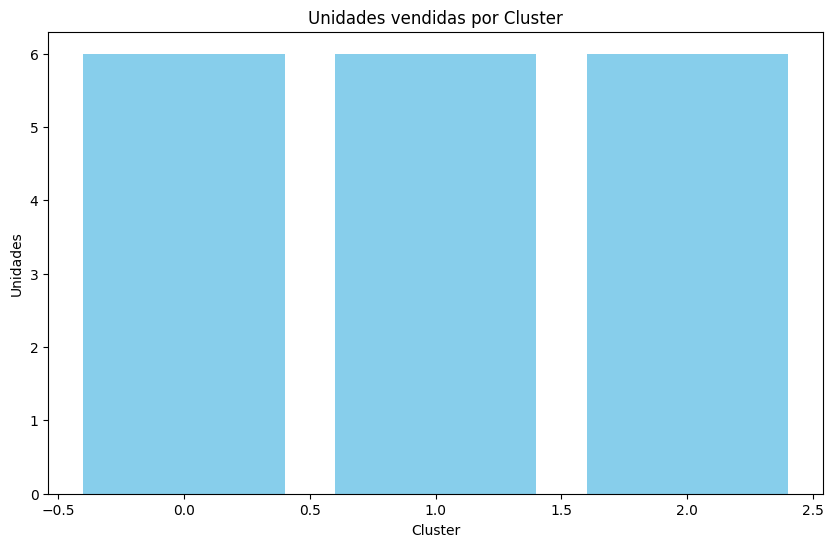

In [ ]:

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(df_raw_numeral['cluster'], df_raw_numeral['unidades_vendidas(en millones)'], color='skyblue')

# Añadir título y etiquetas
plt.title('Unidades vendidas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Unidades')

# Mostrar la gráfica
plt.show()

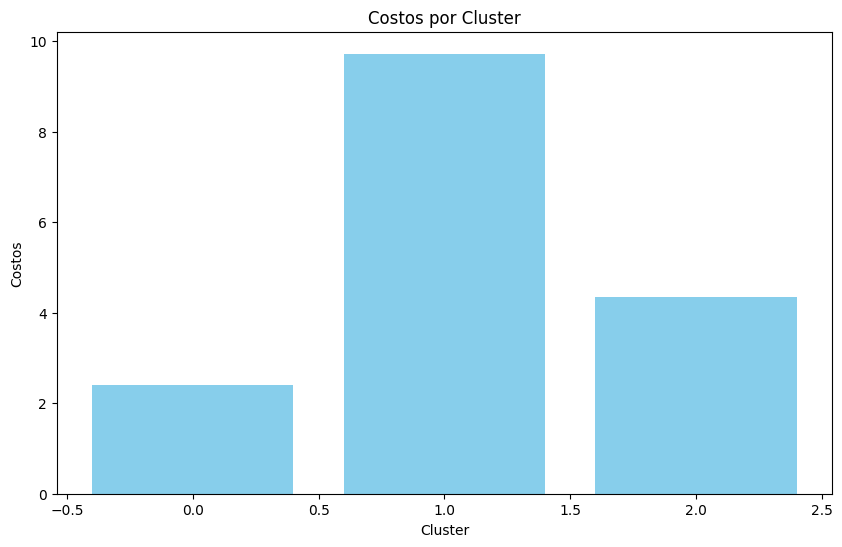

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(df_raw_numeral['cluster'], df_raw_numeral['costo_tienda(en millones)'], color='skyblue')

# Añadir título y etiquetas
plt.title('Costos por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Costos')

# Mostrar la gráfica
plt.show()

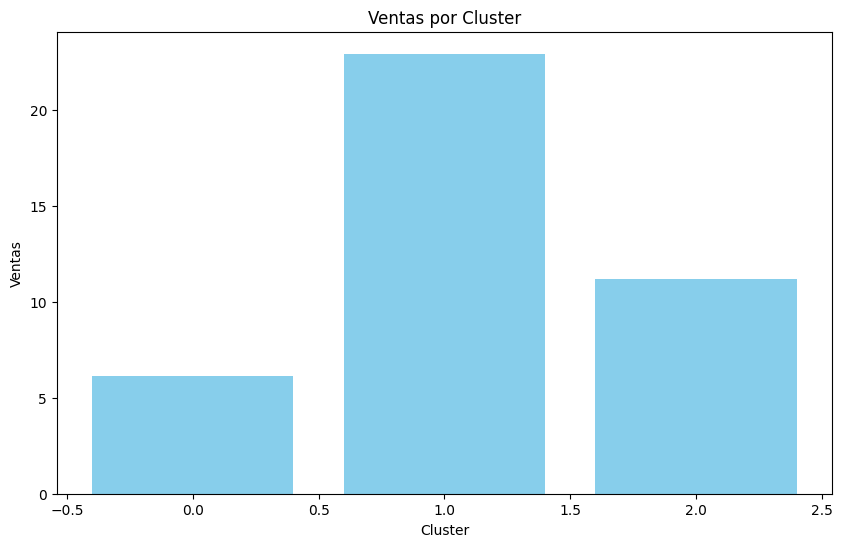

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(df_raw_numeral['cluster'], df_raw_numeral['ventas_tienda(en millones)'], color='skyblue')

# Añadir título y etiquetas
plt.title('Ventas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ventas')

# Mostrar la gráfica
plt.show()

#### Graficas del modelo categorico nominal:

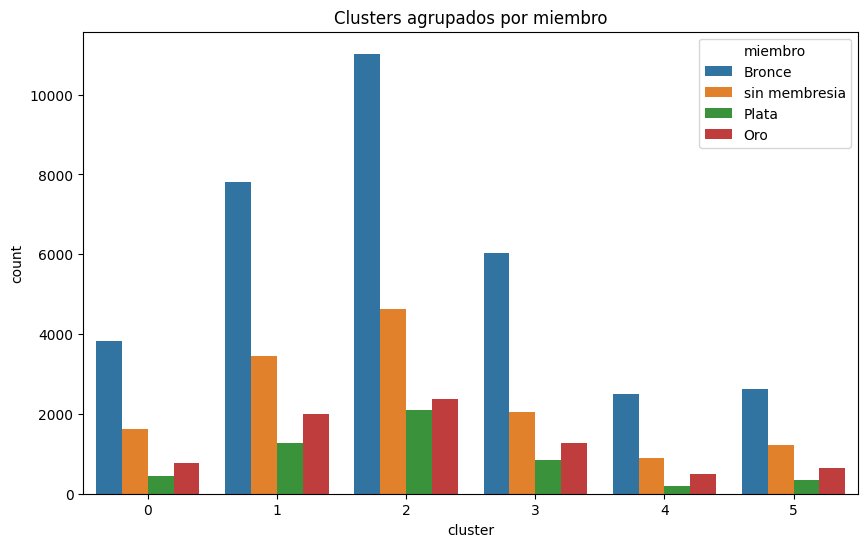

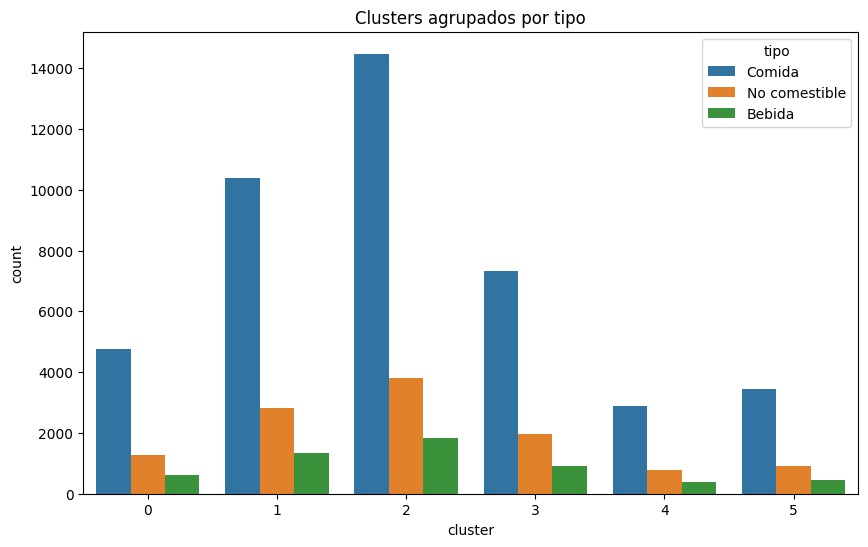

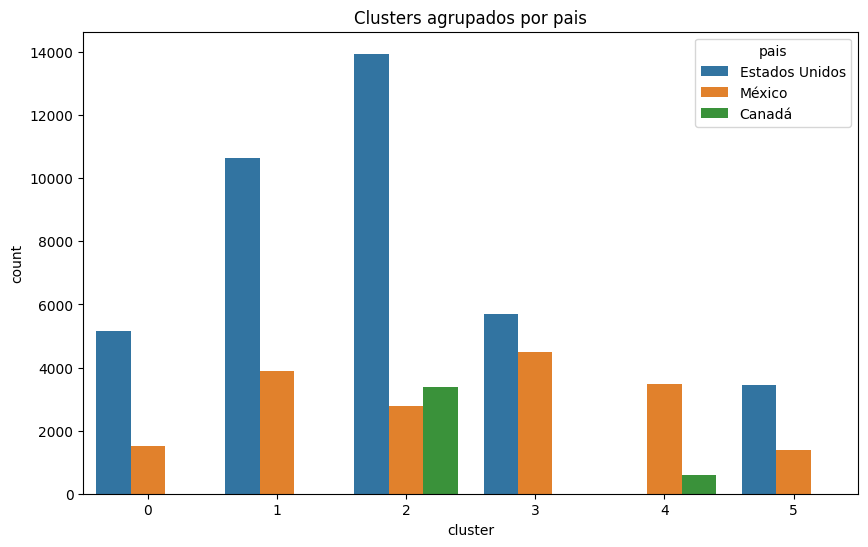

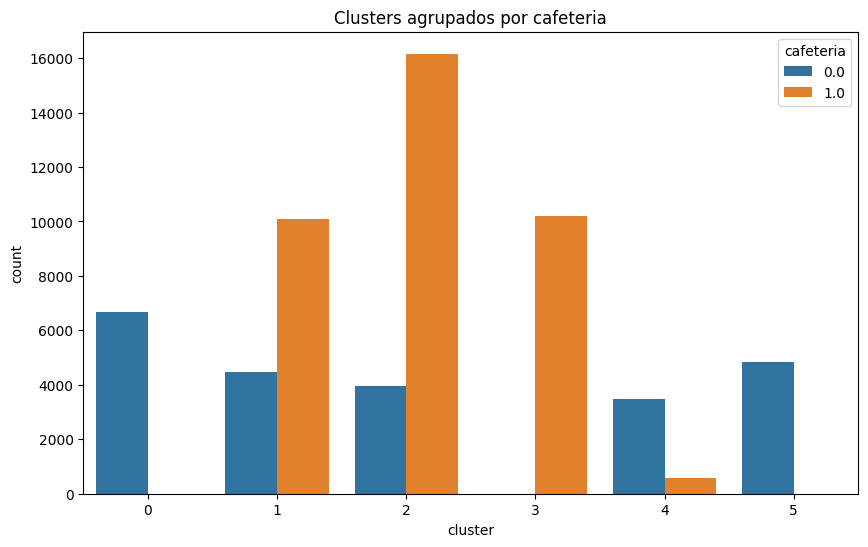

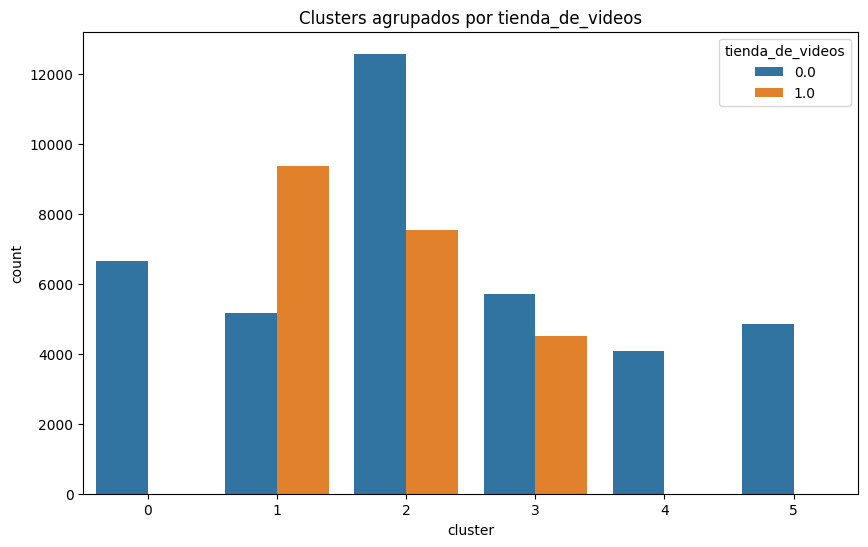

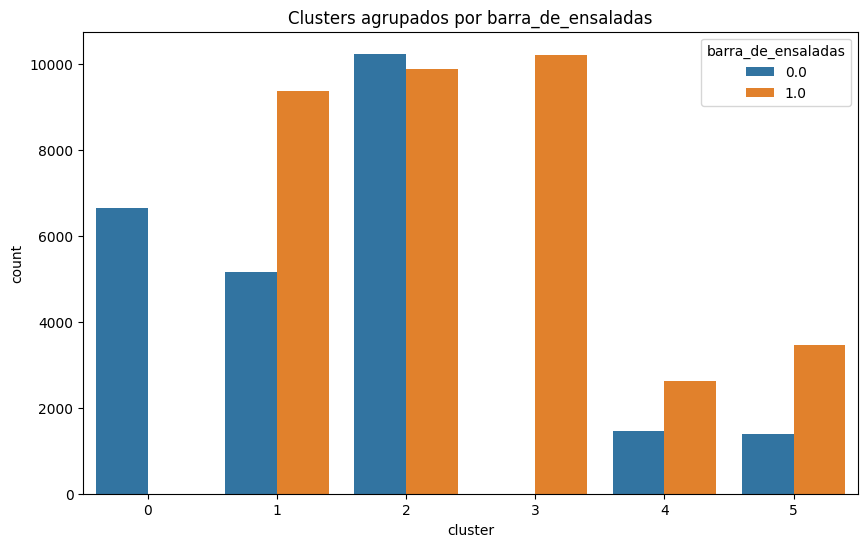

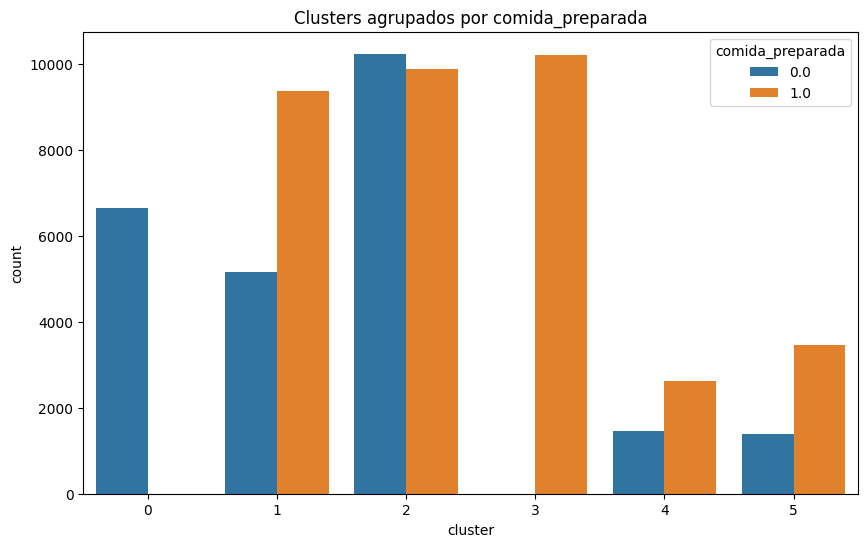

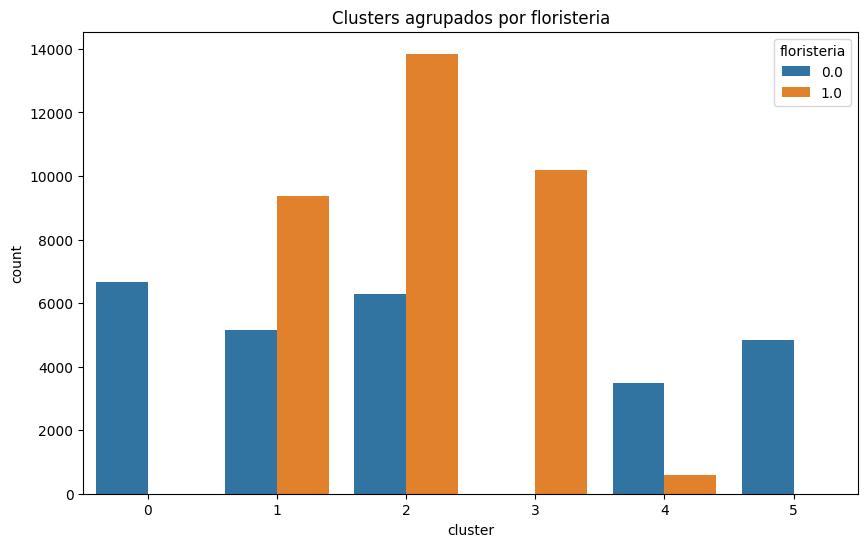

In [ ]:
# Lista de variables que quieres visualizar
variables_a_visualizar = ['miembro', 'tipo', 'pais',"cafeteria","tienda_de_videos","barra_de_ensaladas","comida_preparada","floristeria"]

generar_graficas_por_variable(variables_a_visualizar, df_raw_categorico_nominal)

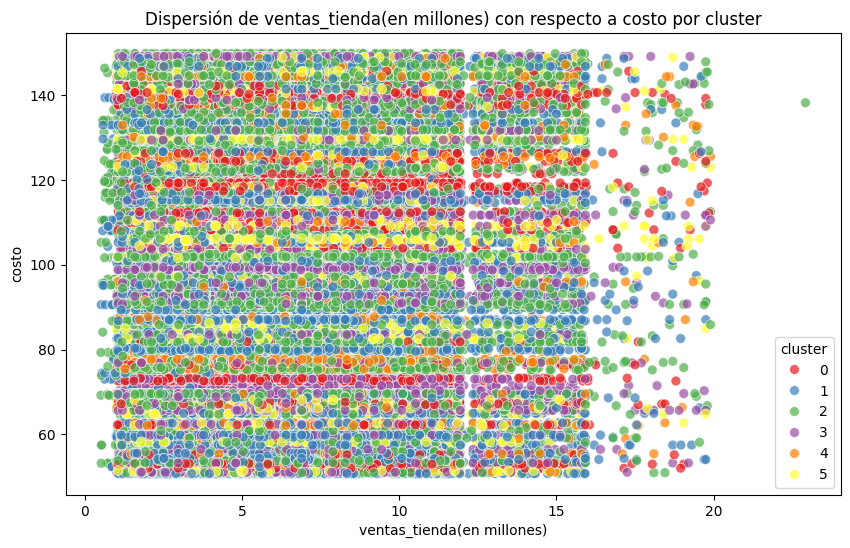

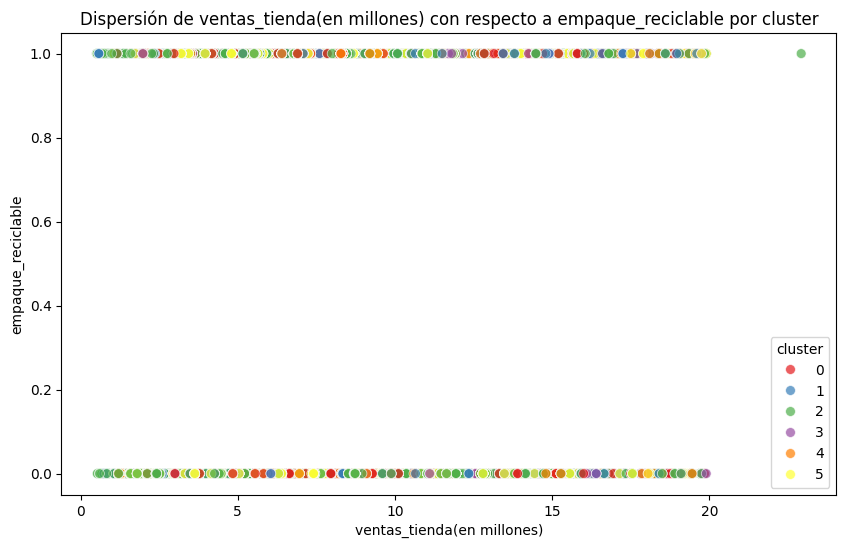

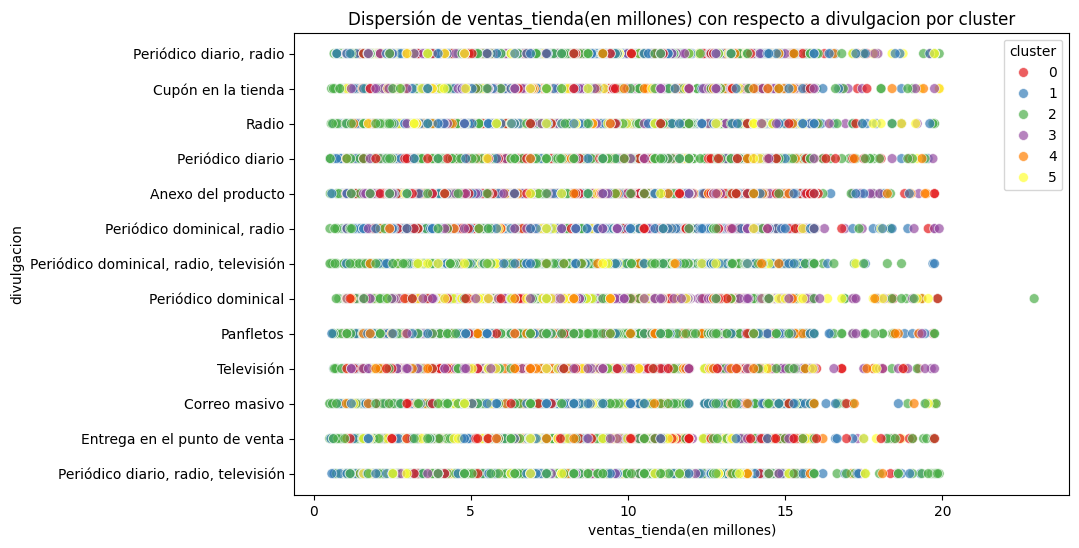

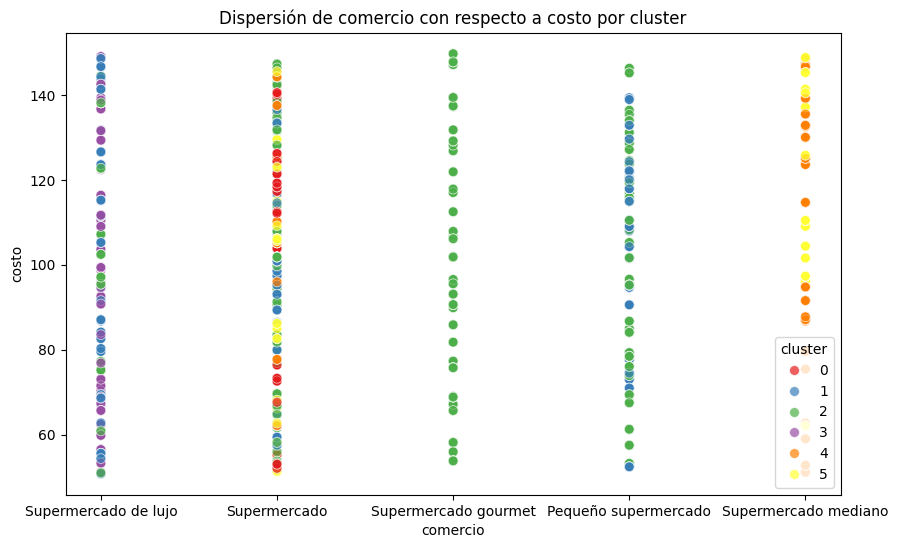

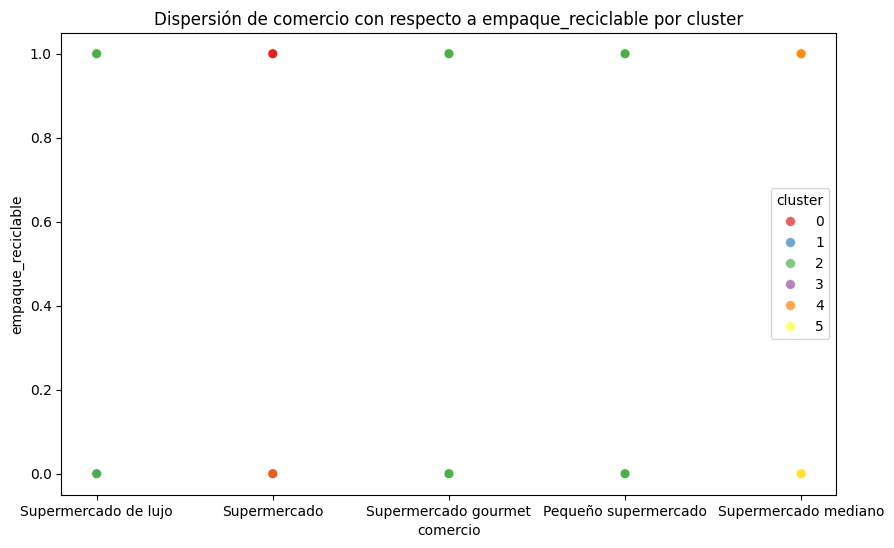

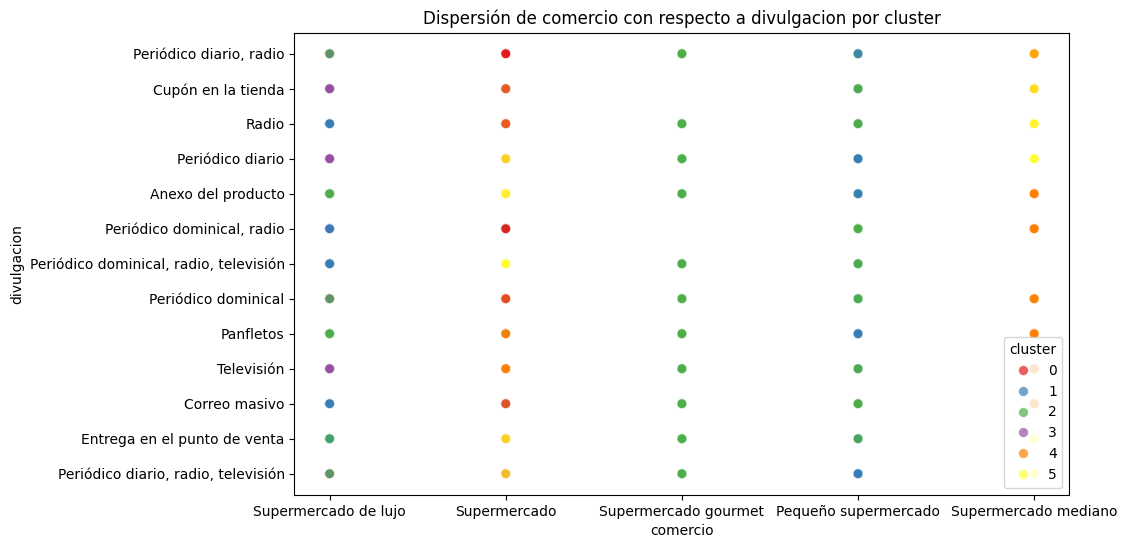

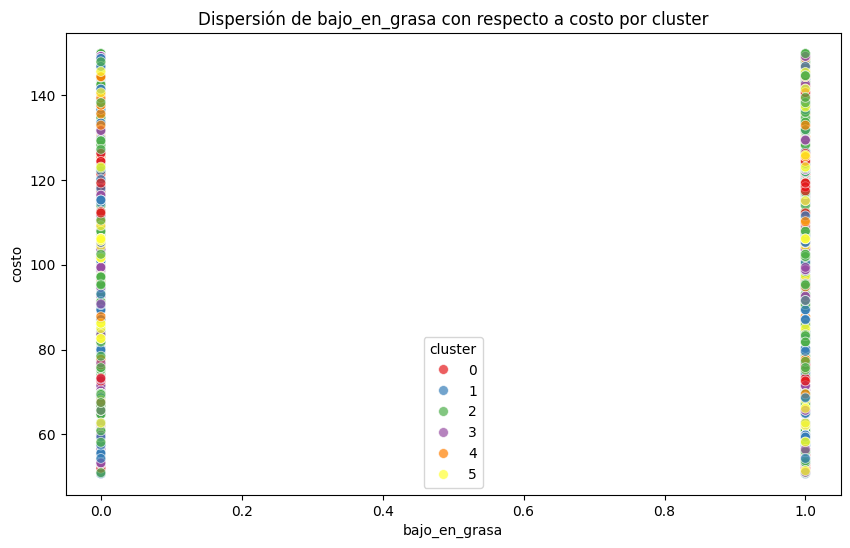

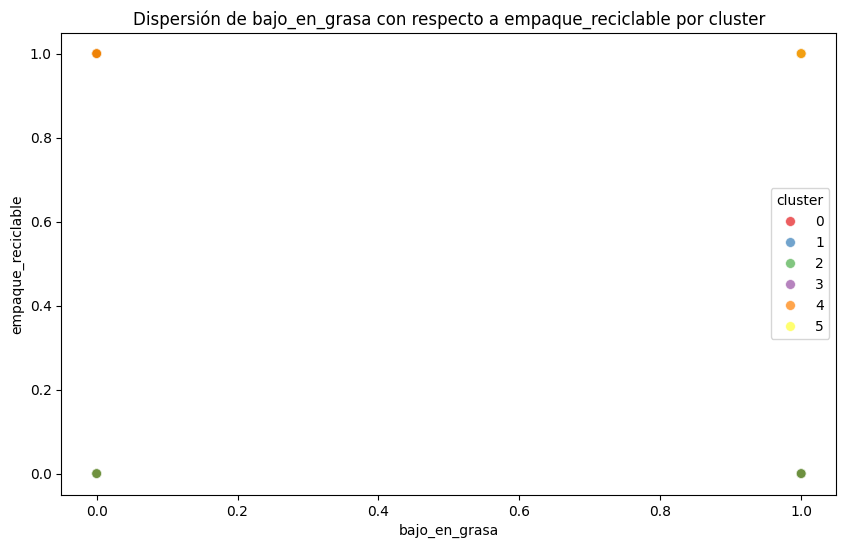

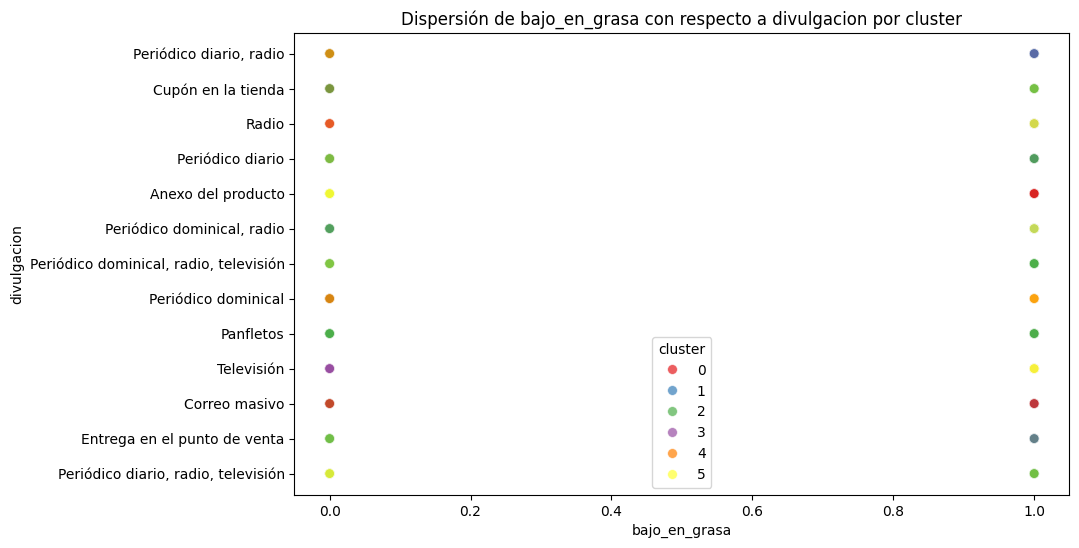

In [ ]:
# Lista de variables que quieres visualizar
variables_a_visualizar1 = ['ventas_tienda(en millones)', 'comercio', 'bajo_en_grasa']
variables_a_visualizar2 = ['costo', 'empaque_reciclable', 'divulgacion']


generar_graficas_dispersión(variables_a_visualizar1,variables_a_visualizar2, df_raw_categorico_nominal)

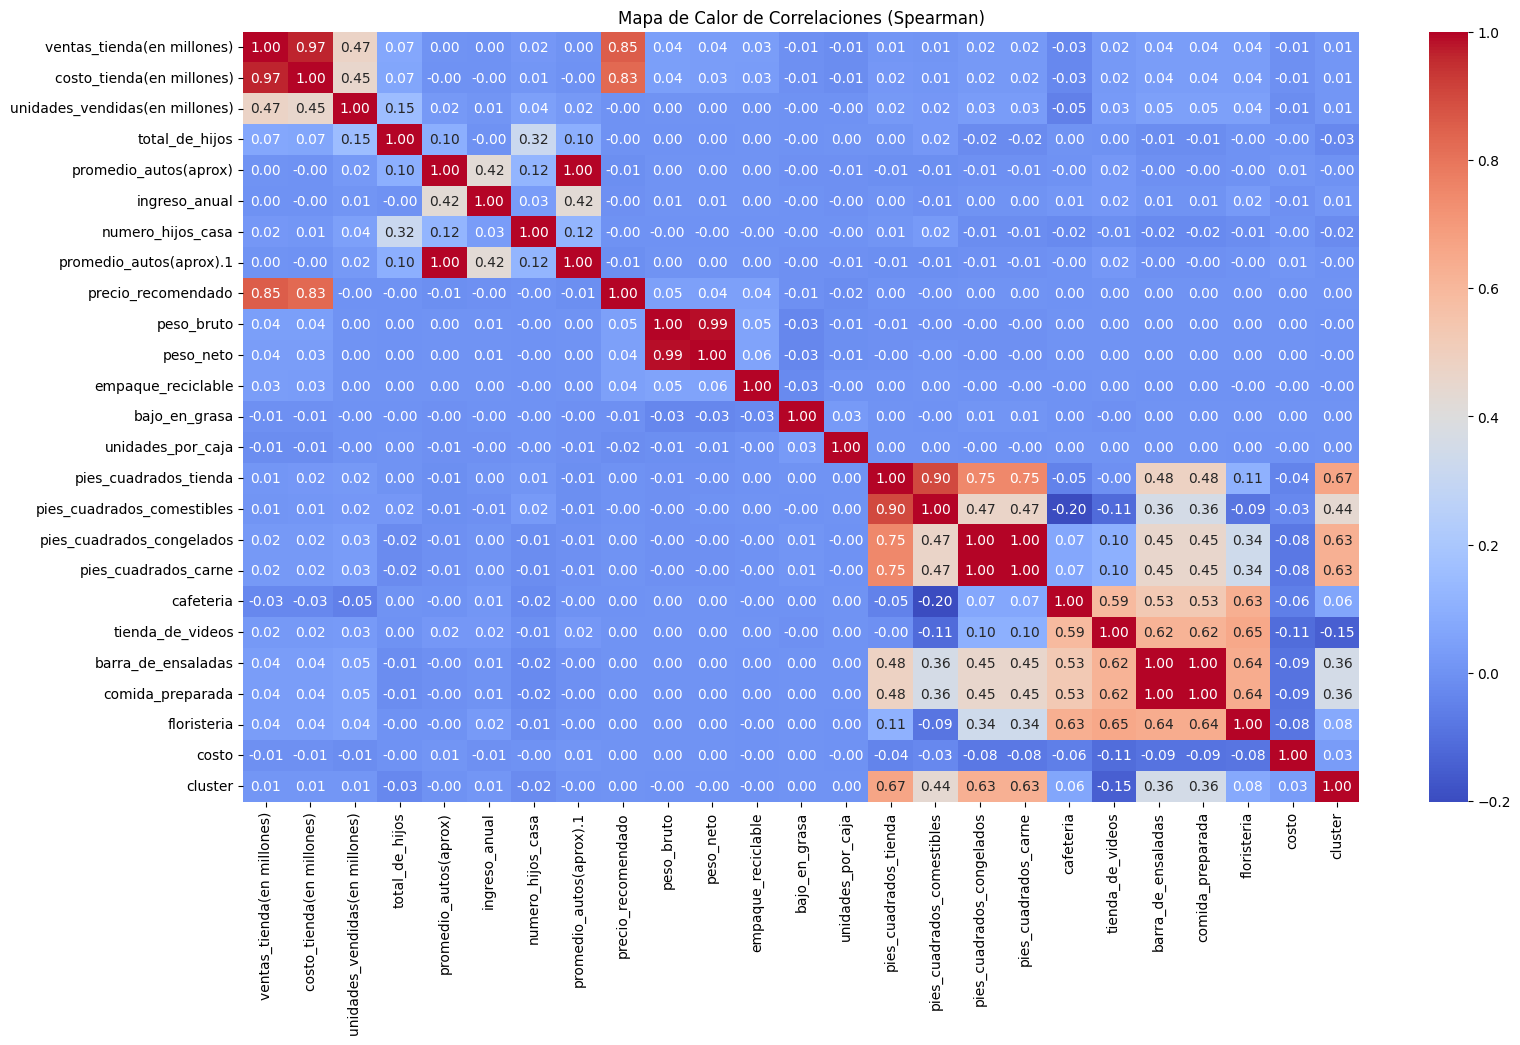

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_raw_categorico_nominal.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr(method='spearman')

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones (Spearman)")
plt.show()

### Descripciones y recomendaciones para cada modelo:

#### Modelo categorico nominal "Columnas_pies_cuadrados":

Descripciones:

General:

*  Hay mas miembros con membresia Cobre, en segundo lugar clientes sin membresia.
*  Las membresias de oro y plata en ese orden de mayor a menor tienen las dos menores recepciones de clientes.
*  Las tiendas de tipo Comida tienen la mayor cantidad de clientes siguiendole las tiendas de no comestibles y por ultimo bebida.
*  Las tiendas tienen un flujo de clientes mas alto en USA, siguiendole Mexico y por ultimo Canada, pudiendo haber excepciones en la aparicion de paises en la mayoria de clusteres aunque el orden se mantiene.

Cluster 0:

*  Los clientes del cluster cero son principalmente compradores de USA, aunque compra una cantidad considerable los clientes en Mexico
*  Los clientes no compran en tiendas de comida preparada, tiendas de video, en floristerias, barra de ensalada pero sabiendo esto es seguro que compren otros objetos no consumibles o bebidas. Sin embargo
*  Los clientes tienen mayor costo y se mantiene en rangos altos.
*  Los clientes entran en la tienda mediana.
*  Los clientes reciben publicidad por television y periodico,diario o radio.


Cluster 1:
*  Los clientes son frecuentes a la floristeria y con mayor cantidad.
*  Los clientes son frecuentes a la comida_preparada y con mayor cantidad.
*  Los clientes son frecuentes a la barra_ensalada y con mayor cantidad
*  Los clientes son frecuentes a la cafeteria y con mayor cantidad
*  Los clientes son frecuentes a la tienda de video y con mayor cantidad
*  Los clientes son de USA con mayor cantidad, siguiendo de Mexico y Canada.
*  Los clientes son frecuentes a pedir con una frecuencia mucho mas alta comida
*  De los 6 clusters es el que tiene mayor cantidad de clientes.
*  Los clientes del primer cluster van a tiendas de lujo y gourmet.

Cluster 2:

* Los clientes frecuentan la comida preparada.
* Los clientes frecuentan la barra de ensaladas.
* Los clientes prefieren sobre todo las tiendas de comida.
* Son clientes de Estados Unidos y Mexico casi en una proporcion semejante, sin embargo llendo con un poco mas a Estados Unidos.
* Los clientes van a supermercado grande, y son efectados por todos los medios de propaganda a excepcion de 1.

Cluster 3:

* Los clientes prefieren la tienda de cafeteria. Y son principalmente clientes de Estados Unidos.

* La preferencia son las tiendas de comida, los clientes comen snacks seguramente por que no van a tiendas de comida preparada.

* Los clientes del tercer cluster van a pequeños comercios.

+ Los clientes del cluster 3 no consumen enpaques reciclables ni alimentos bajos en grasa.

Cluster 4:

*  Los clientes son frecuentes a la floristeria
*  Los clientes son frecuentes a la comida_preparada
*  Los clientes son frecuentes a la barra_ensalada
*  Los clientes son frecuentes a la cafeteria
*  Clientes de Estados Unidos y Mexico.
+  Ronda entre varios rangos de costo, sin embargo el rango principal esta por 68 a 72 de forma lineal aunque aumente las ventas de la tienda.

Cluster 5:

*  Los clientes consumen con mucha frecuencia en tiendas de floristeria.
*  Los clientes consumen con poca iniciativa en cafeterias, sin embargo es existente.
* Clientes principalmente de Estados Unidos y pocos de Canada.
* Los clientes aunque consumen alimentos las tiendas estan relacionadas un poco mas hacia el lado no comestible.
* Los clientes van al supermercado mediano

Recomendaciones:

Cluster 0:

*  Para tener una recepcion de clientes diversas seria bueno expandirse por Otros paises, sin embargo seria mejor reforzar el crecimiento en paises menos consolidados como Mexico o Canada.

Cluster 1:

* Una tactica posible seria reforzar la atraccion visual a productos no comestibles antes de llegar a productos comestibles, para aumentar la compra de productos no comestibles.

* Se podria explorar la extension de un nuevo local en un area nueva.

* Aumentar la exposicion de la linea de supermercados en Mexico a traves de publicidad y transformar culturalmente los supermercados ubicados segun el pais.

Cluster 2:

* Aumentar la exposicion de redes sociales e internet, para capturar mas publico y obtener datos de nuevos productos a vender.

* Adaptar la publicidad segun la zona o si no es posible dar distinta publicidad segun los clientes y sus caracteristicas.

Cluster 3:
* Para conseguir mas ventas se podria centrar la venta de productos de uso rapido y diario para que el trabajador prefiere comprarlos y ahorrarse tiempo.
* La comida puede ser comida preparada fria de calentado rapido o agregar un espacio tipo buffet.
* Se puede hacer un espacio para ensaladas para captar un nicho de este grupo.

Cluster 4:

* Se puede agregar una tienda de comida o entretenimiento que cambie cada semana para satisfacer el interes y retener a estos clientes con mayor interes y posiblemente tiempo.

Cluster 5:

* Capturar la atencion con locales ambulantes de comida cerca de la entrada y realizar encuestas para localizar productos no existentes dentro del supermercado que no sean comestibles.

#### Modelo numeral:

No se va a proceder con la descripcion de los clusters porque no hay relaciones distintivas de cada cluster en cada una de las variables, los datos que se pueden obtener son bajos la distincion que pude observar en todos los datos es unicamente en ventas tienda millones.